In [1]:
#### 1.loading_data.R 
### 1)Read cluster resaults
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
hclust.Res <- Cluster.20200201.V7.Tumor$hclust.Res
### 2)GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing
## Comparative_Molecular_Analysis_of_Gastrointestinal_Adenocarcinomas
file1 <- "/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Comparative_Molecular_Analysis_of_Gastrointestinal_Adenocarcinomas/COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset.rds"
COAD_GI_Adenocarcinomas_dataset <- readRDS(file1)
COAD.GI.Adenocarcinomas.Characteristics <- COAD_GI_Adenocarcinomas_dataset$COAD.GI.Adenocarcinomas.Characteristics
### 3)COAD_Aneuploidy_score_dataset
## Genomic_and_Functional_Approaches_to_Understanding_Cancer_Aneuploidy
file2 <- "/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Genomic_and_Functional_Approaches_to_Understanding_Cancer_Aneuploidy/COAD_Aneuploidy_score_dataset.rds"
COAD_Aneuploidy_score_dataset <- readRDS(file2)

### 4)COAD_Oncogenic_Signaling_Alteration_dataset
##Oncogenic_Signaling_Pathways_in_The_Cancer
file3 <- "/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Oncogenic_Signaling_Pathways_in_The_Cancer/COAD_Oncogenic_Signaling_Alteration_dataset.rds"
COAD_Oncogenic_Signaling_Alteration_dataset <- readRDS(file3)

### 5)COAD_Oncogenic_Signaling_Alteration_dataset
##Oncogenic_Signaling_Pathways_in_The_Cancer
file4 <- "/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Oncogenic_Signaling_Pathways_in_The_Cancer/COAD_Oncogenic_Signaling_Alteration_dataset.rds"
COAD_Oncogenic_Signaling_Alteration_dataset <- readRDS(file4)

### 6)COAD_The_Immune_Landscape_of_Cancer_Immune_Characteristics
##The_Immune_Landscape_of_Cancer
file5 <- "/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/The_Immune_Landscape_of_Cancer/COAD_The_Immune_Landscape_of_Cancer_Immune_Characteristics.rds"
COAD_Immune_Characteristics_dataset <- readRDS(file5)



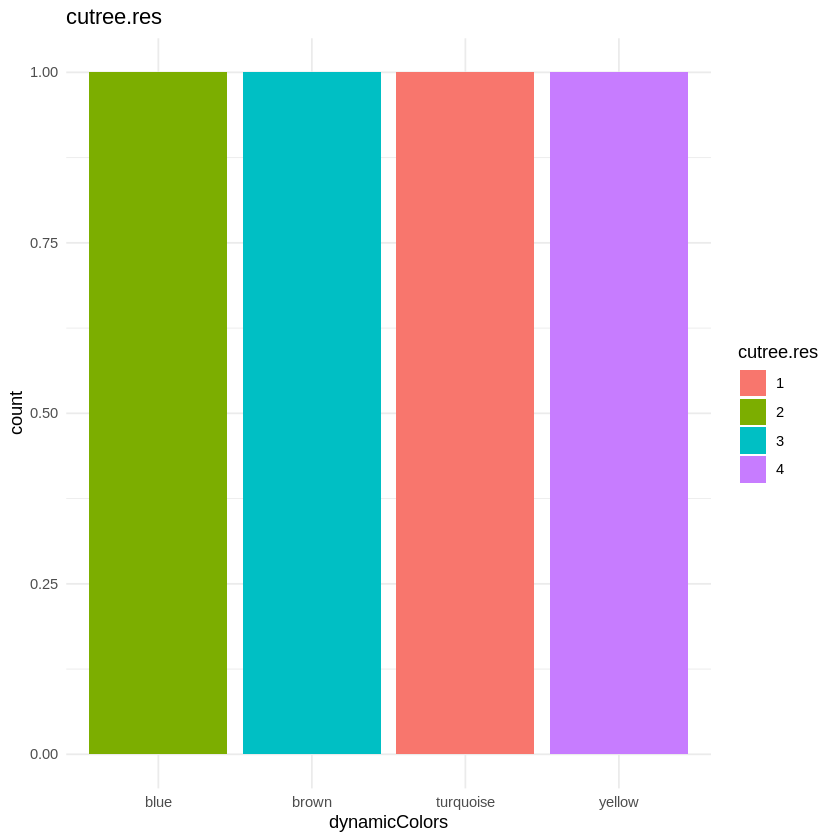

[1] "Some thing wrong with---rownames"


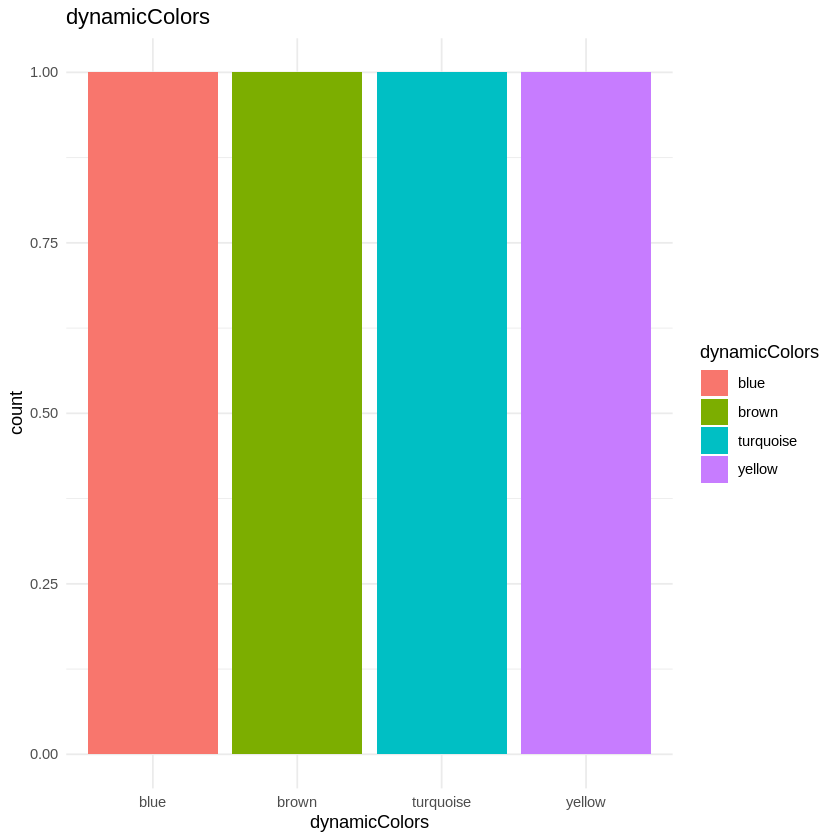

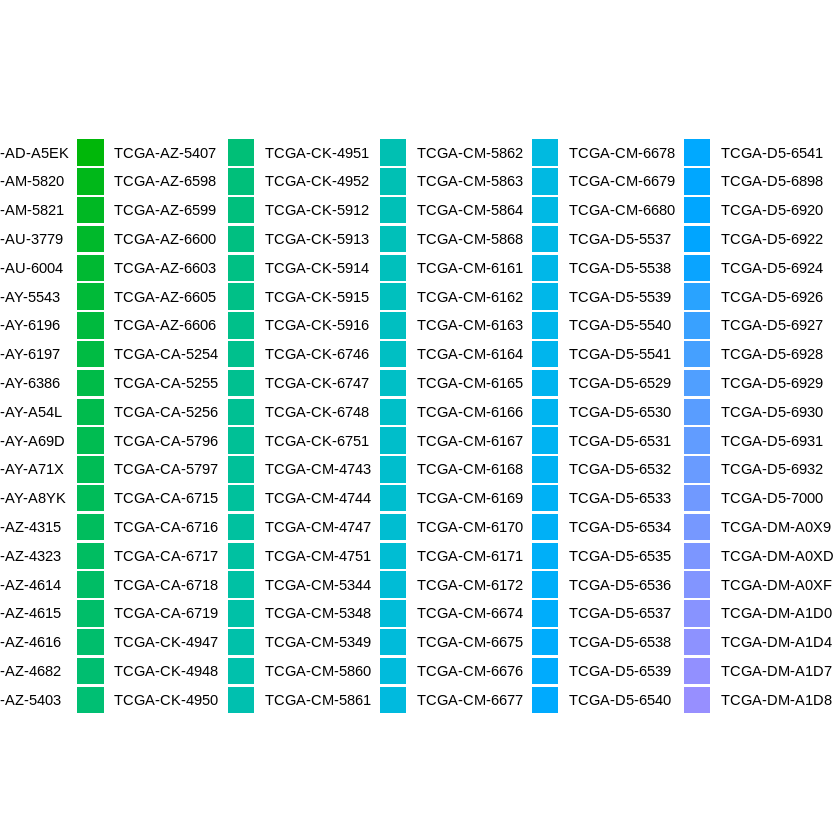

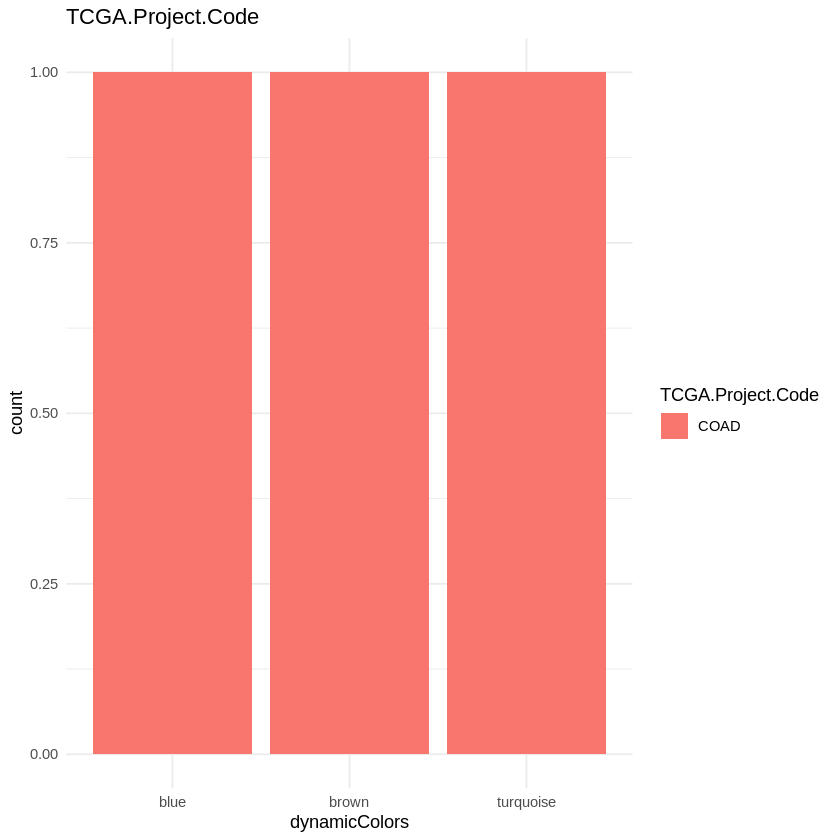

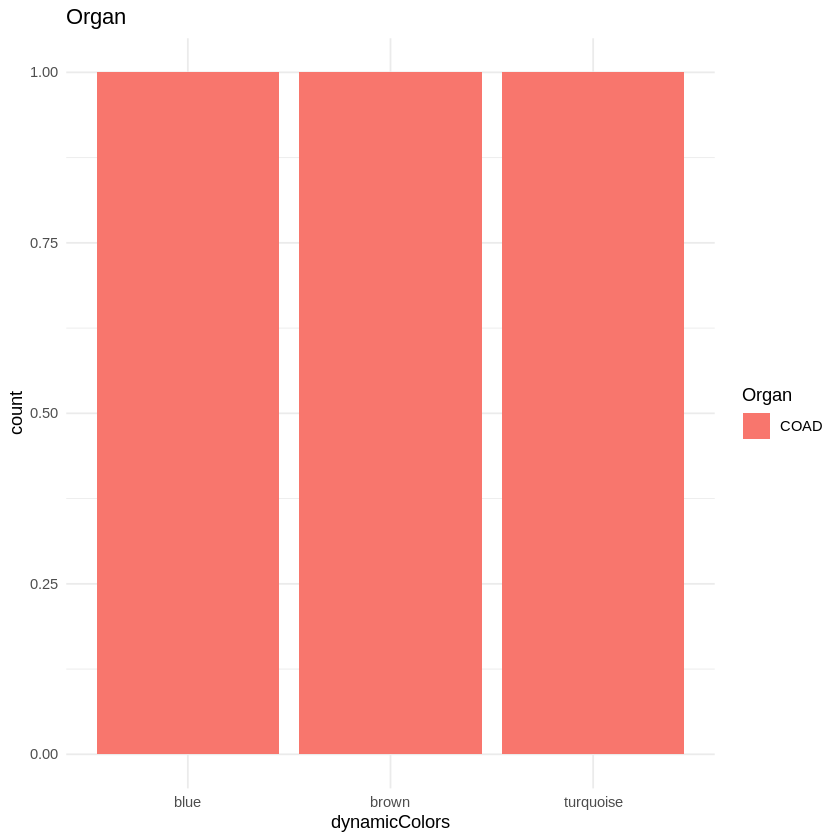

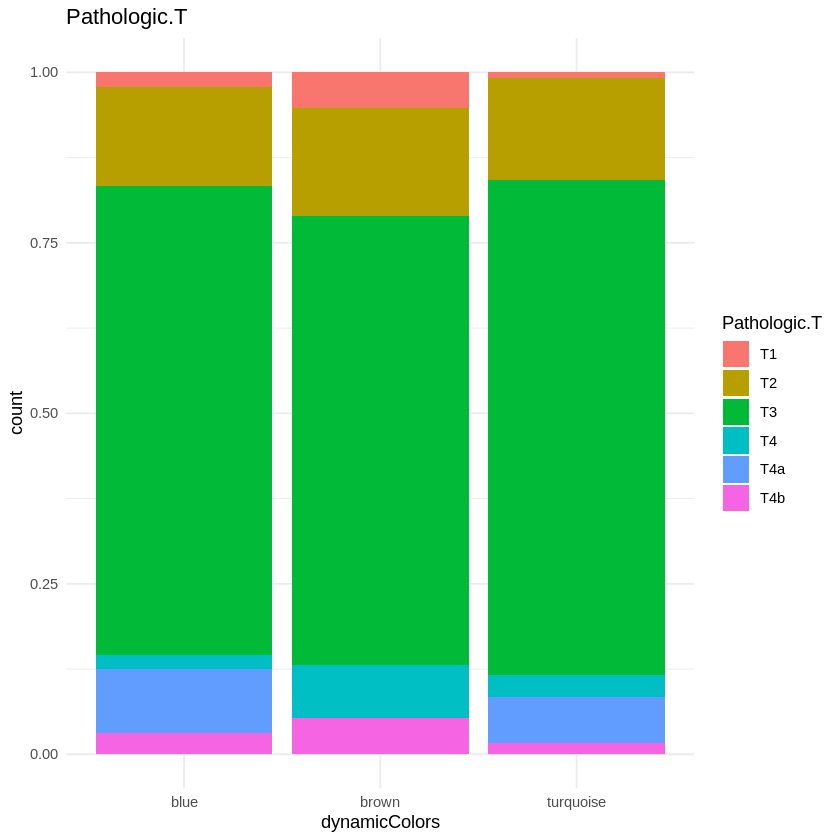

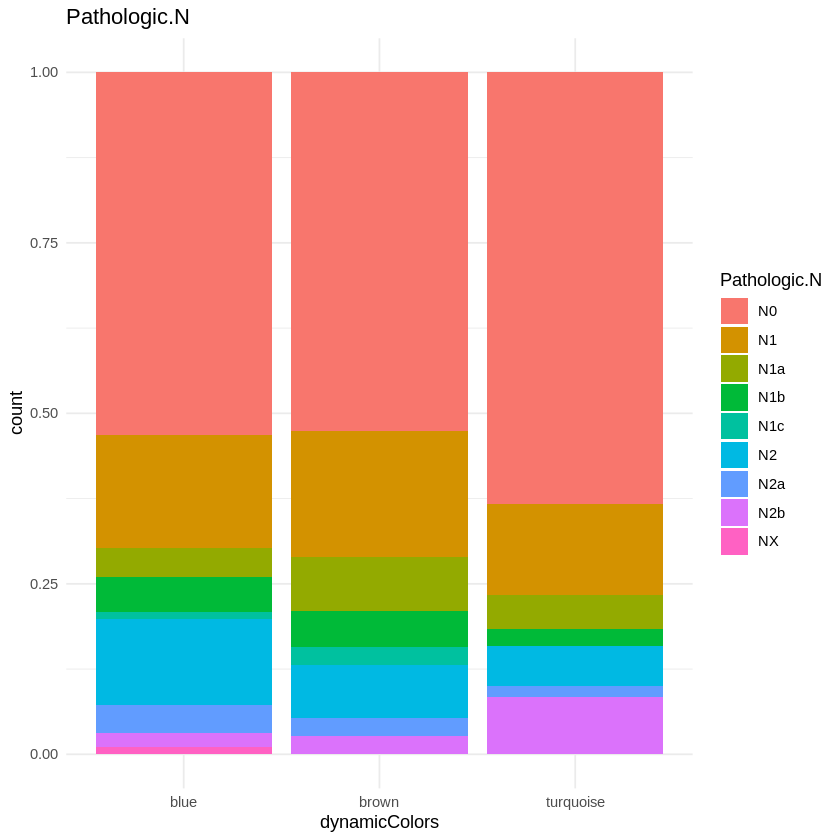

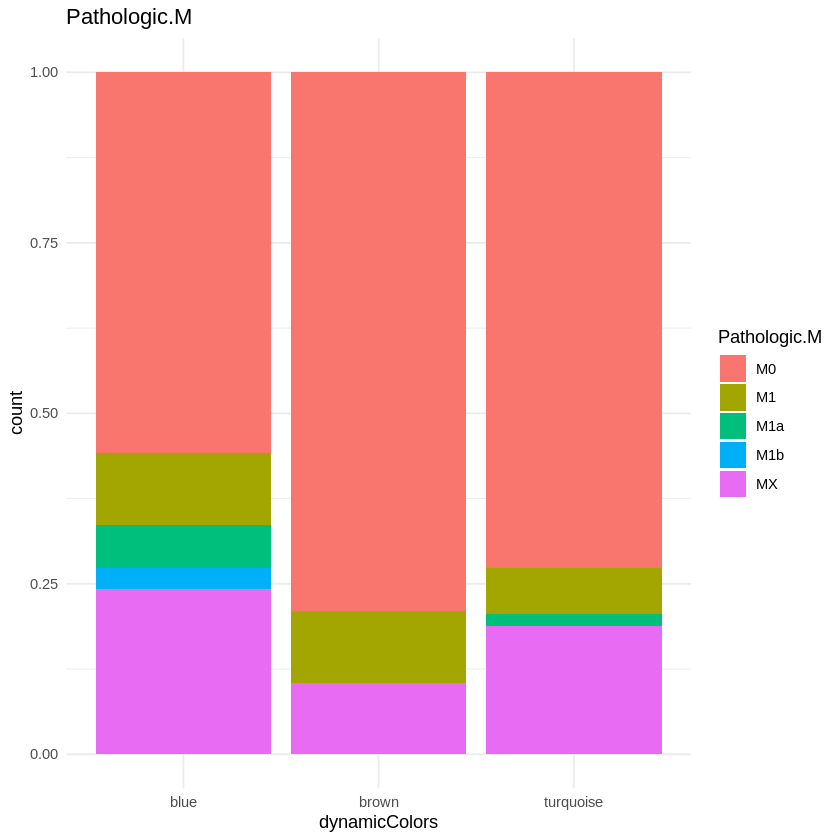

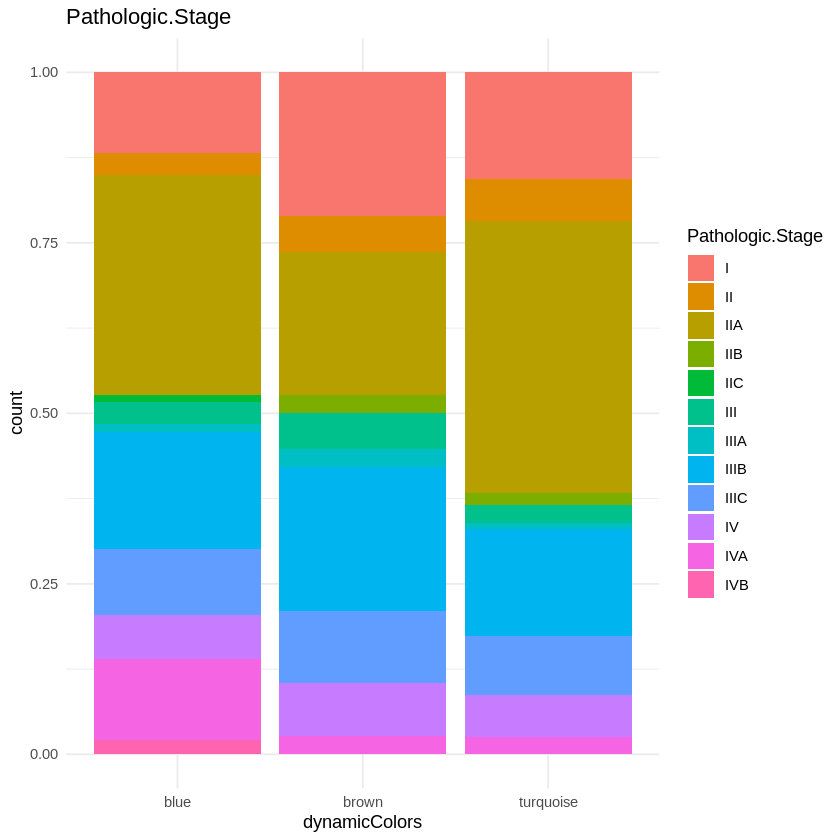

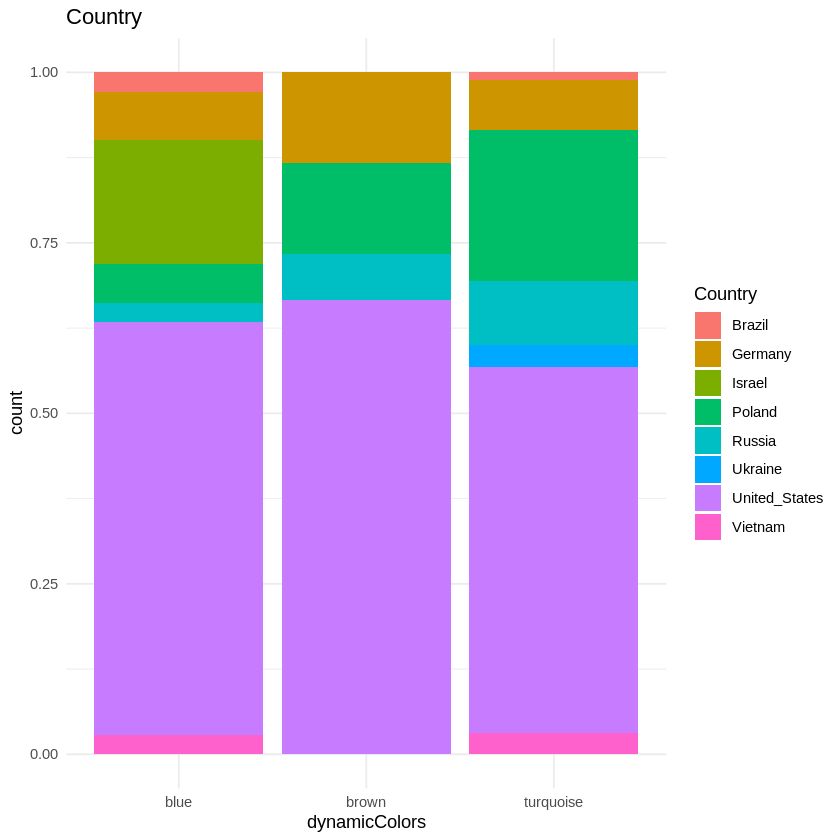

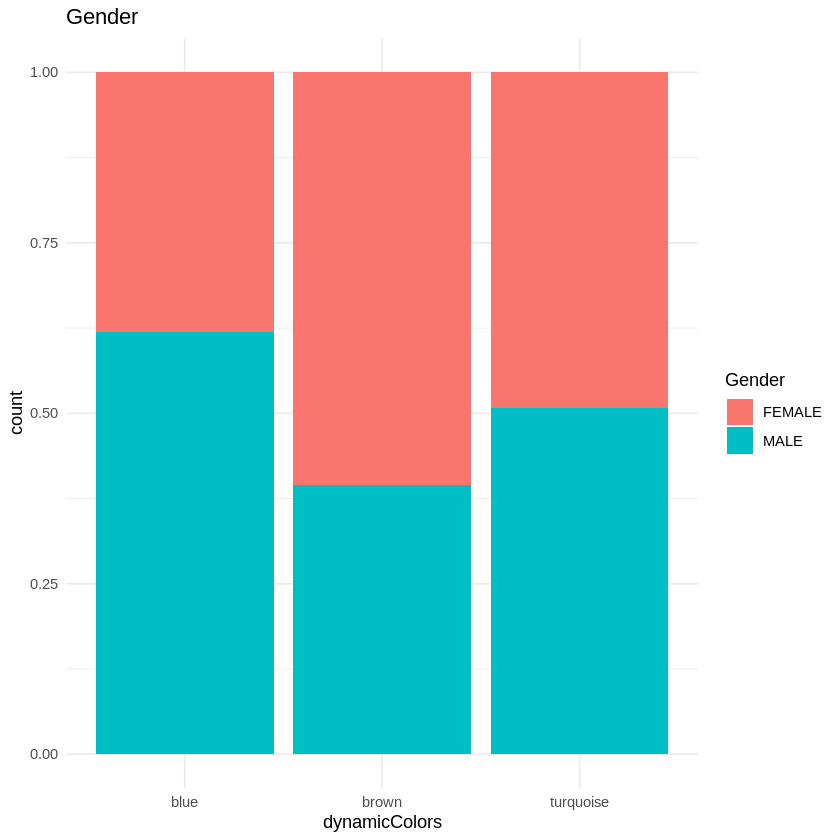

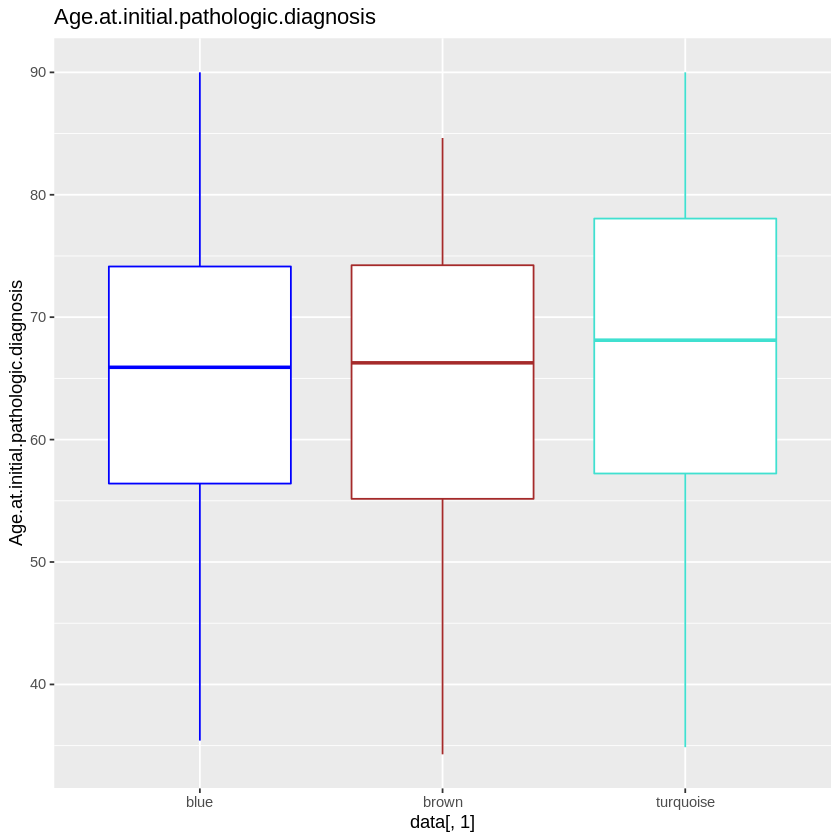

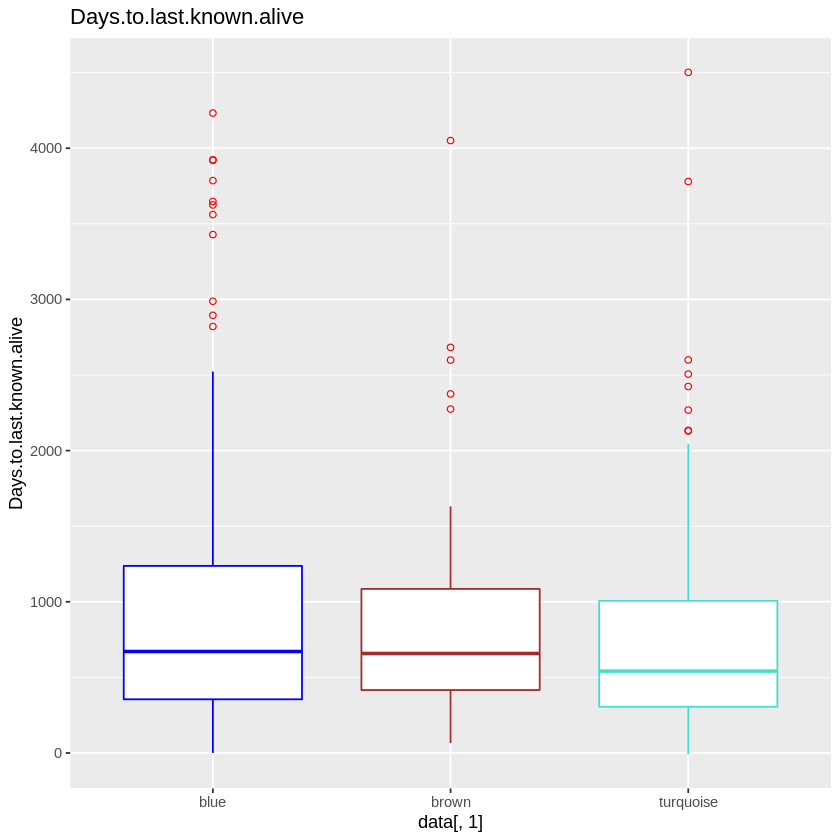

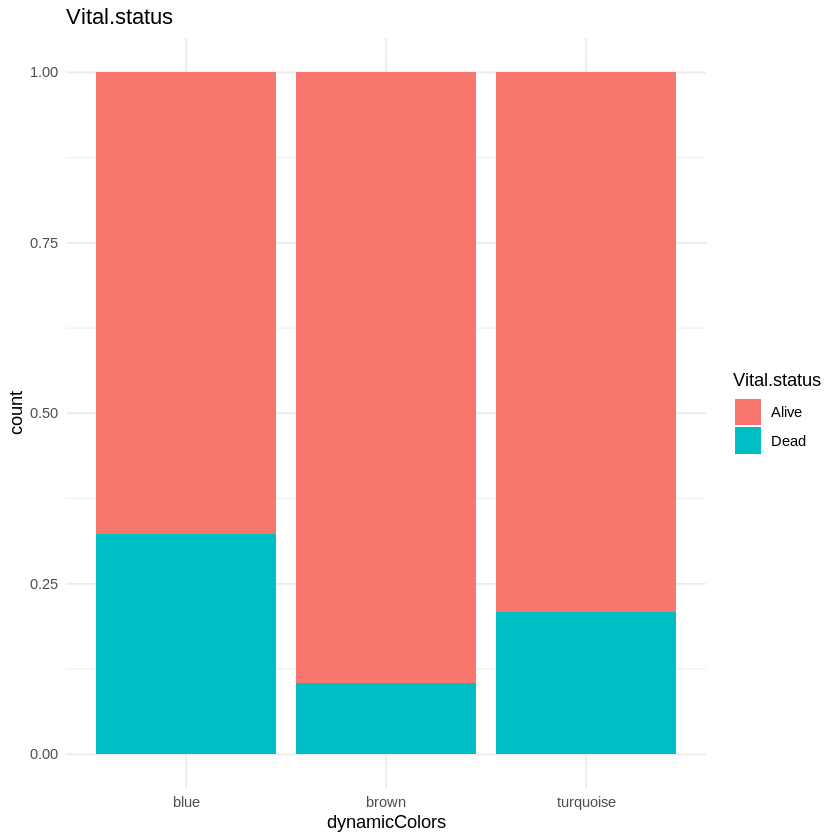

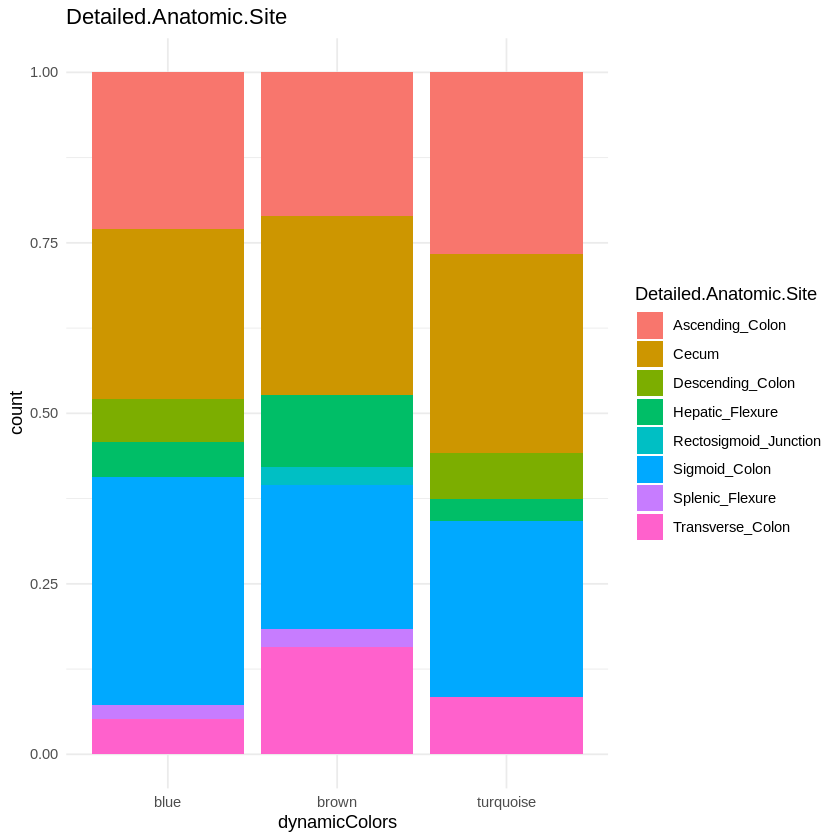

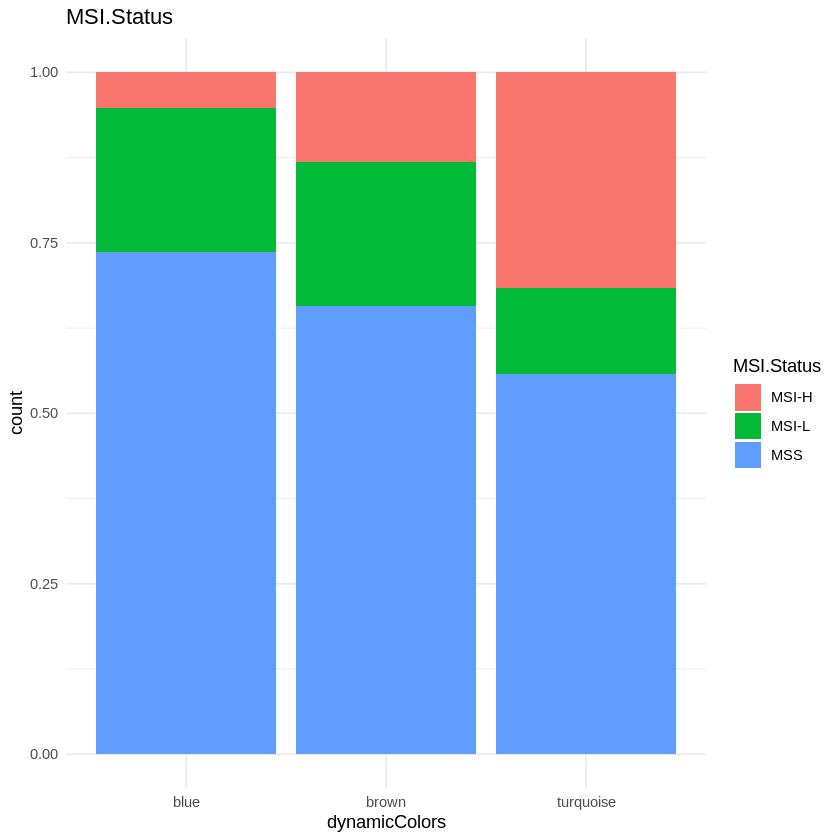

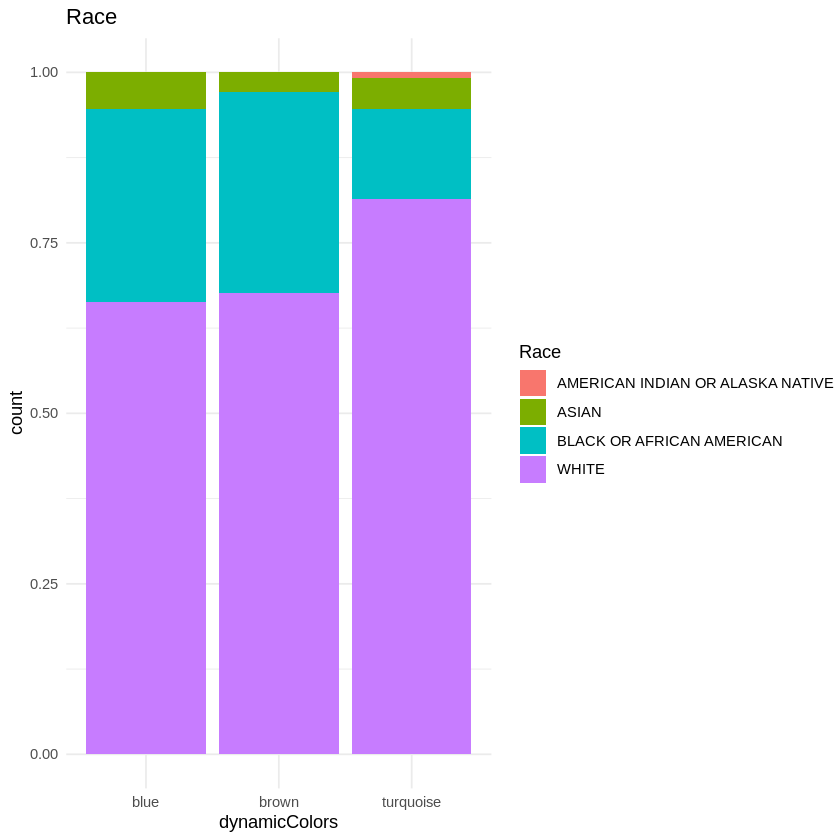

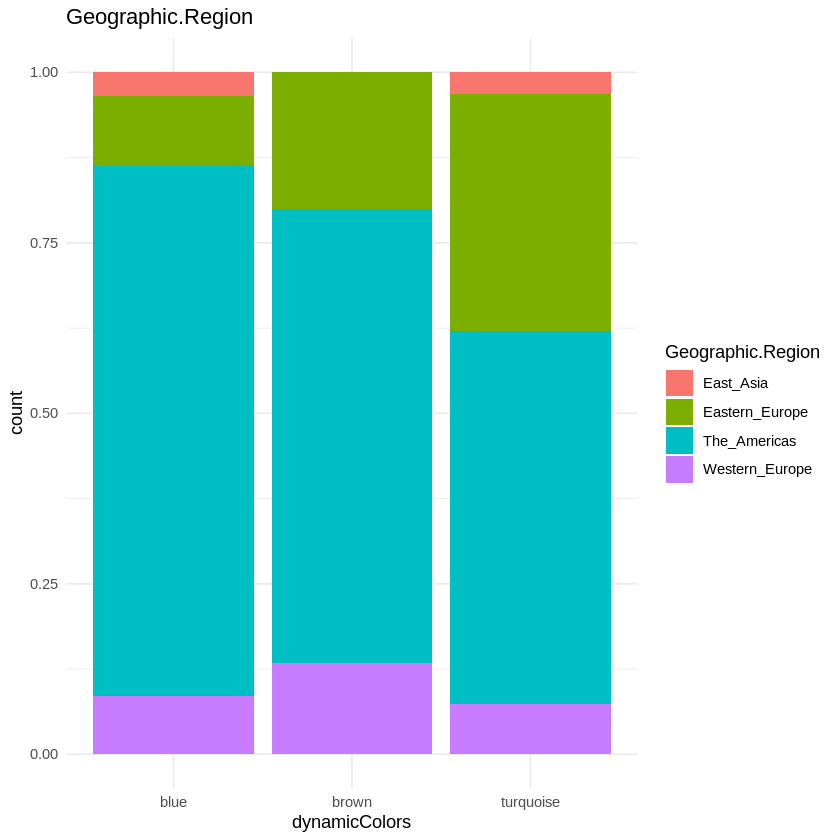

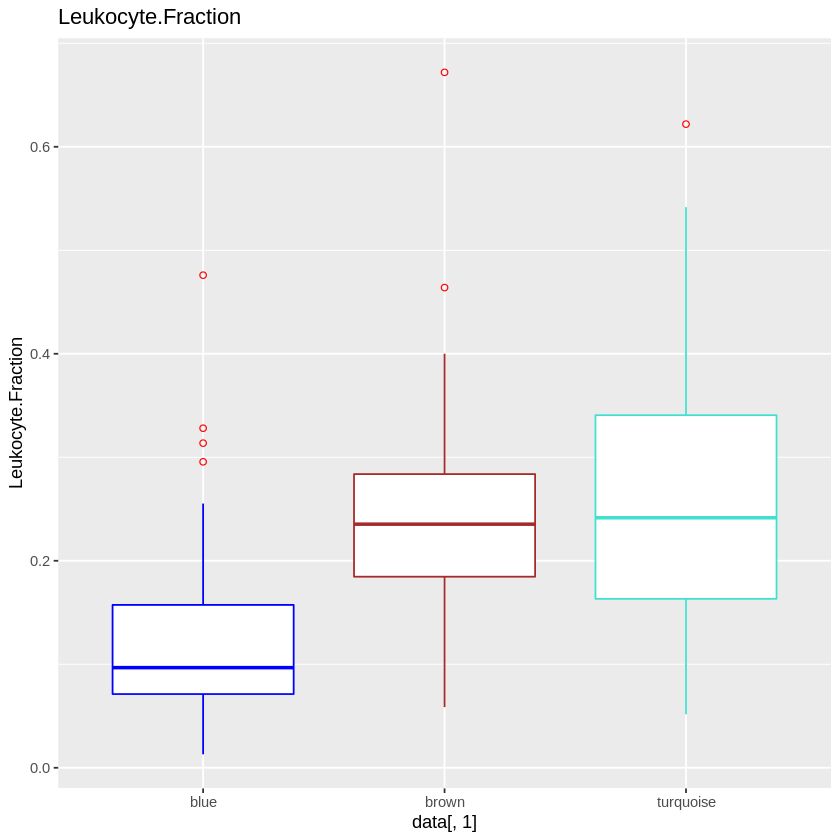

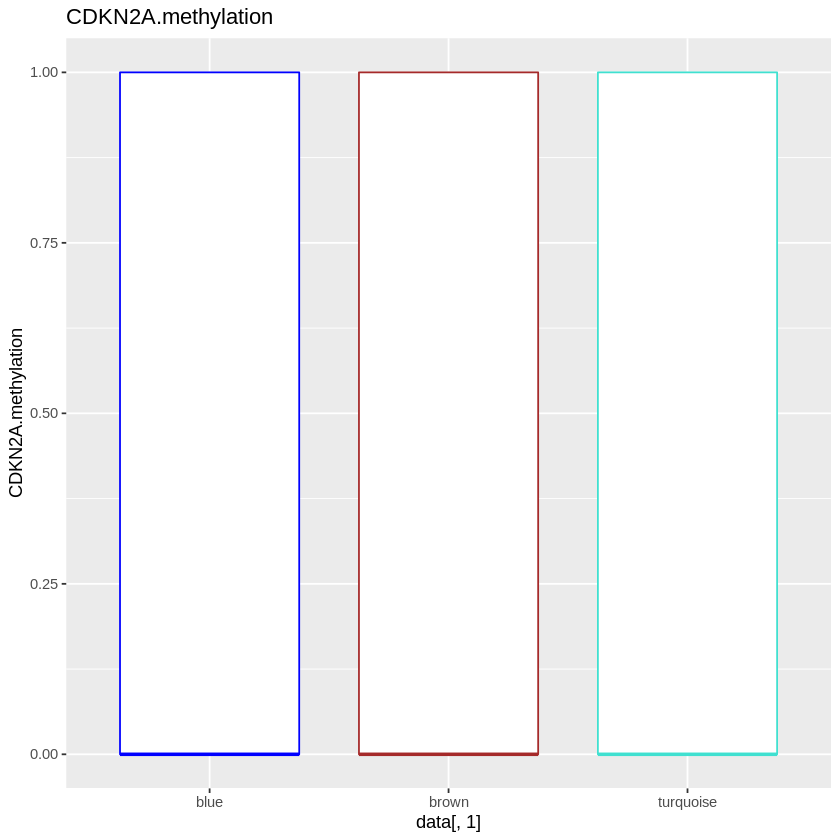

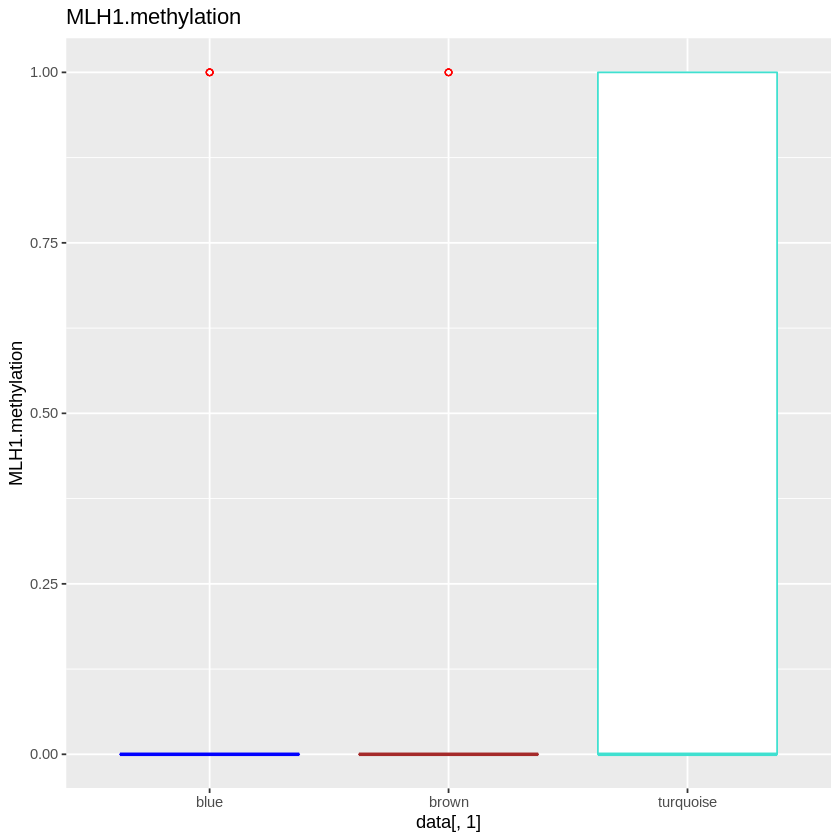

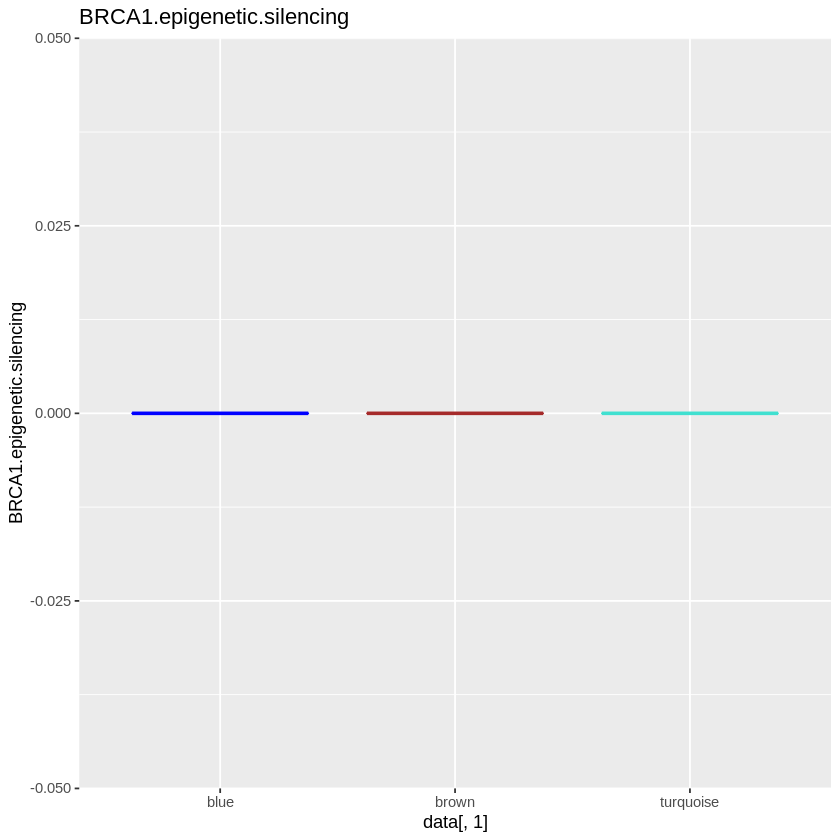

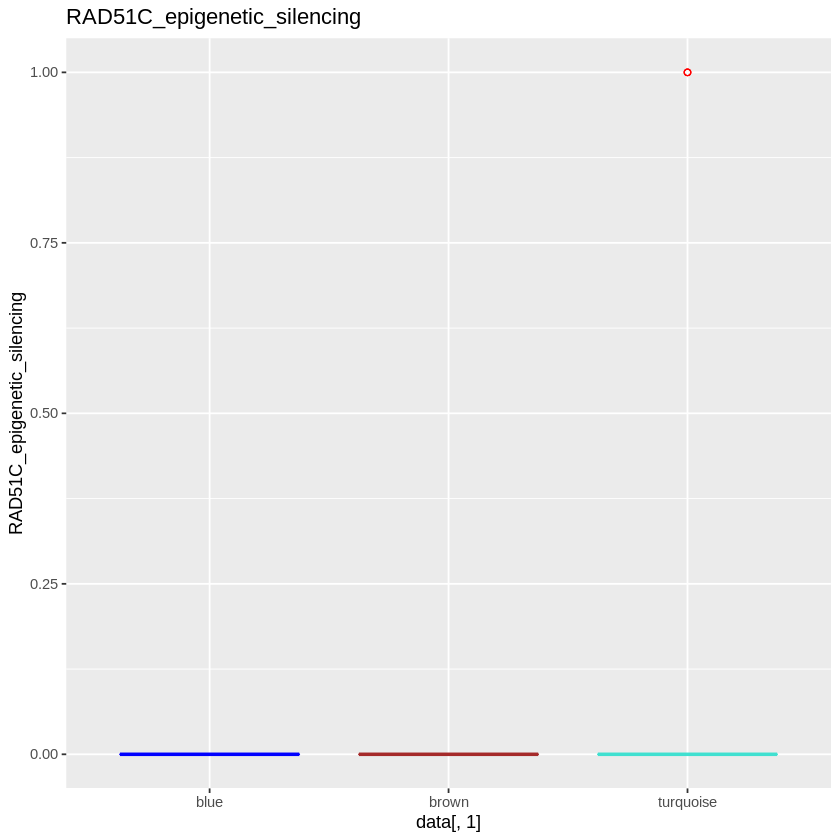

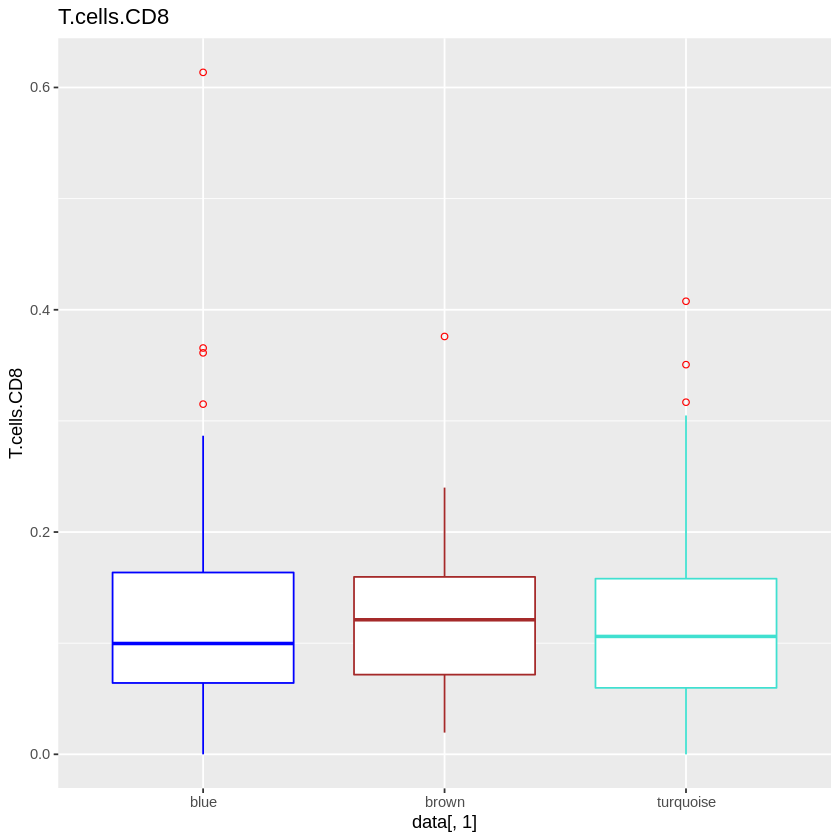

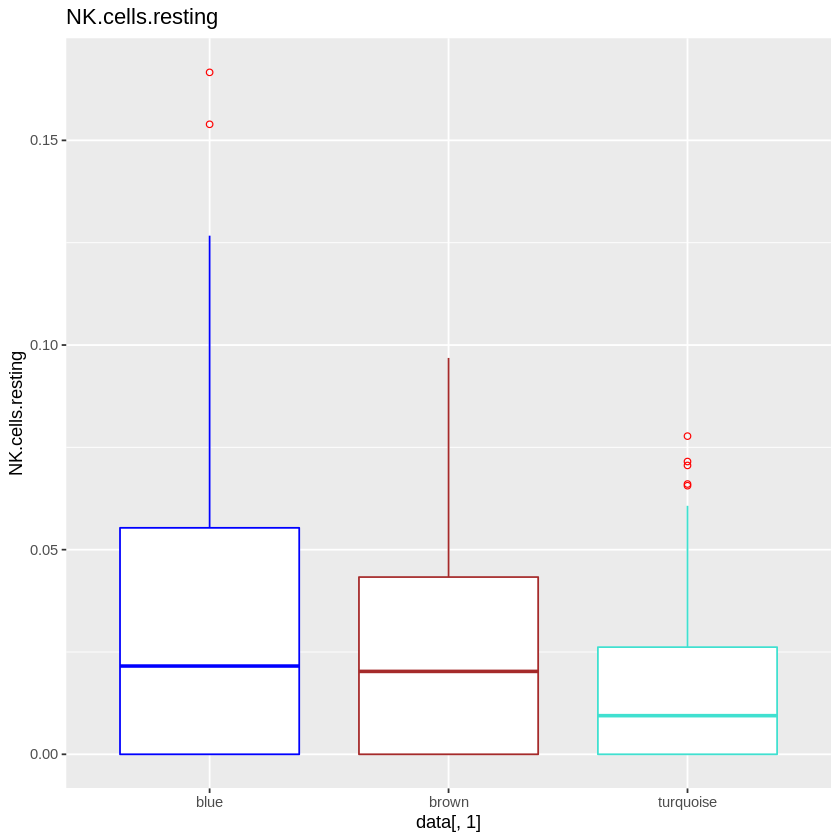

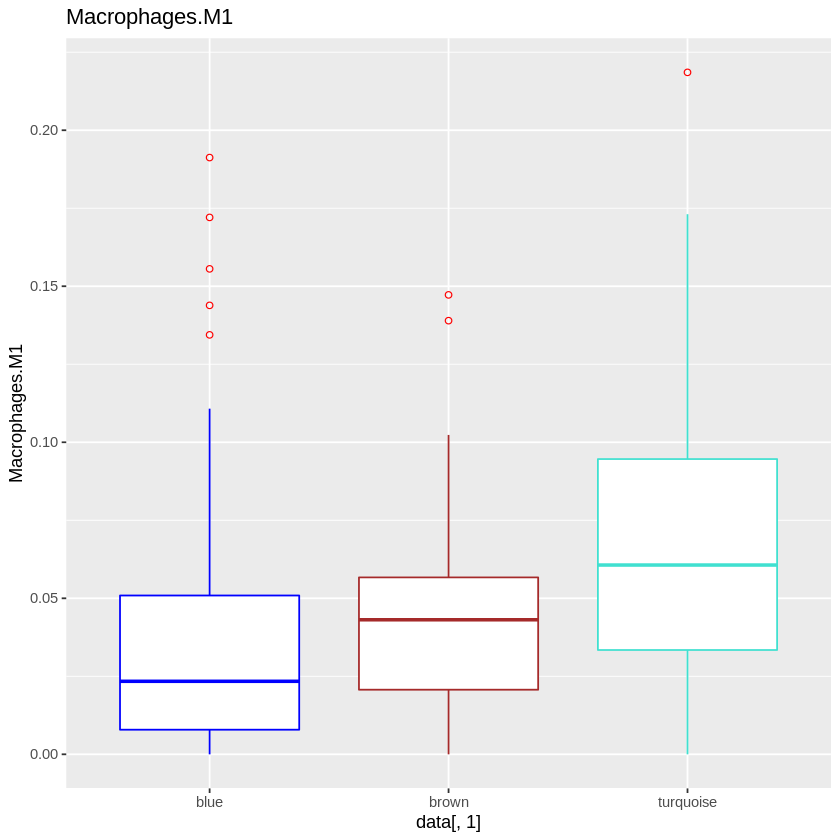

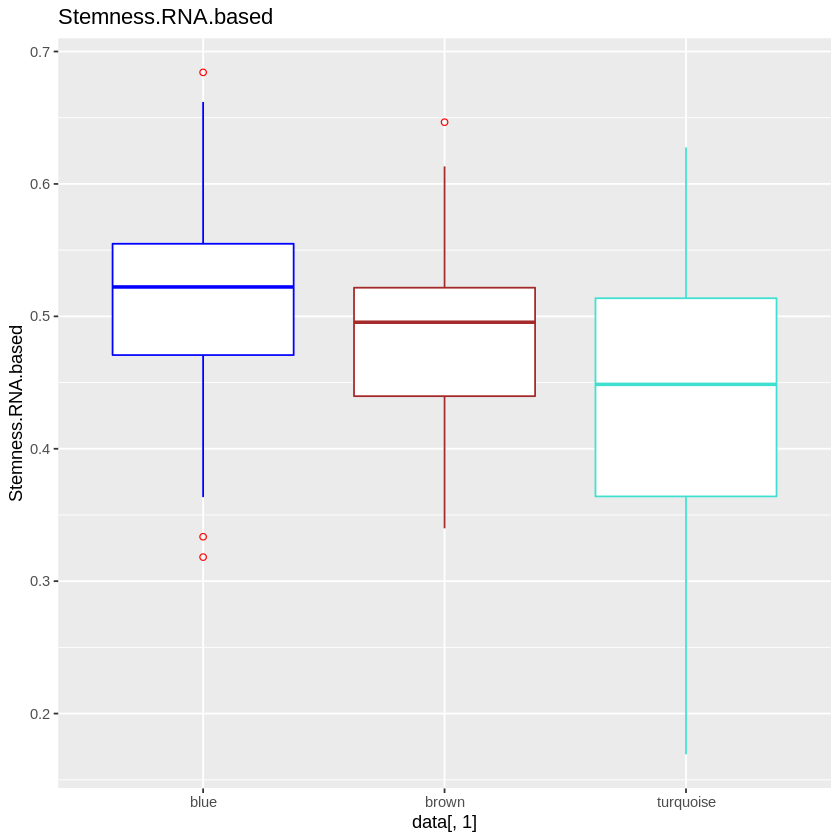

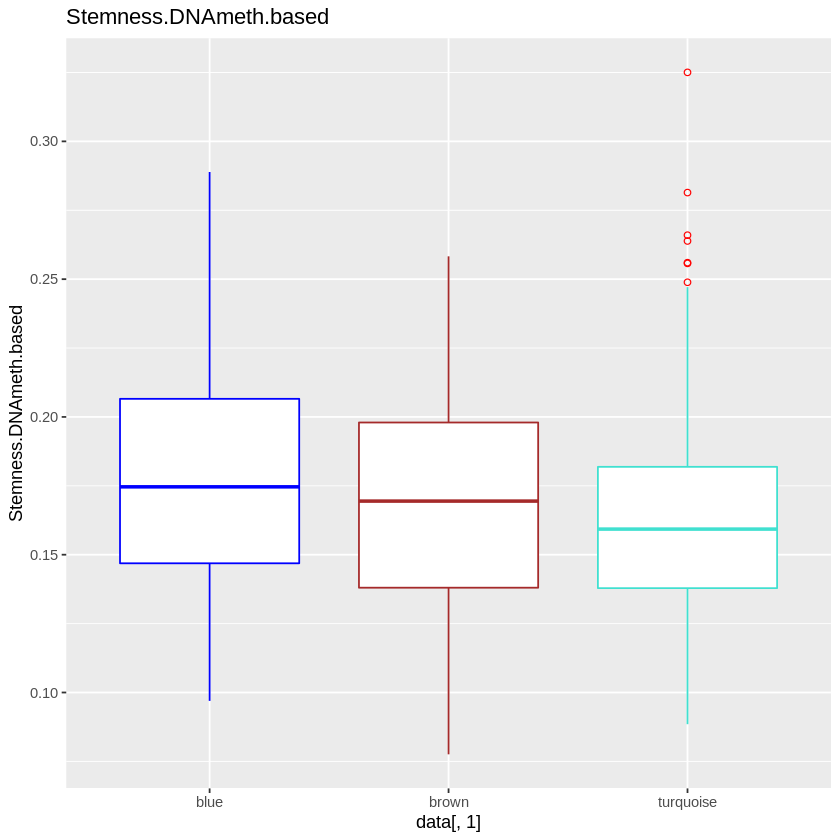

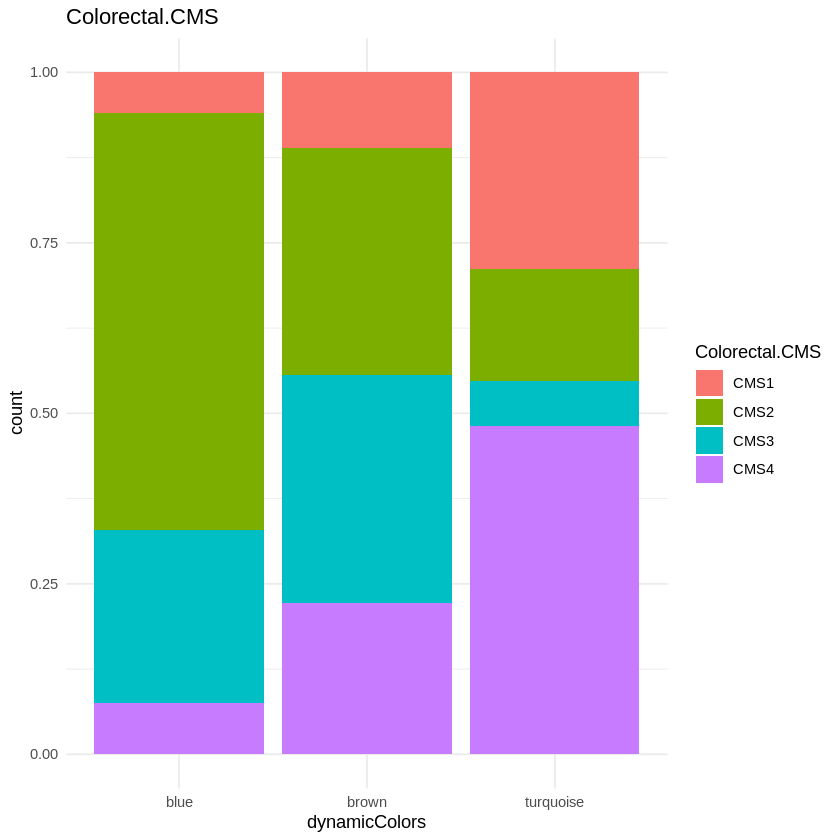

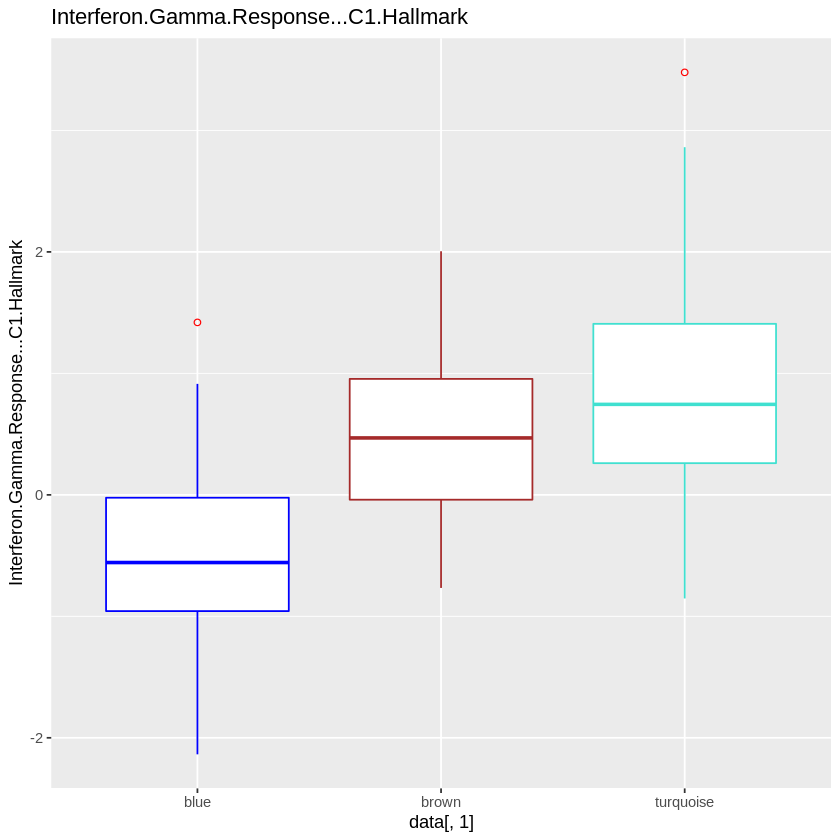

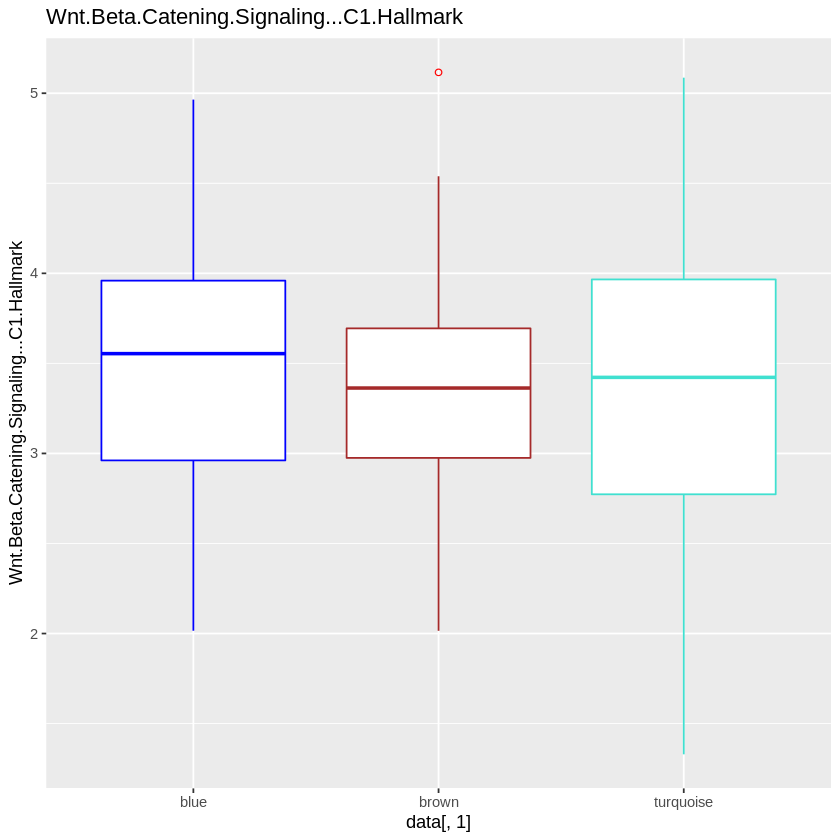

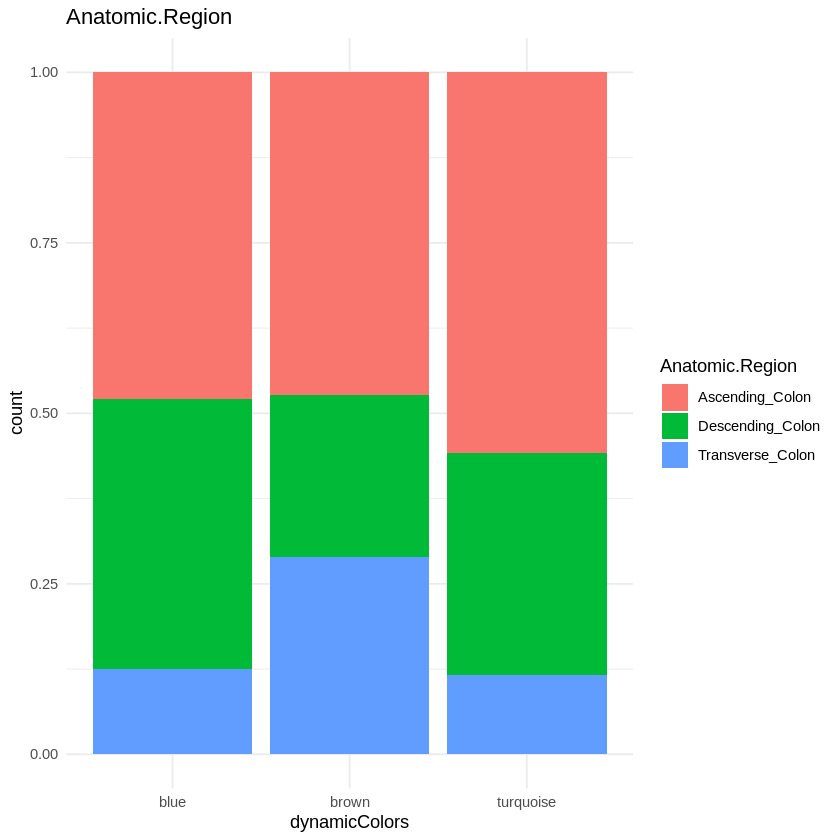

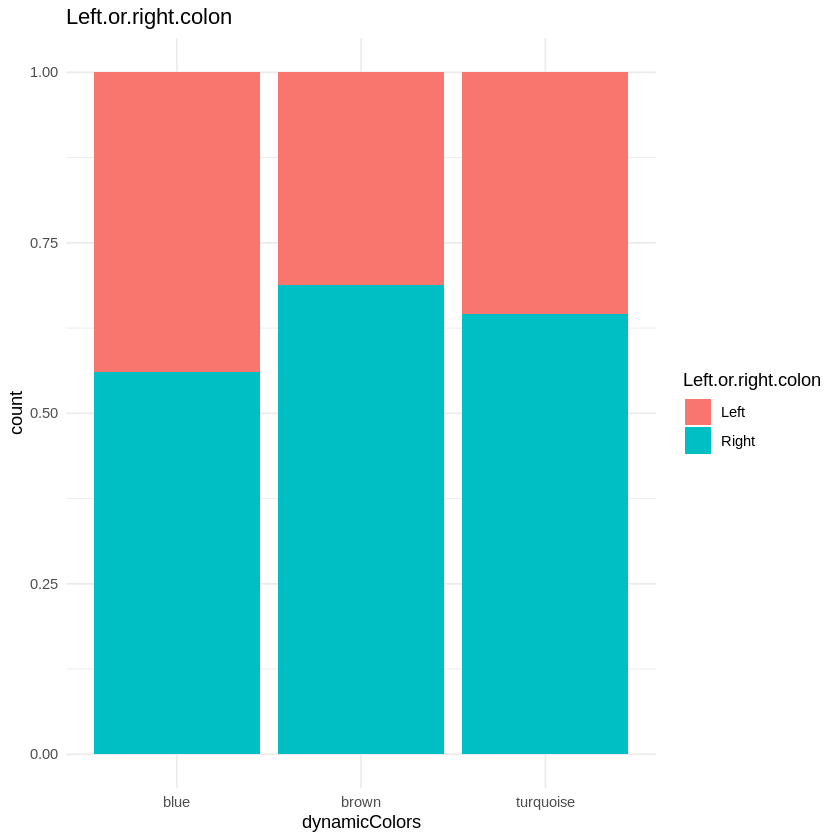

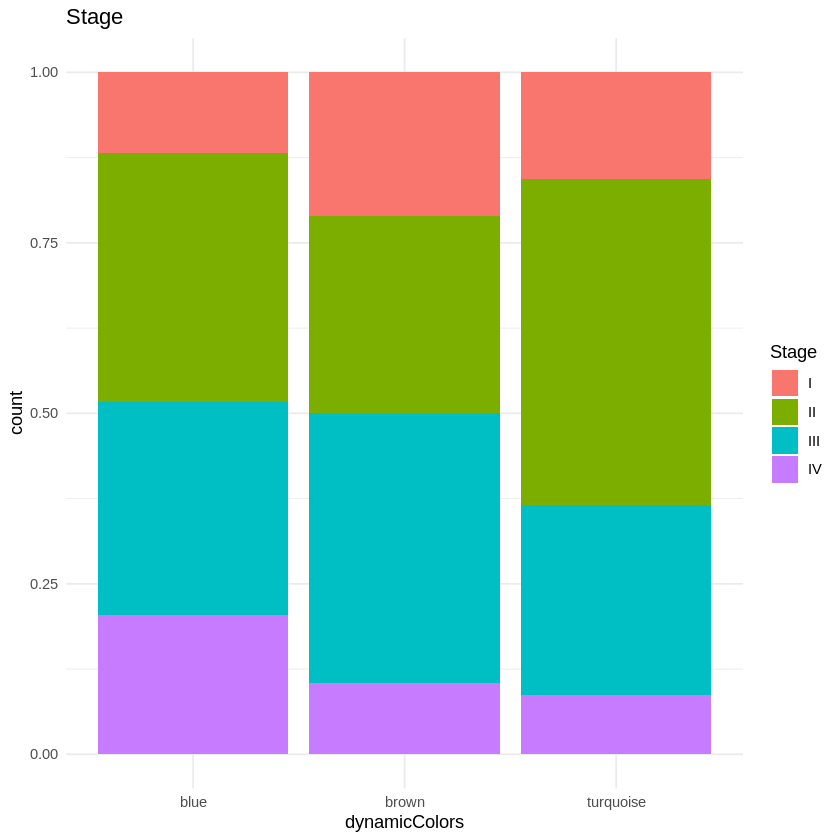

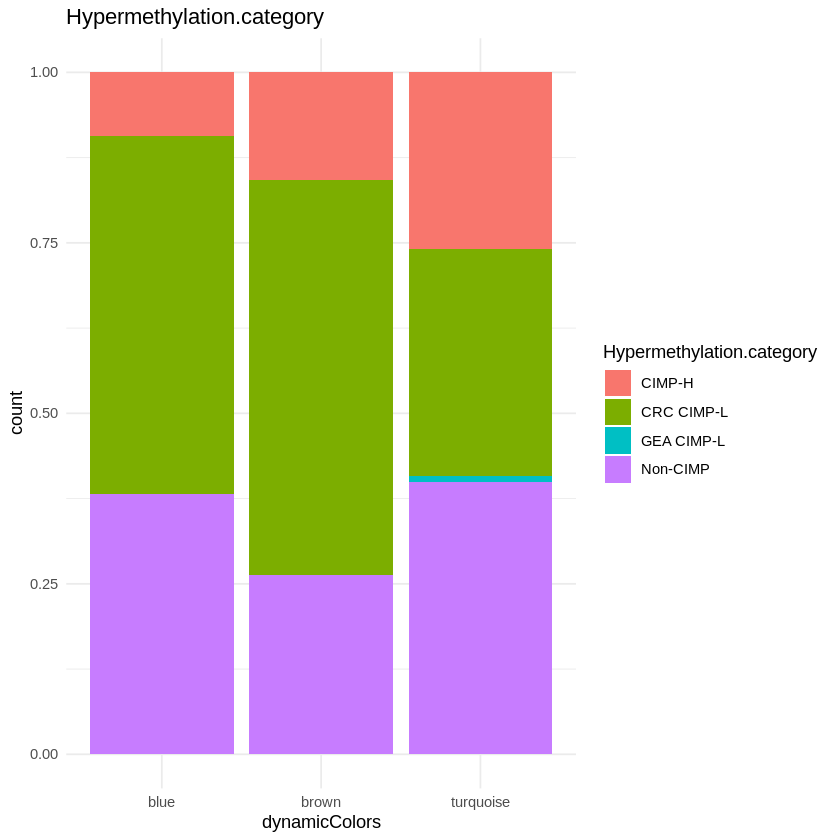

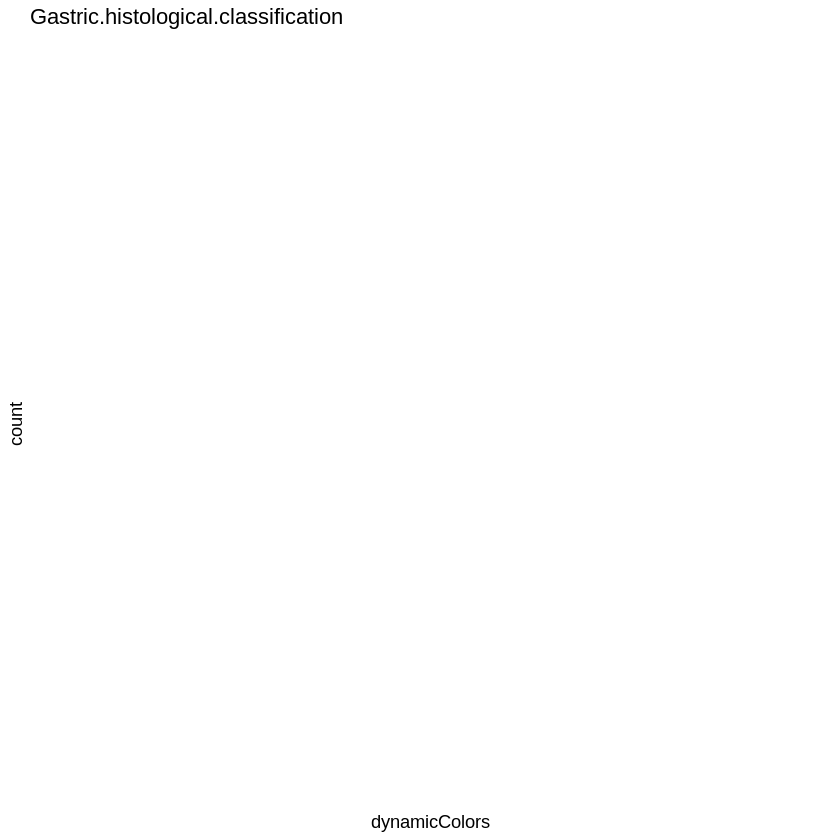

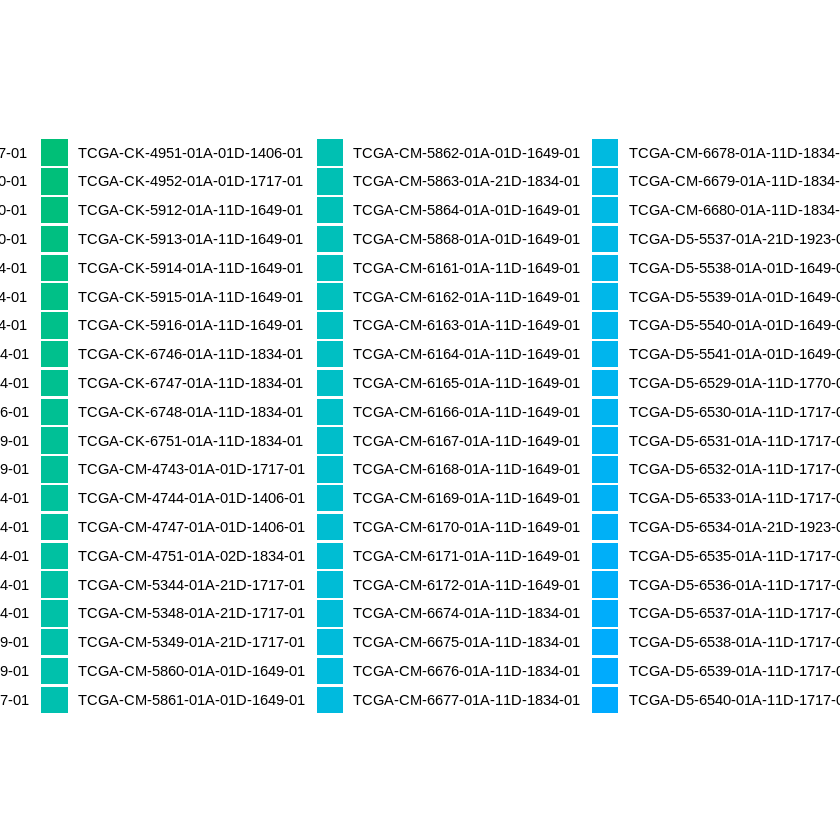

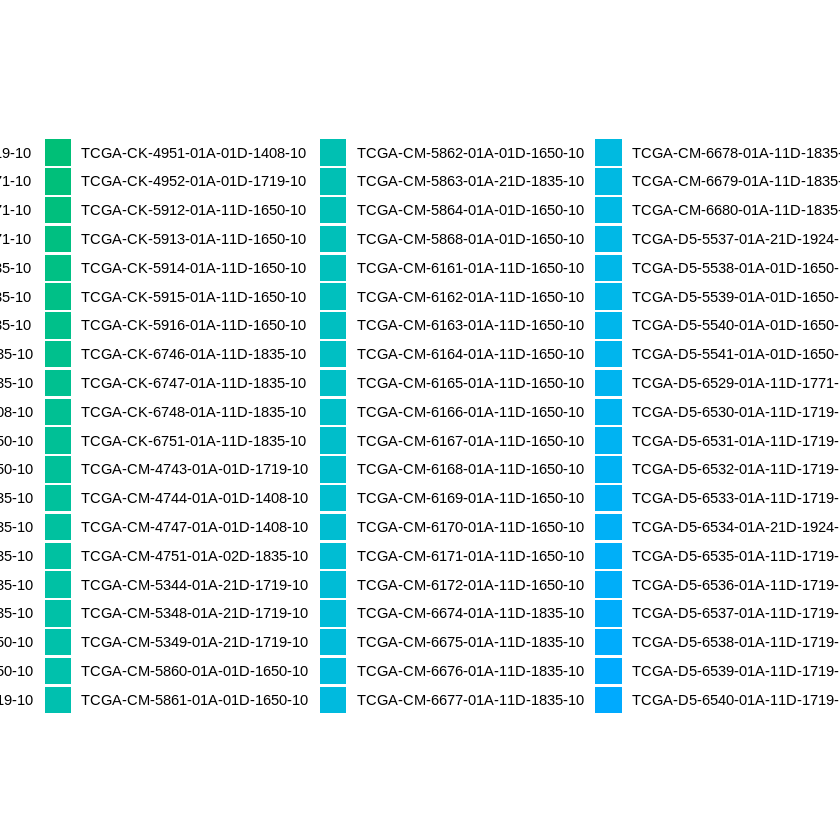

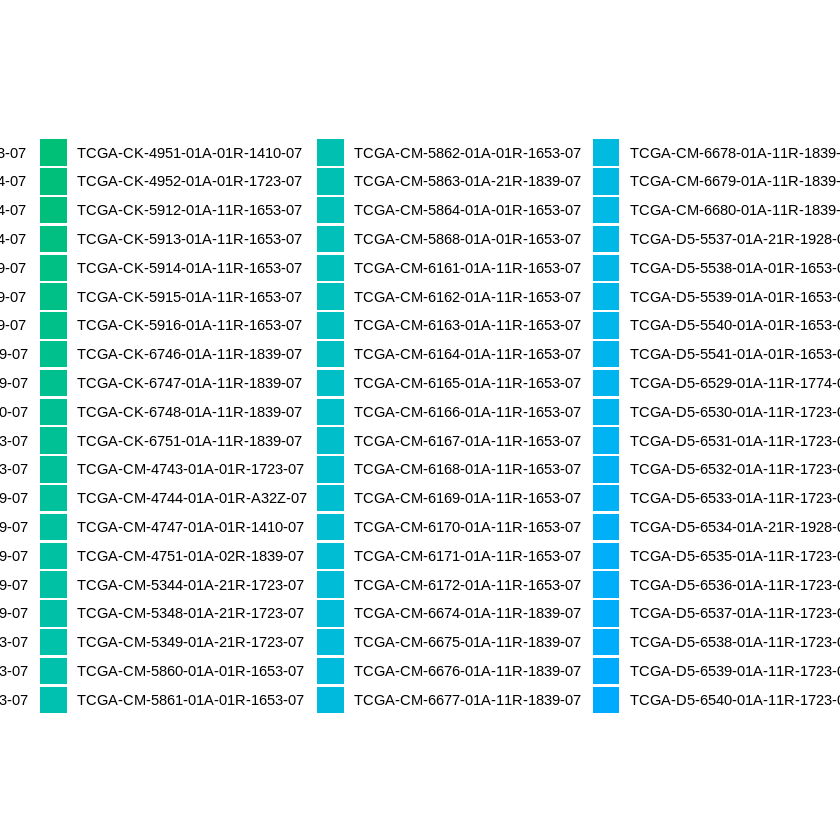

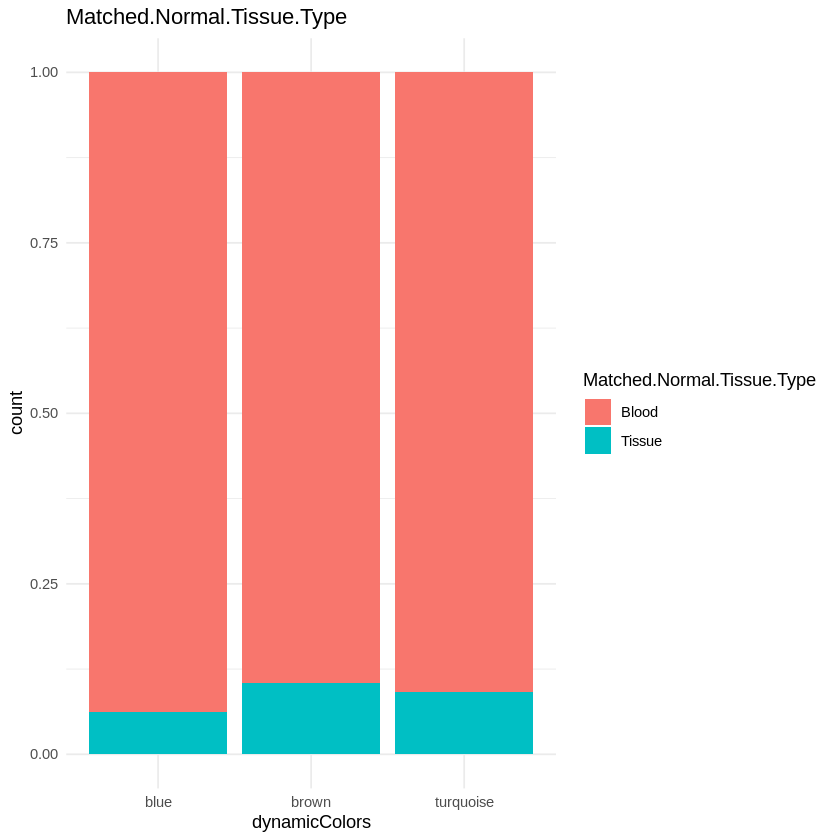

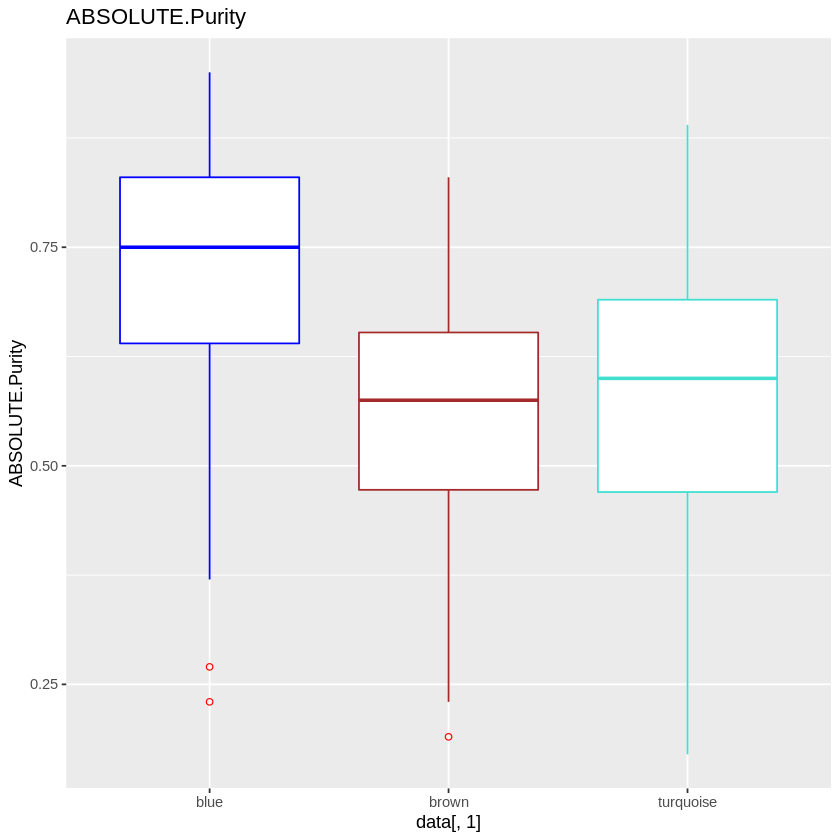

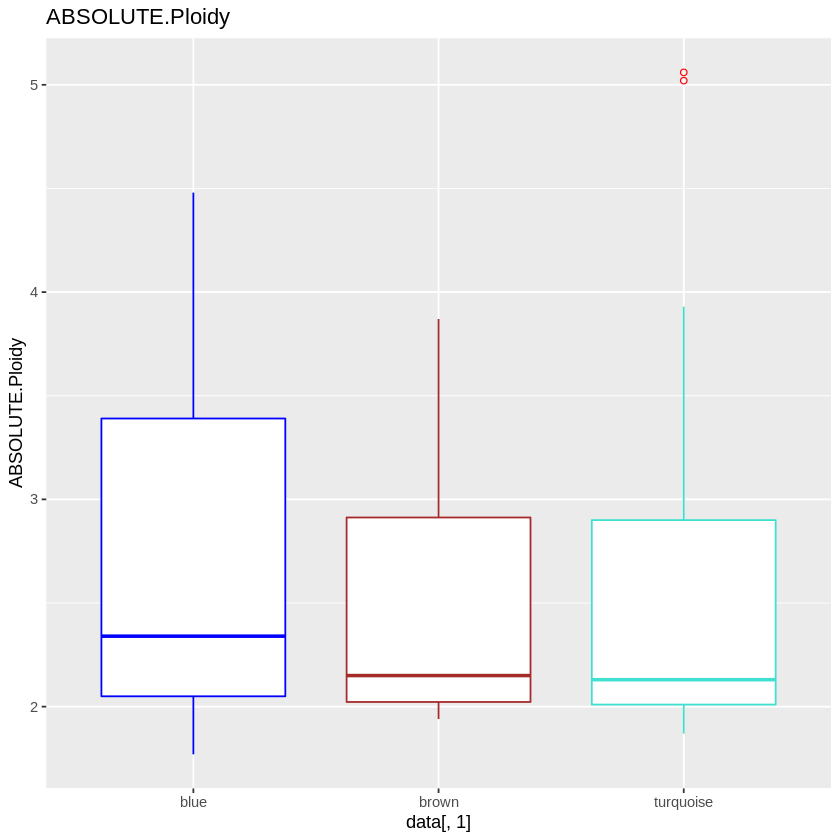

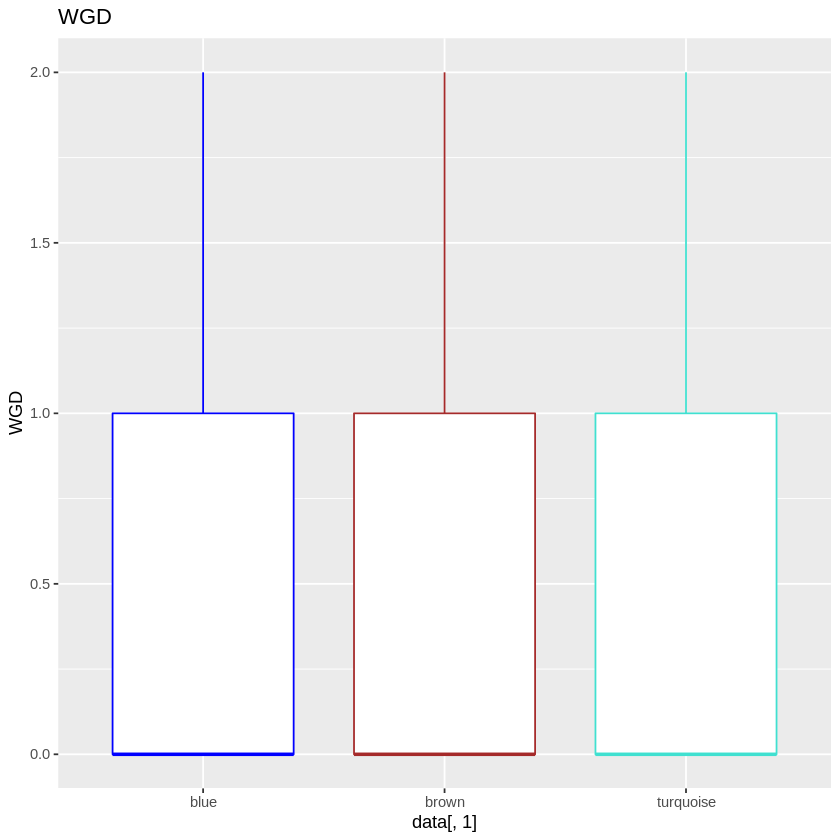

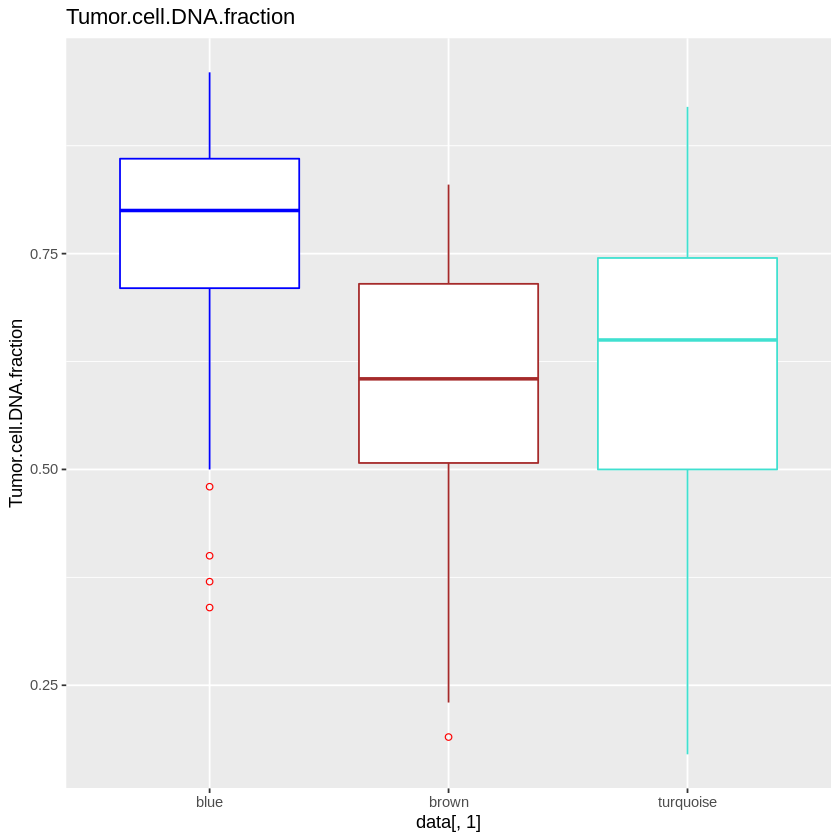

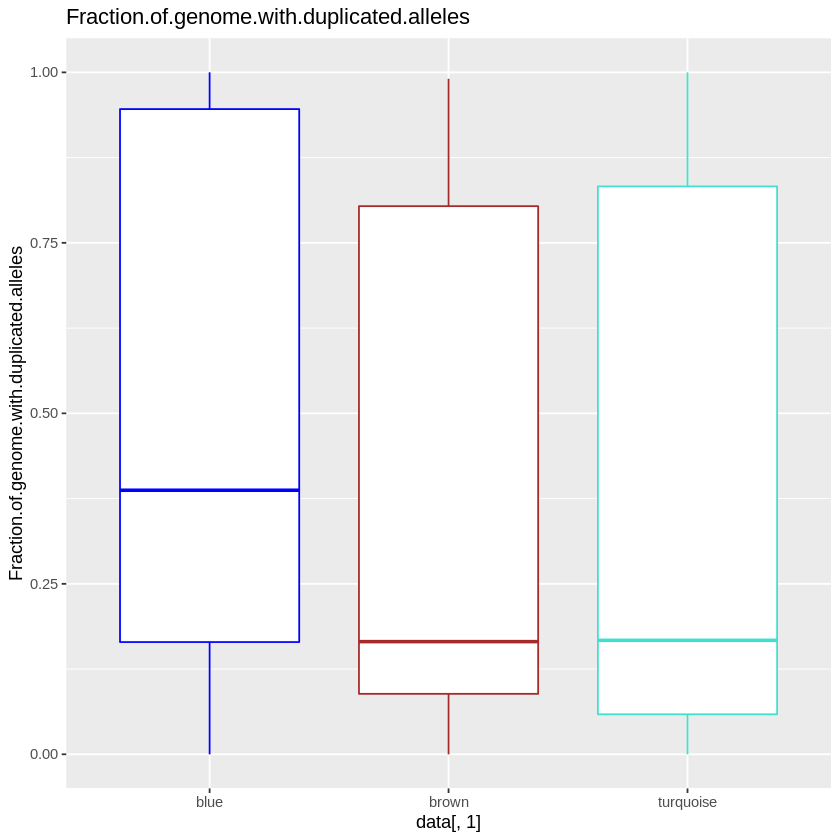

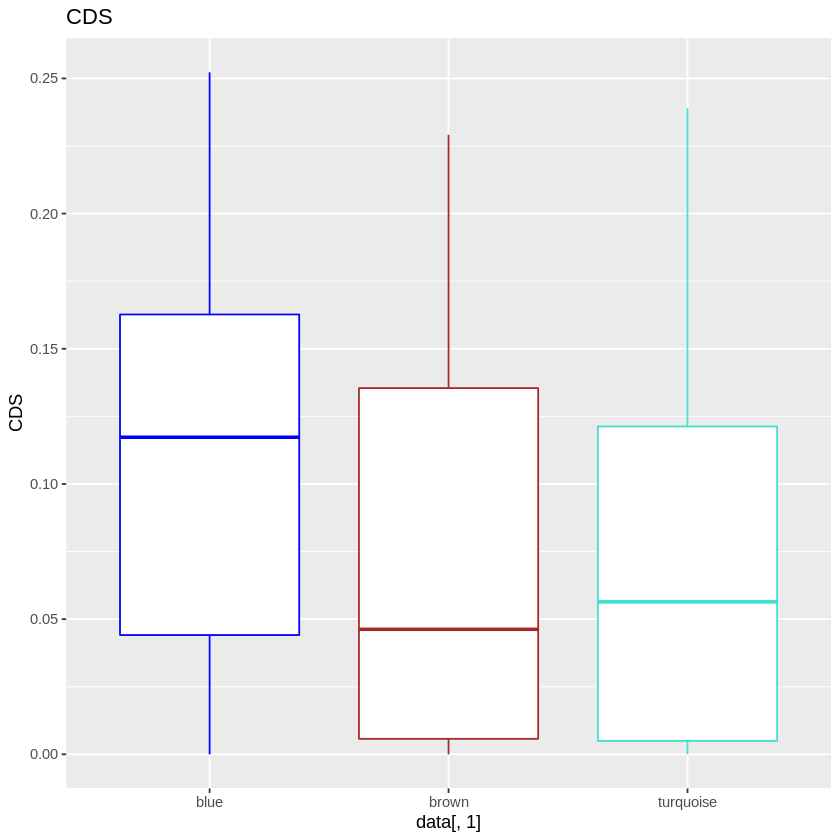

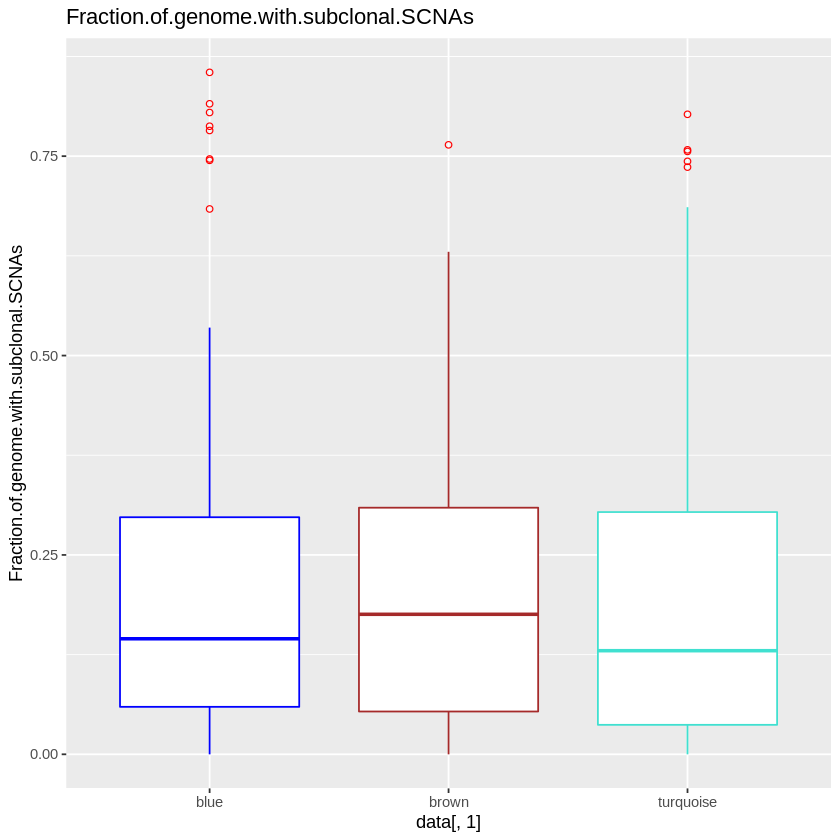

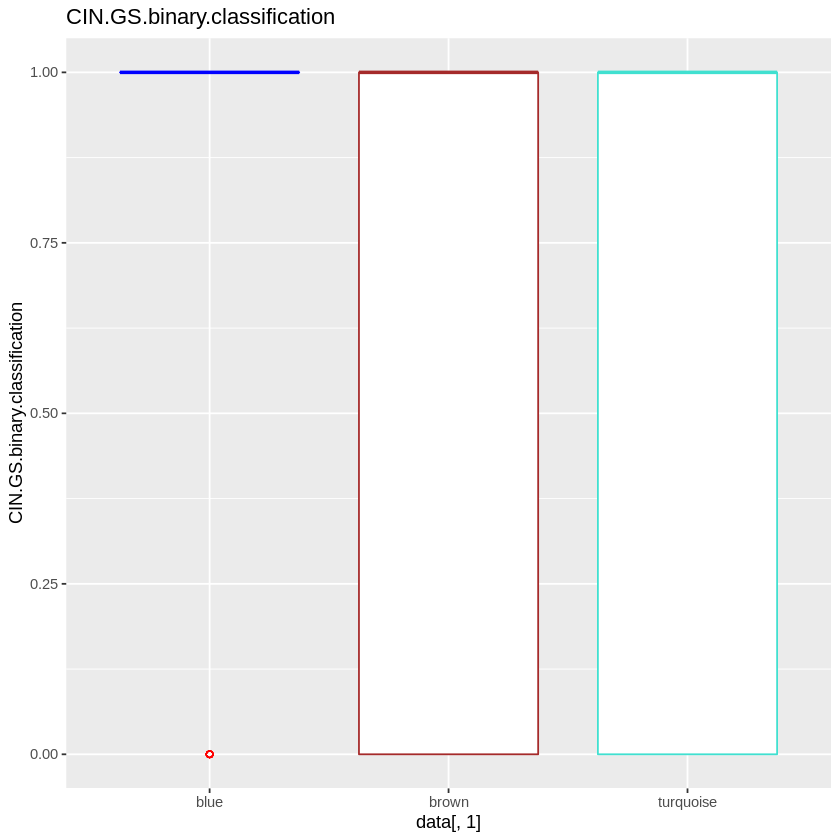

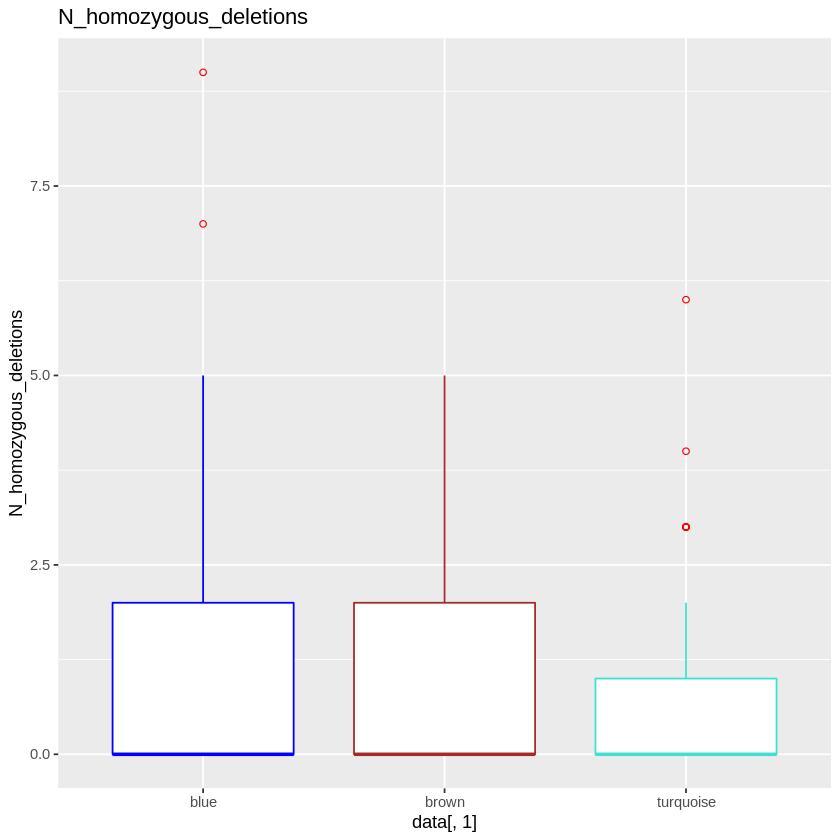

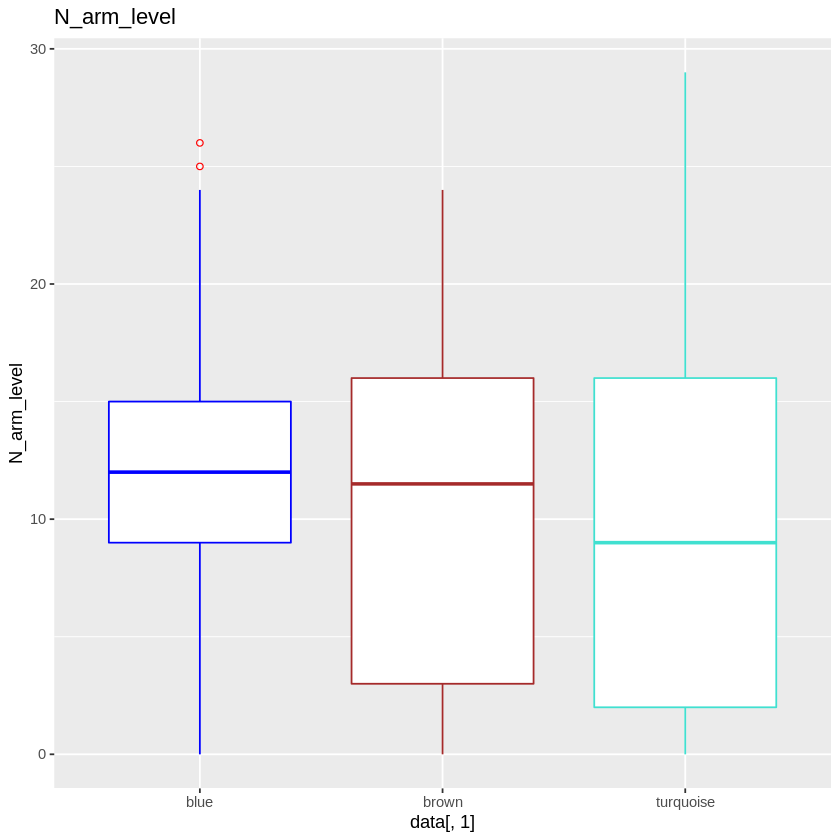

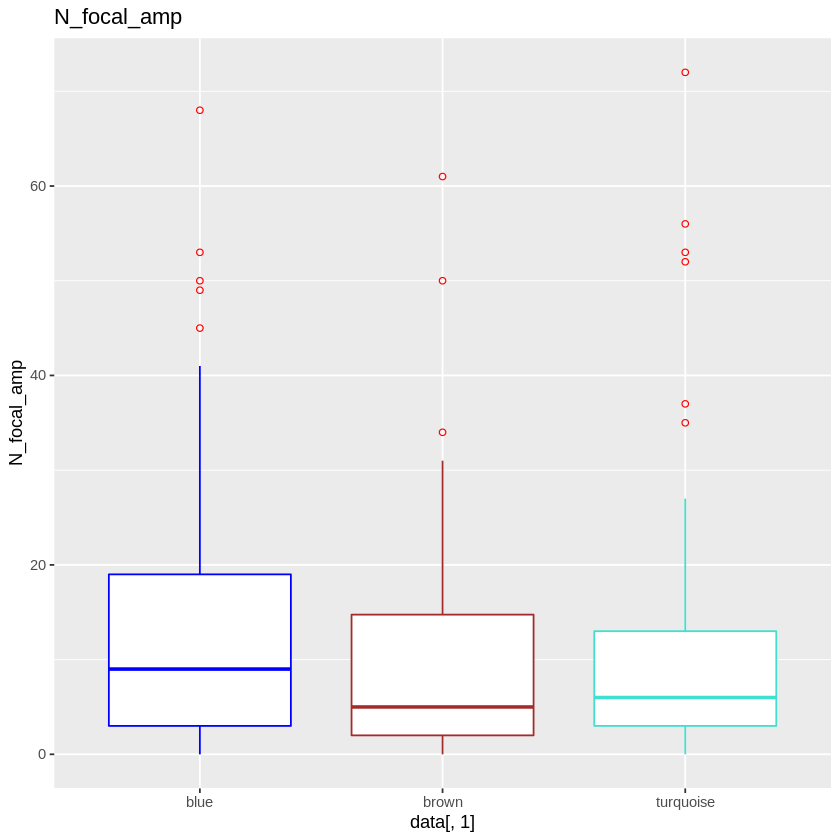

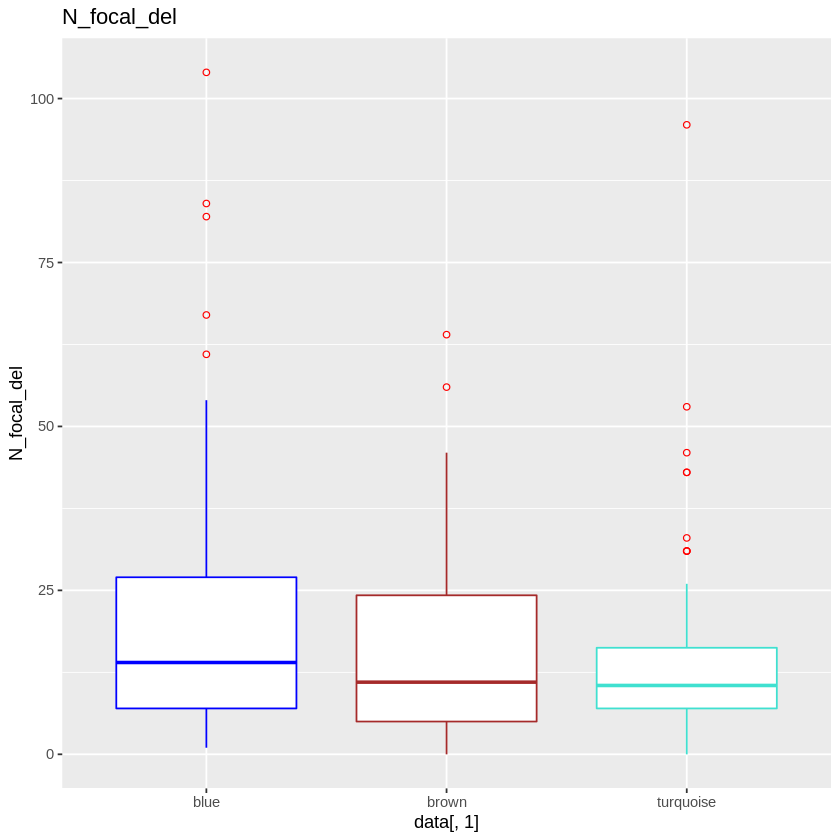

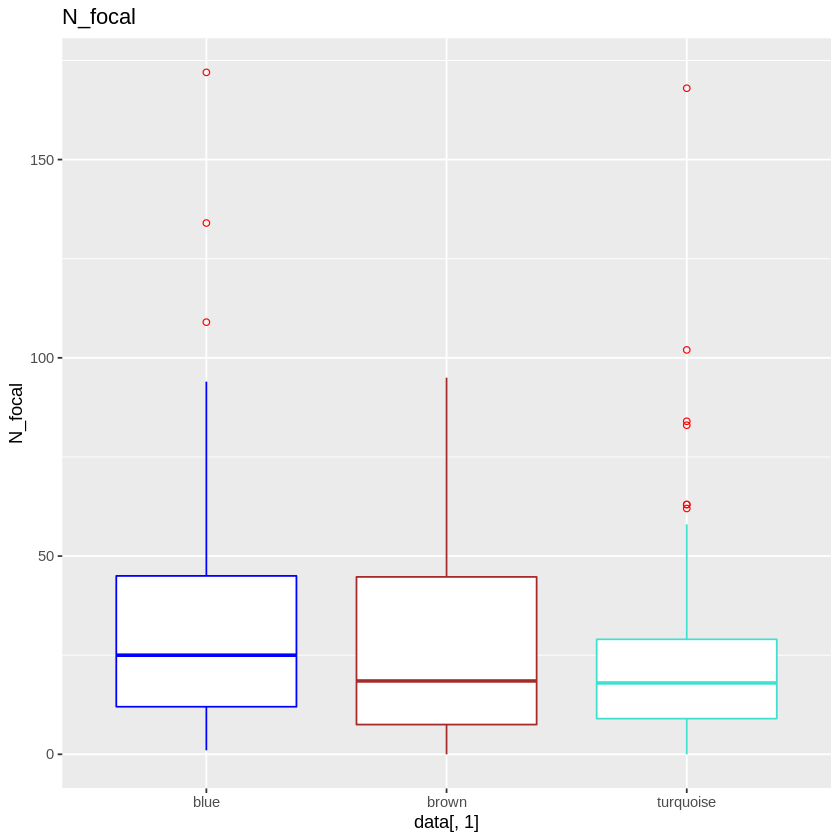

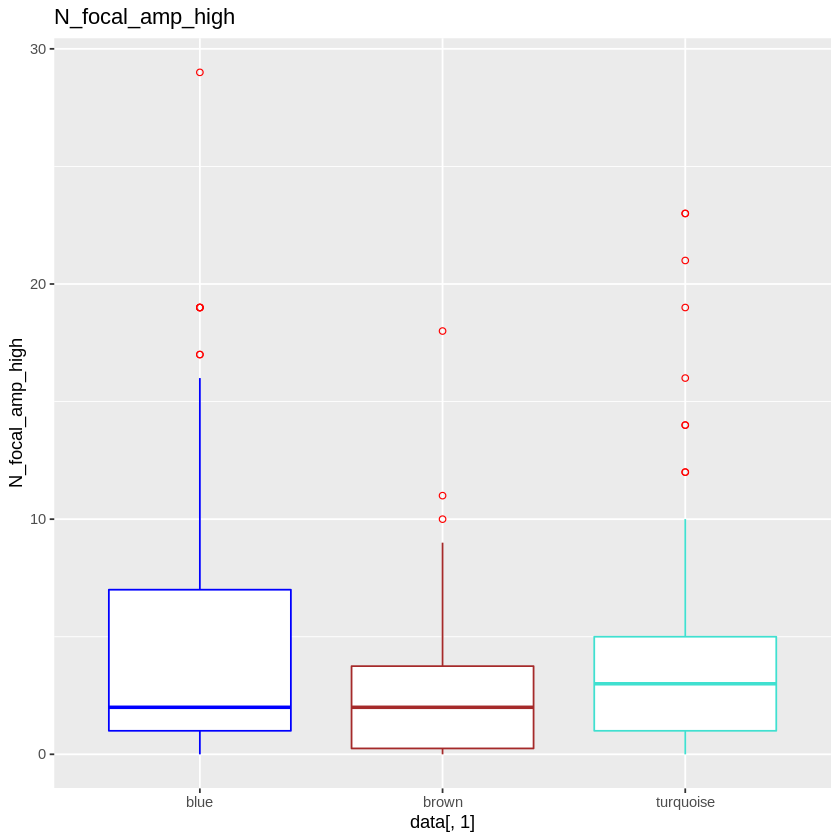

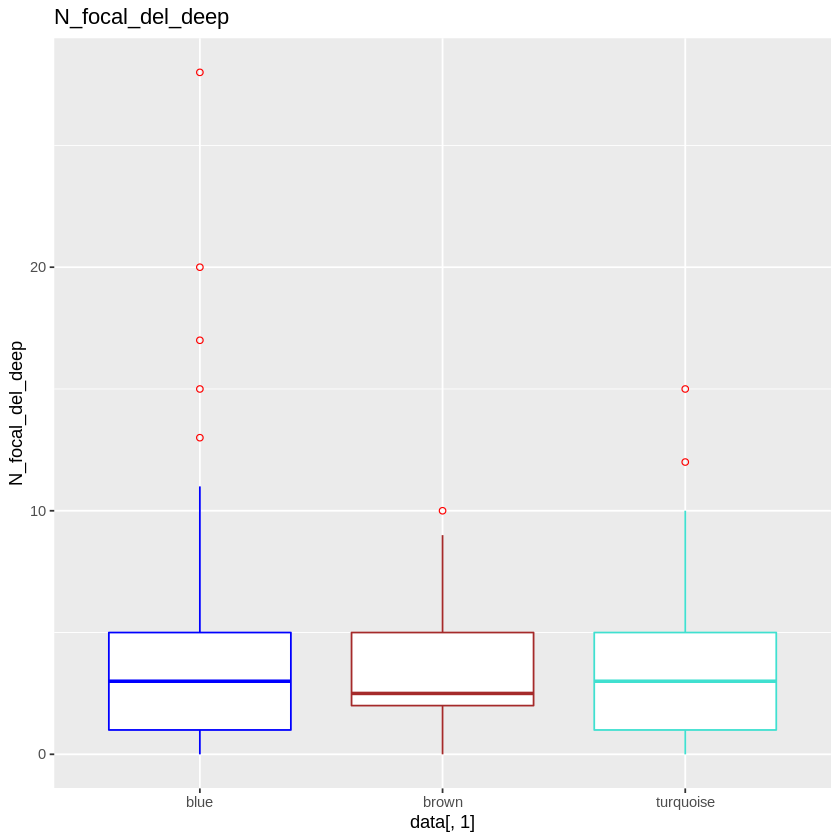

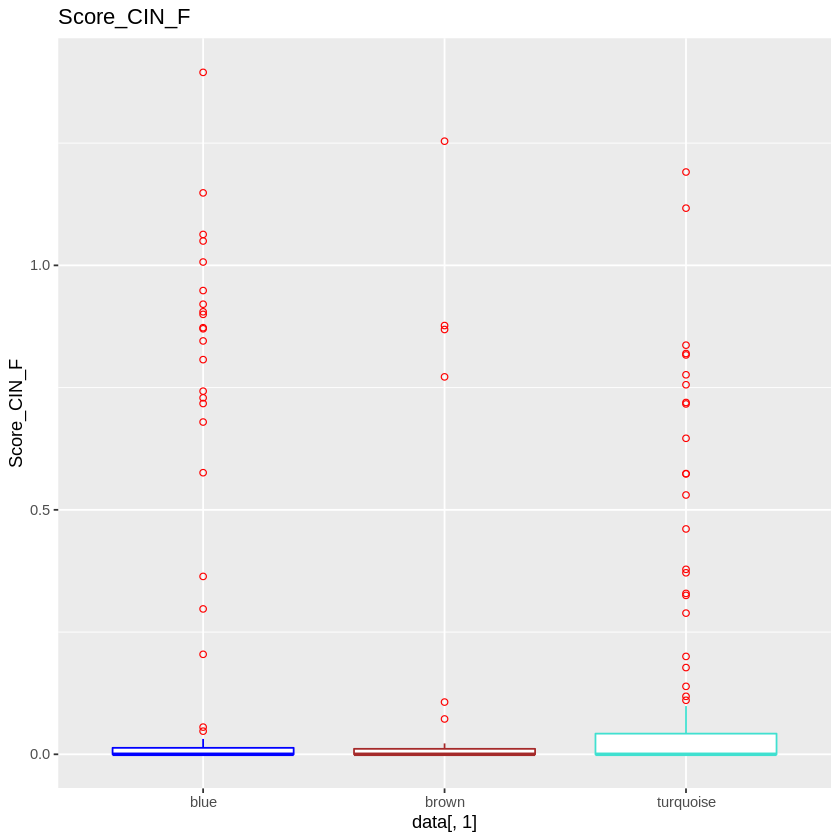

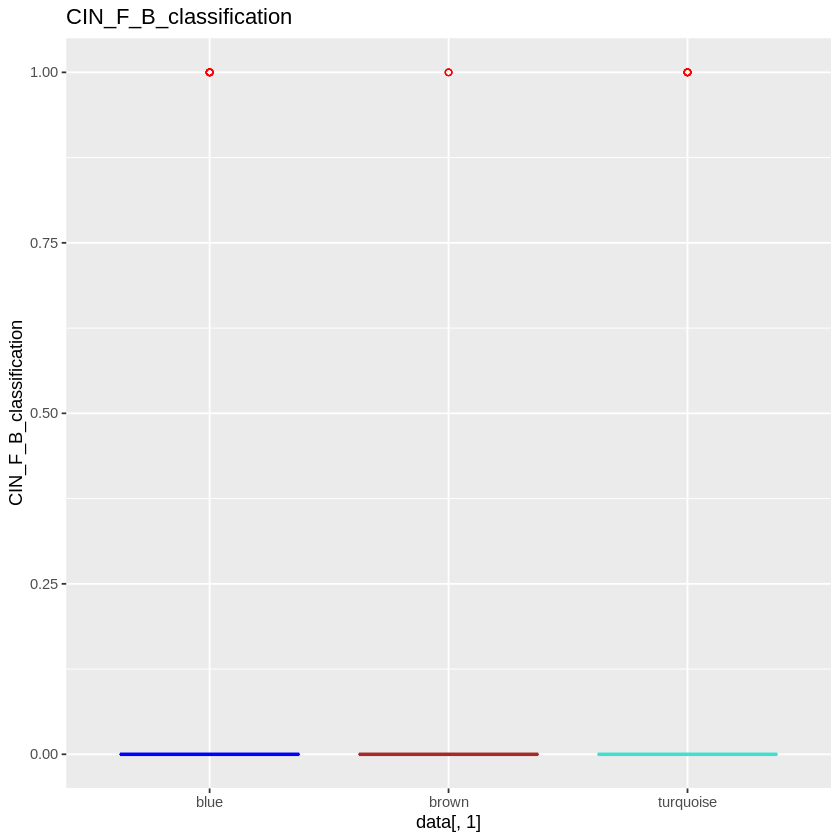

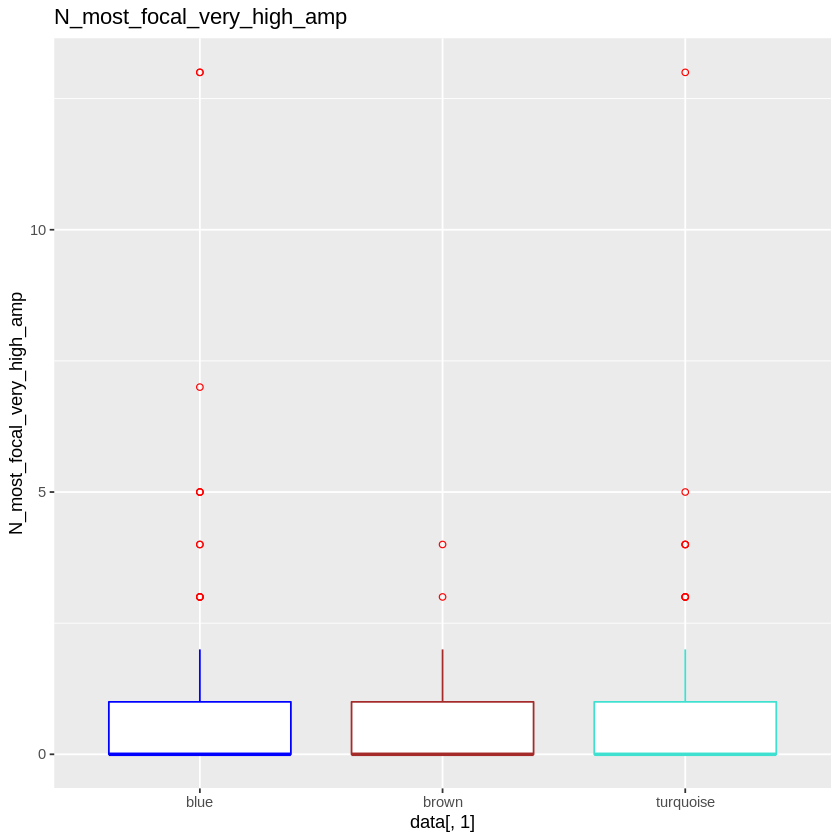

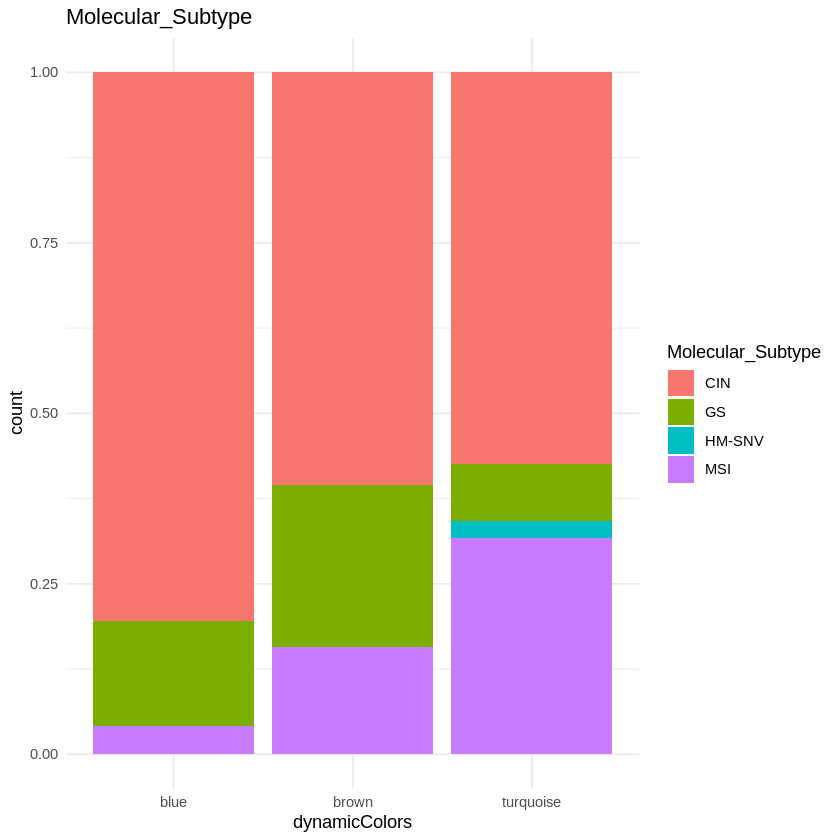

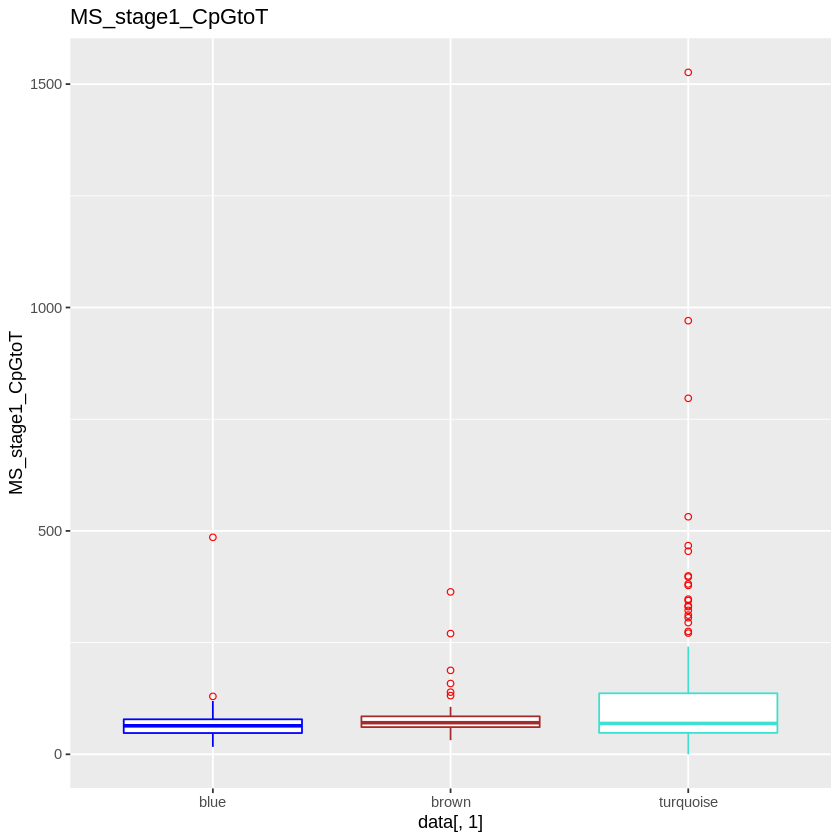

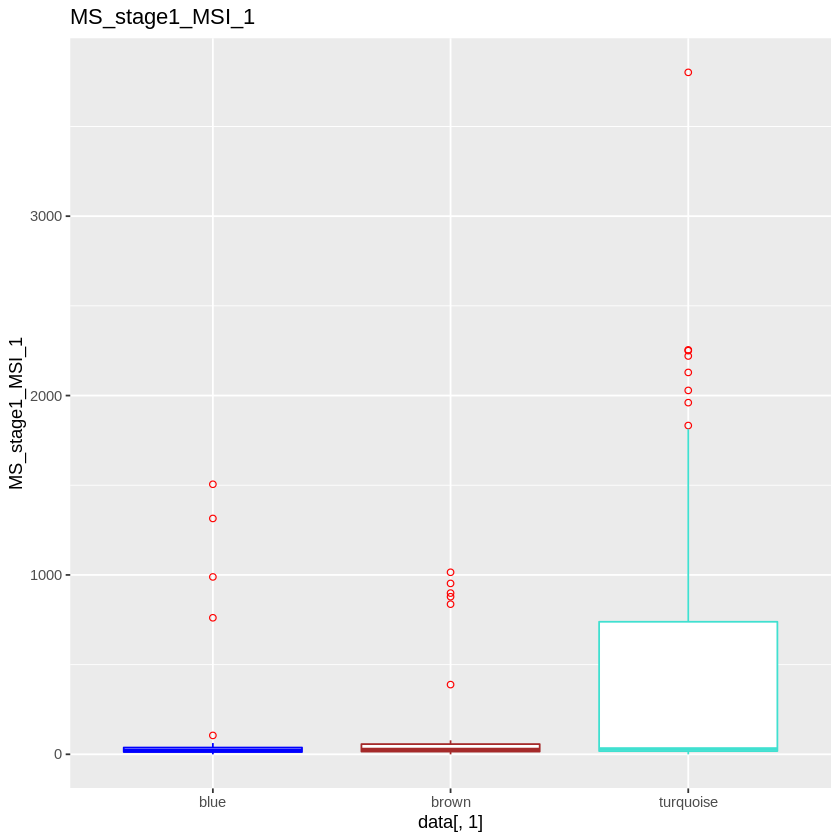

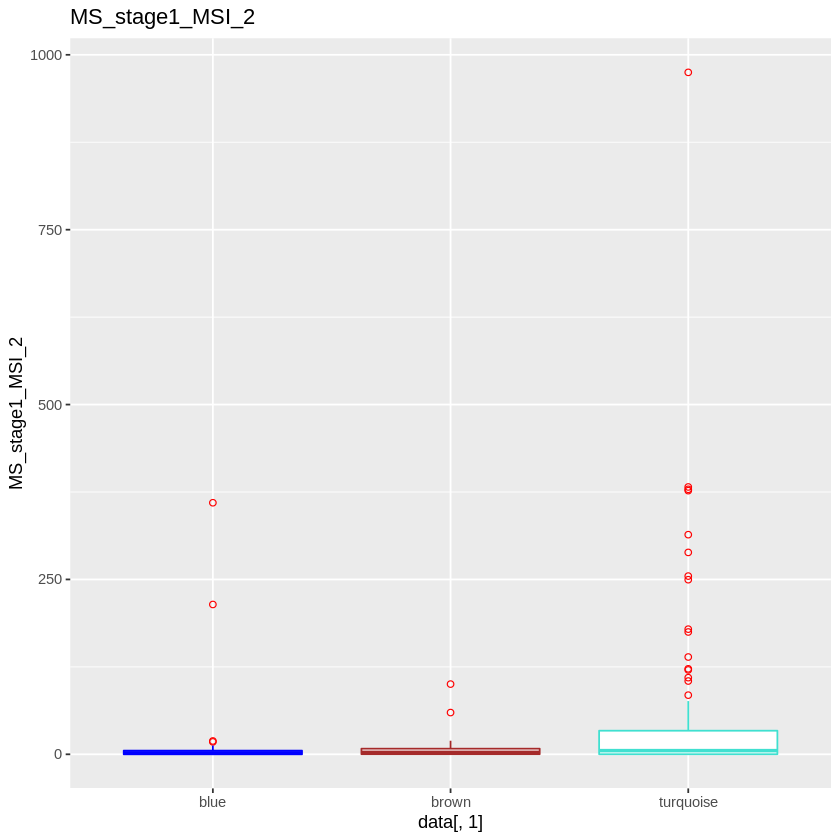

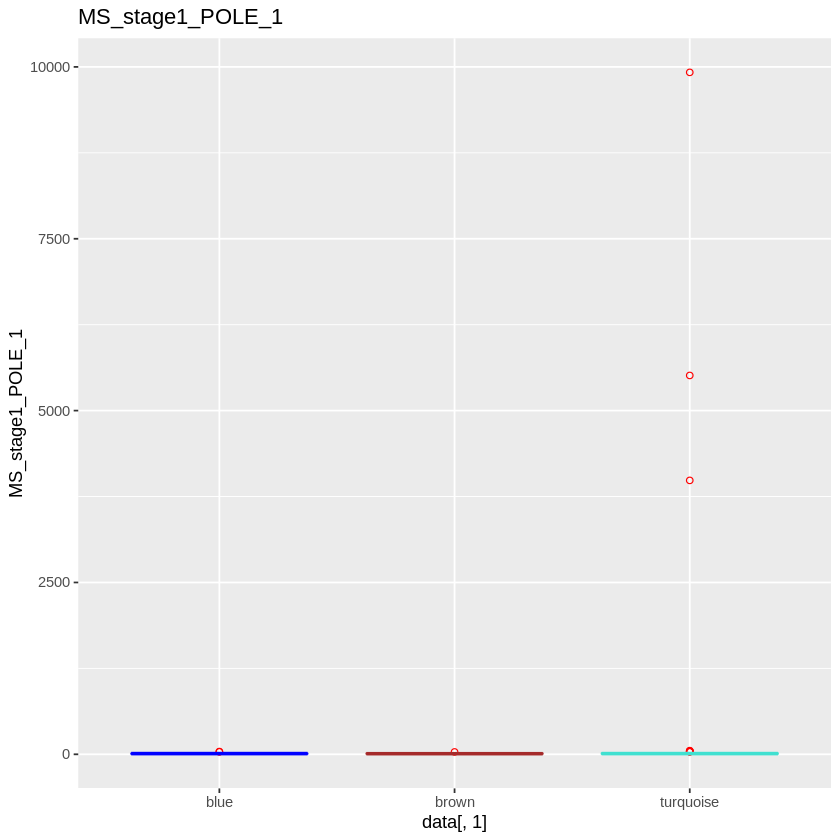

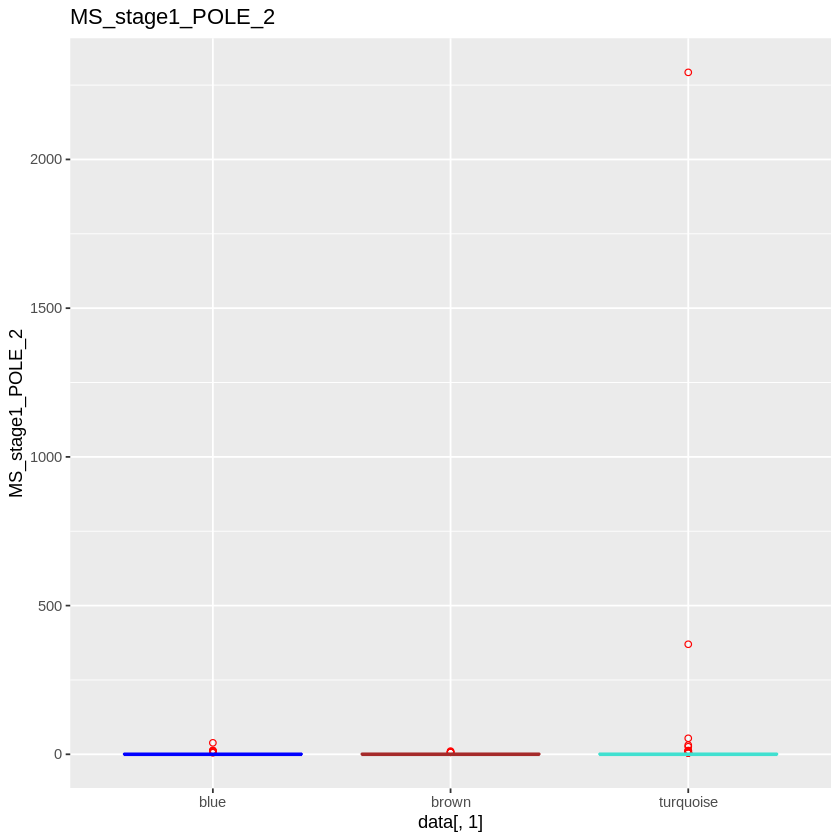

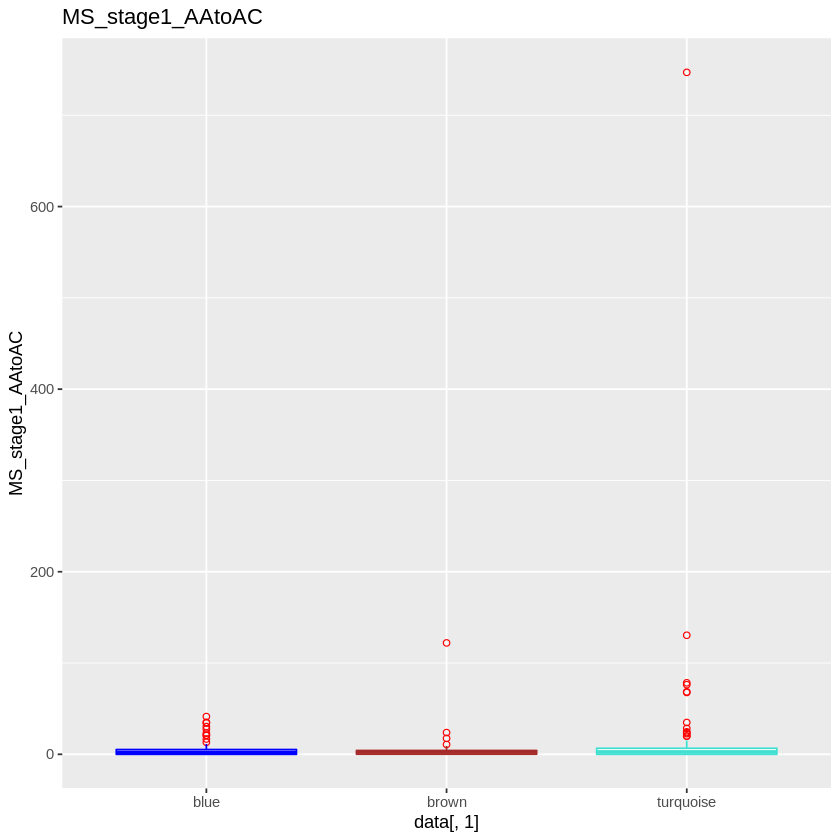

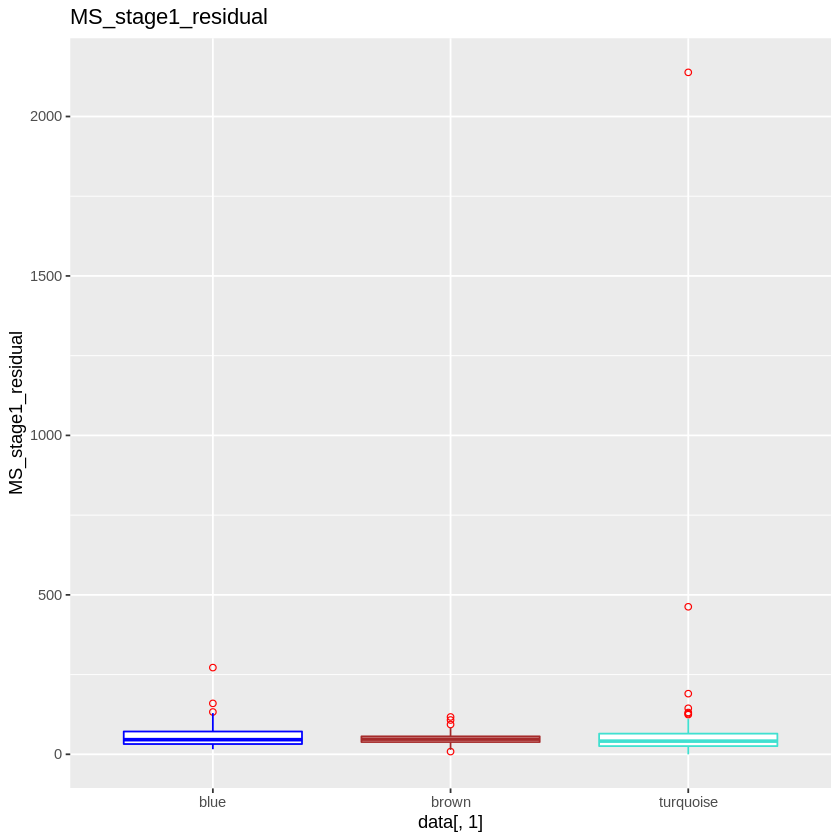

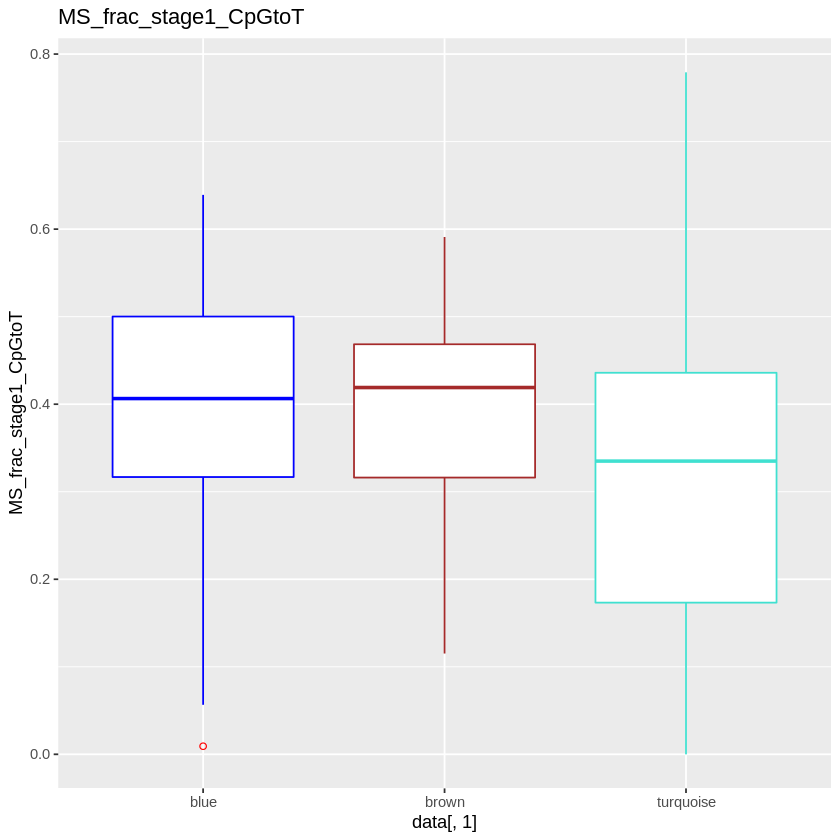

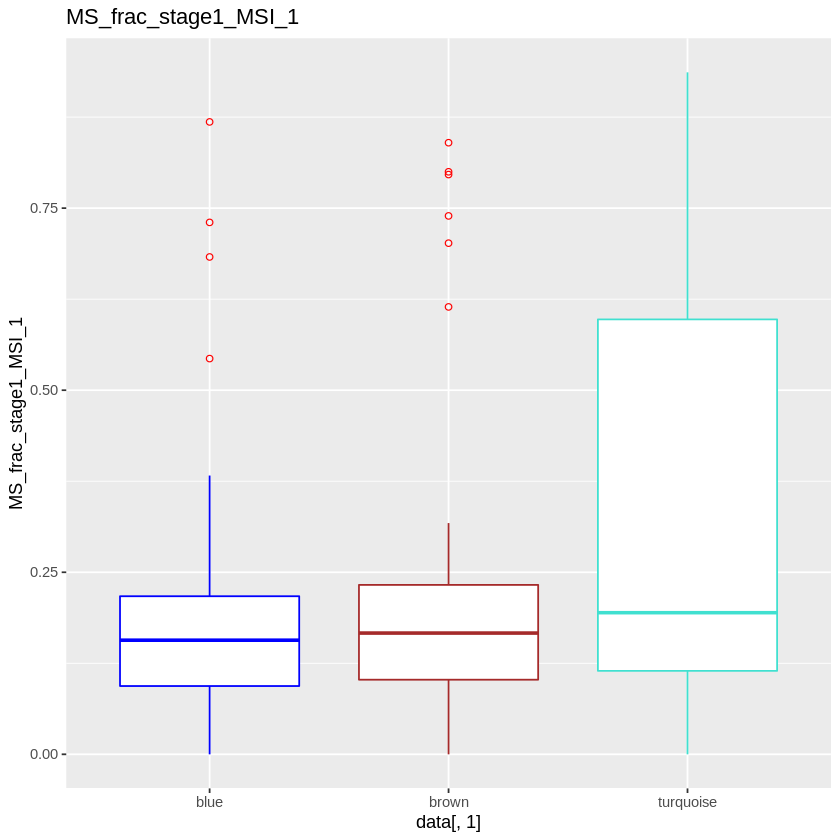

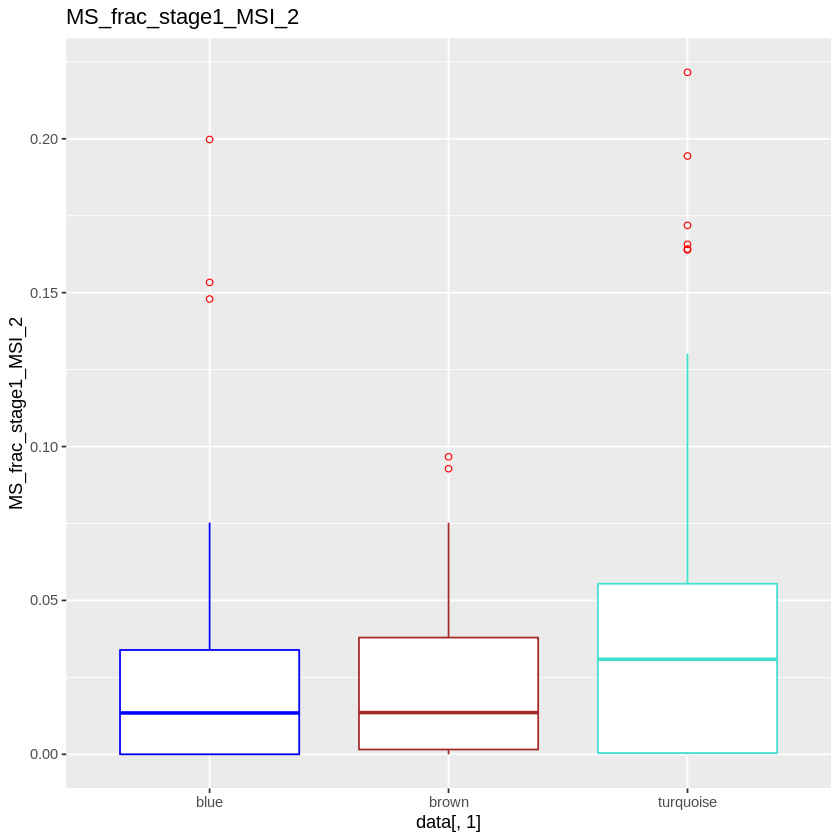

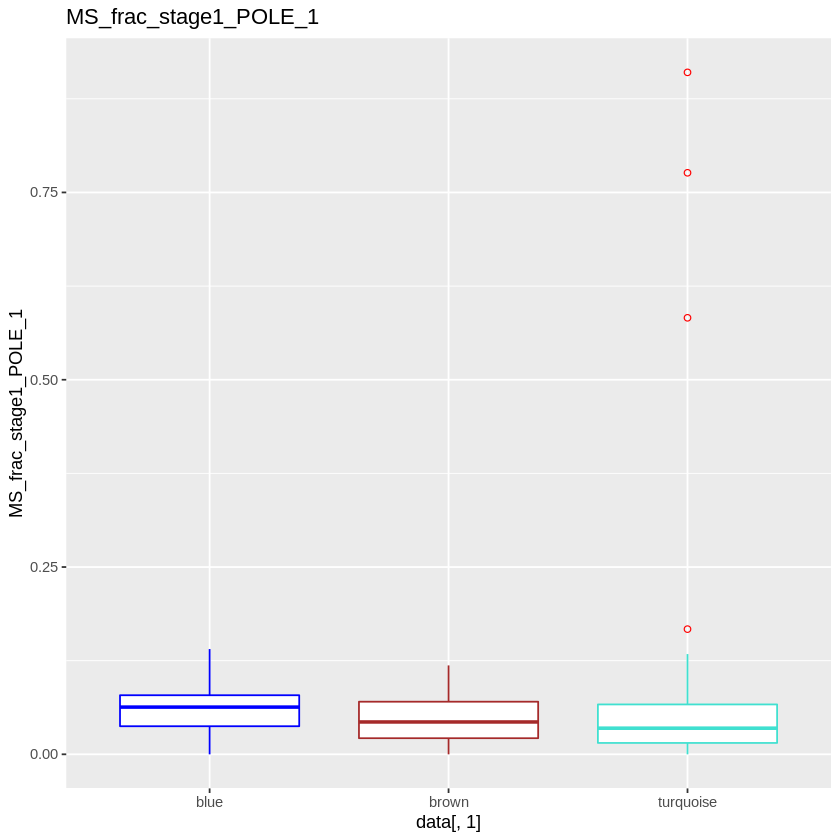

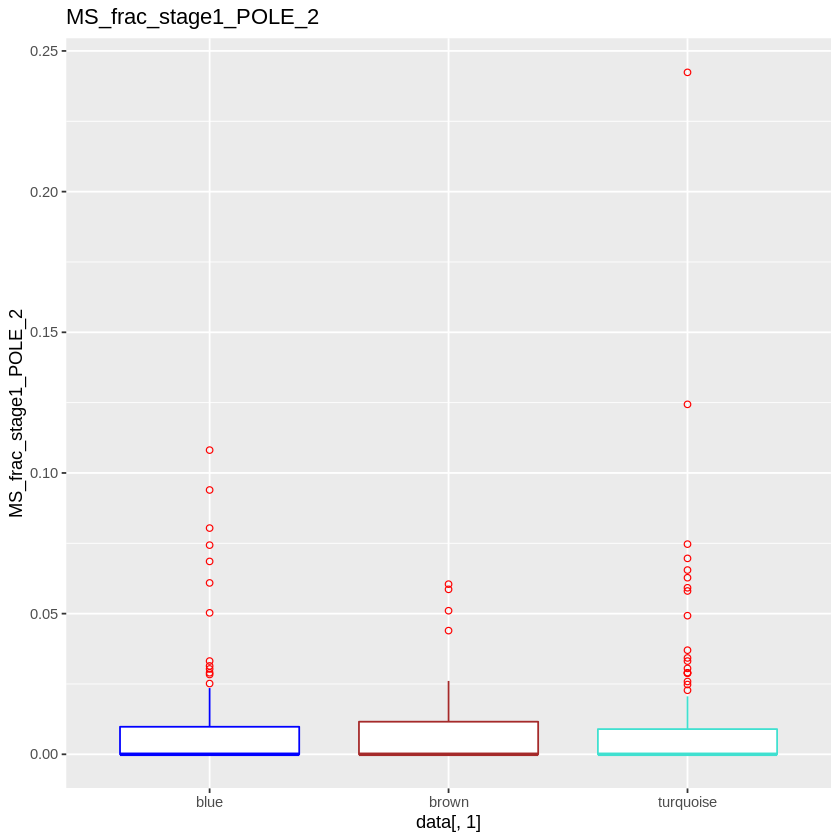

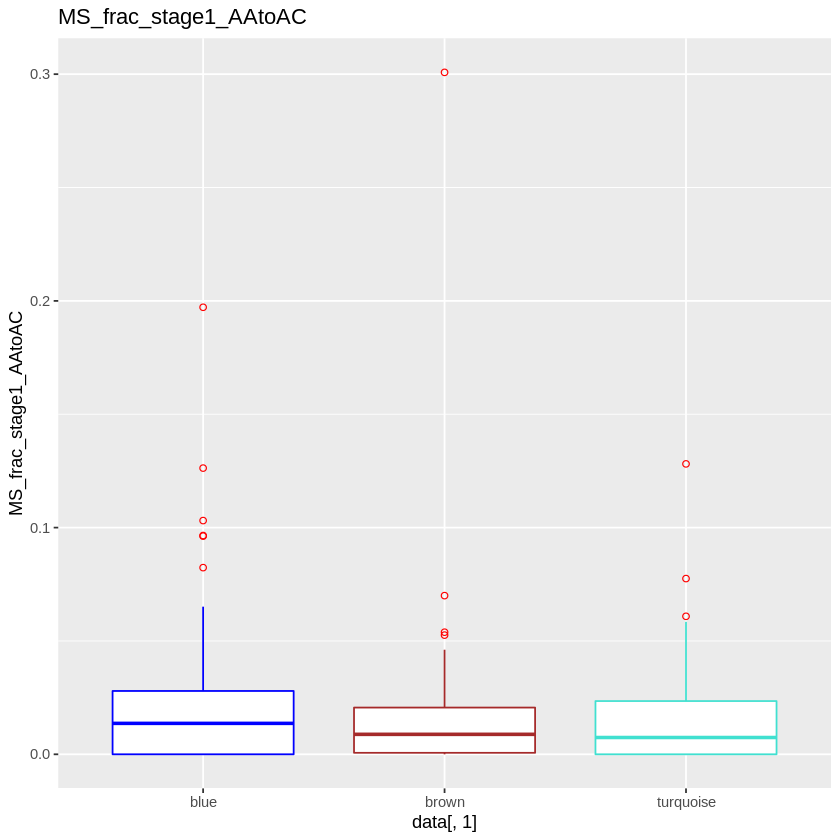

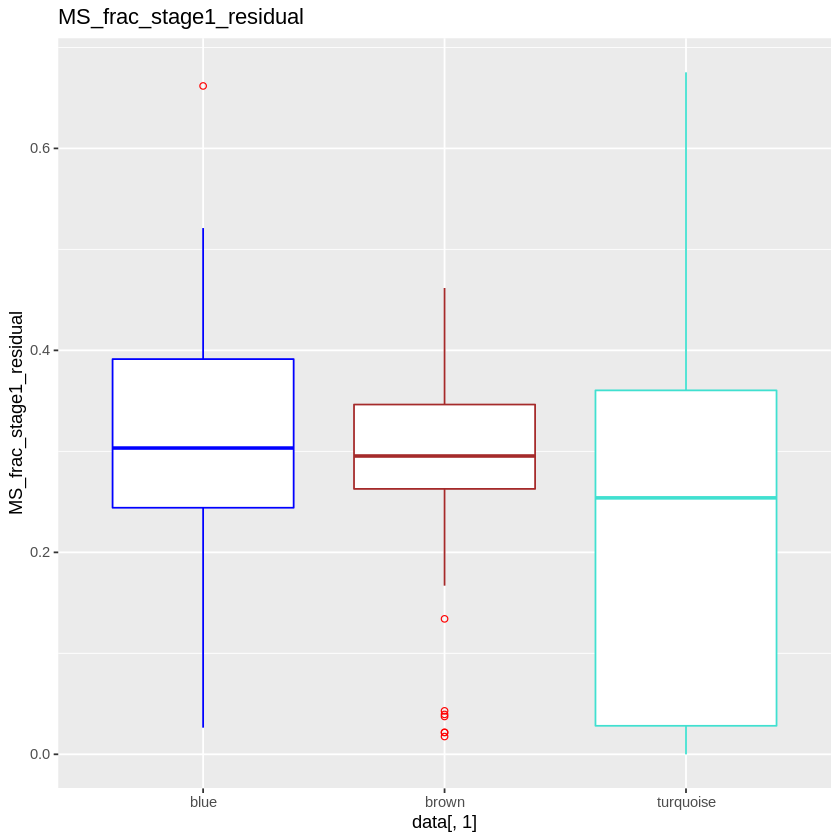

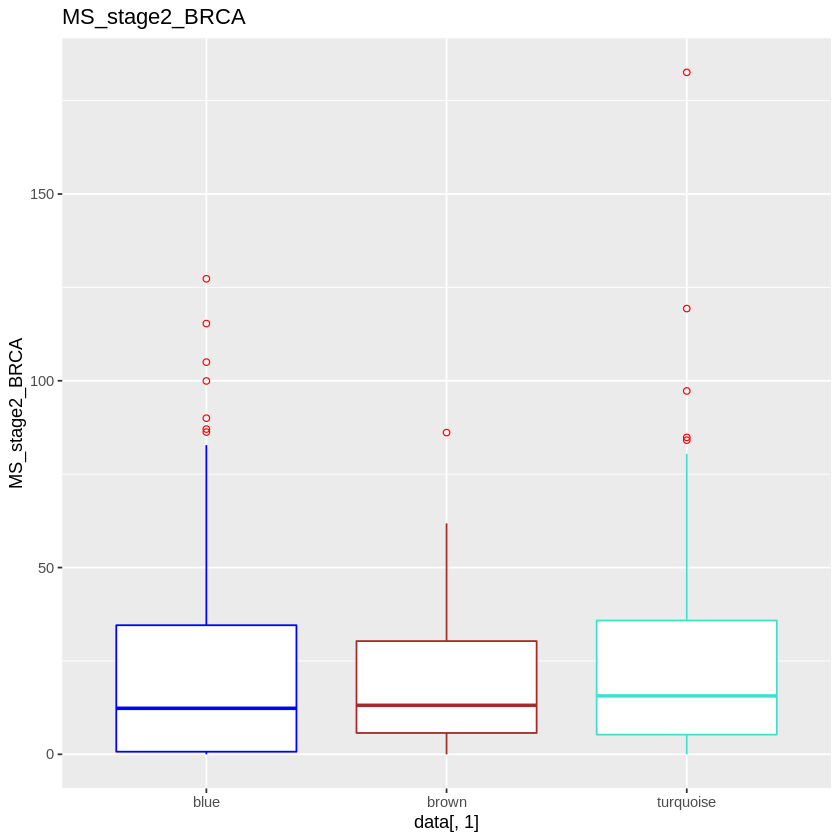

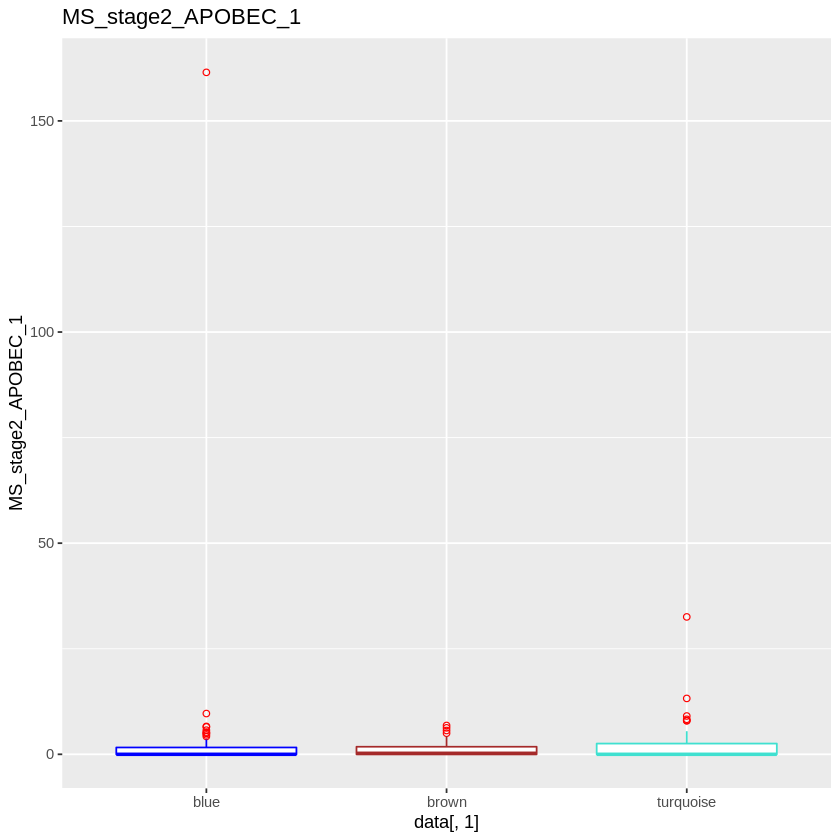

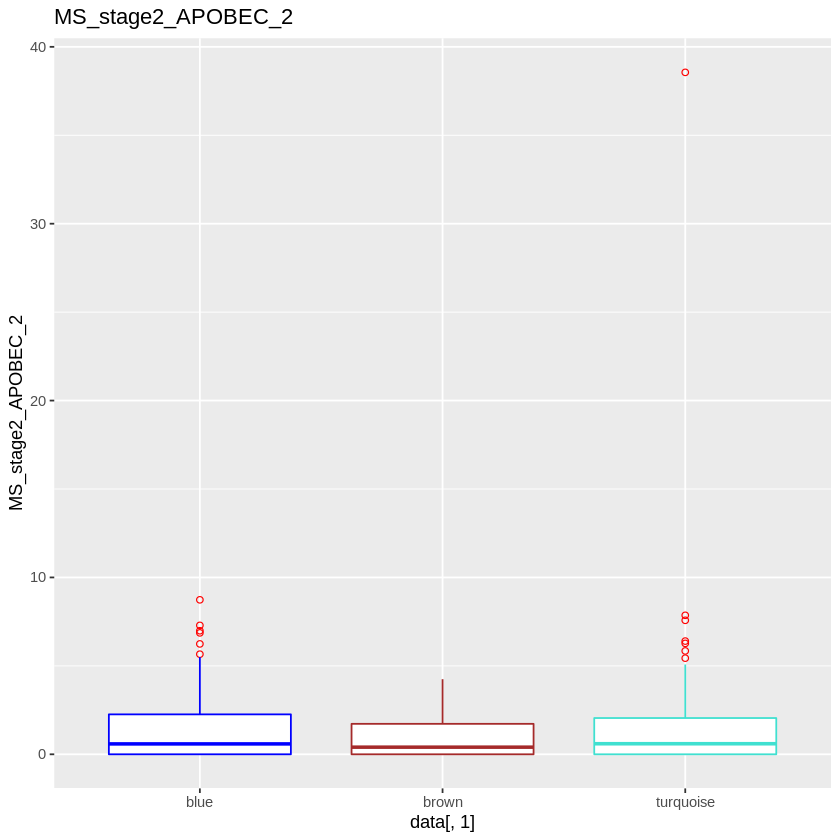

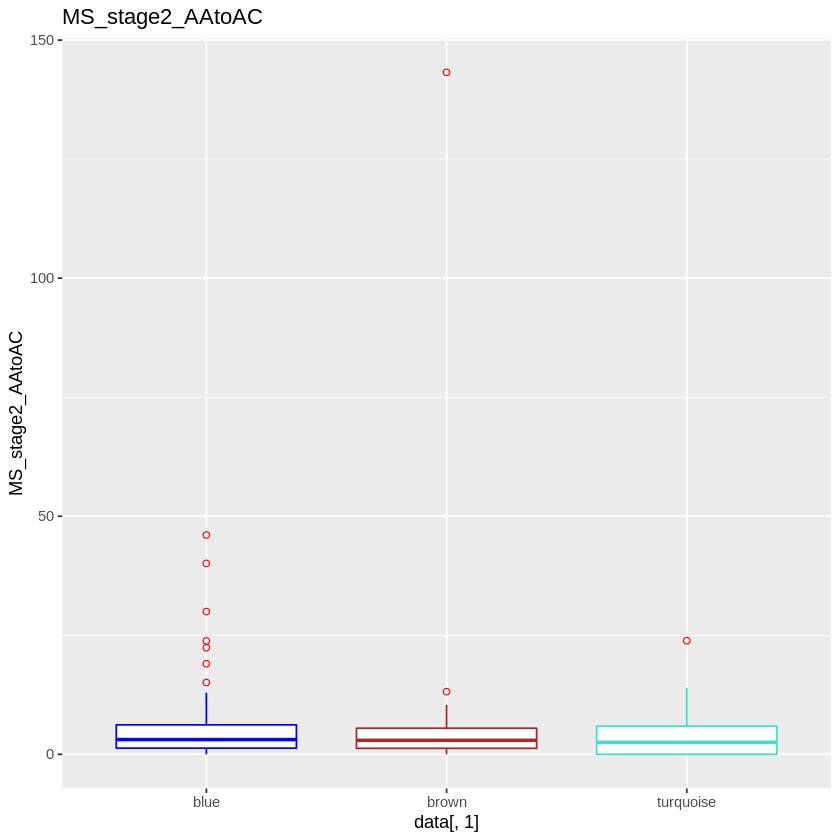

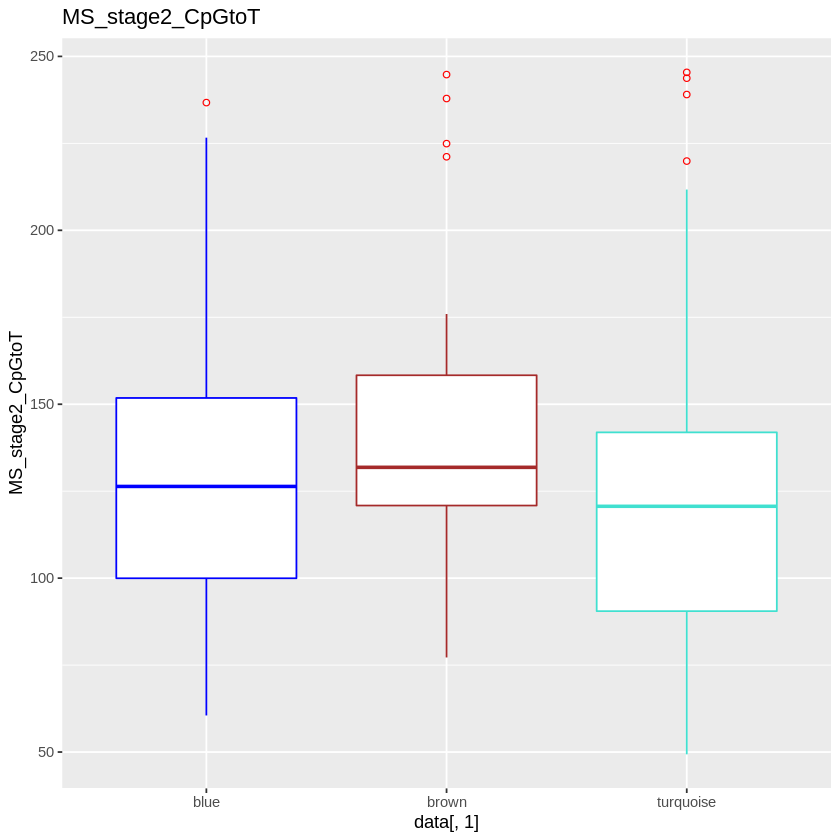

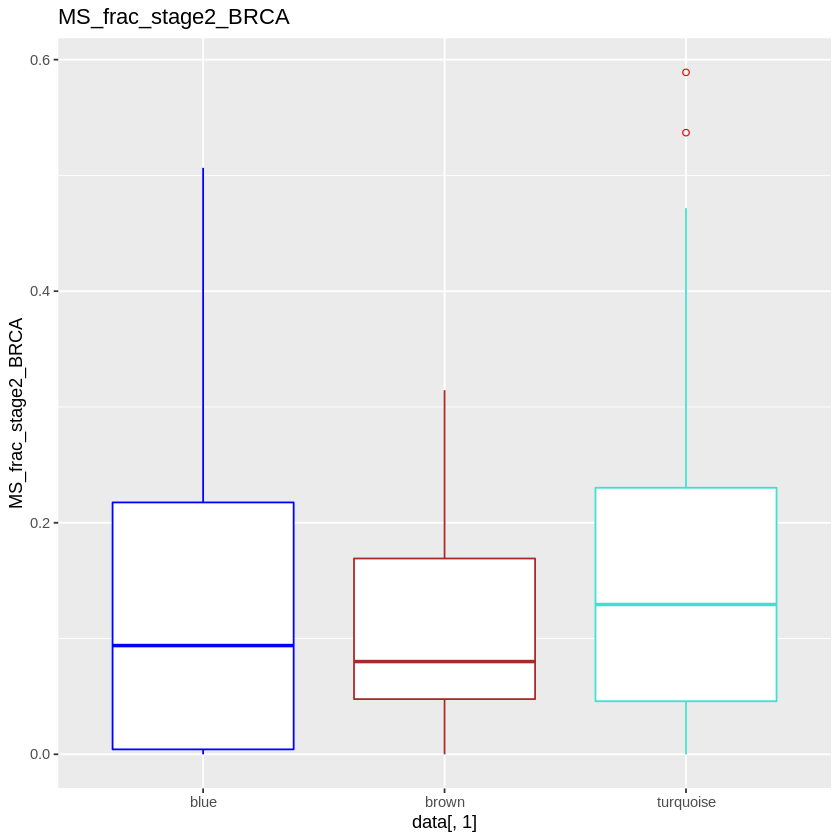

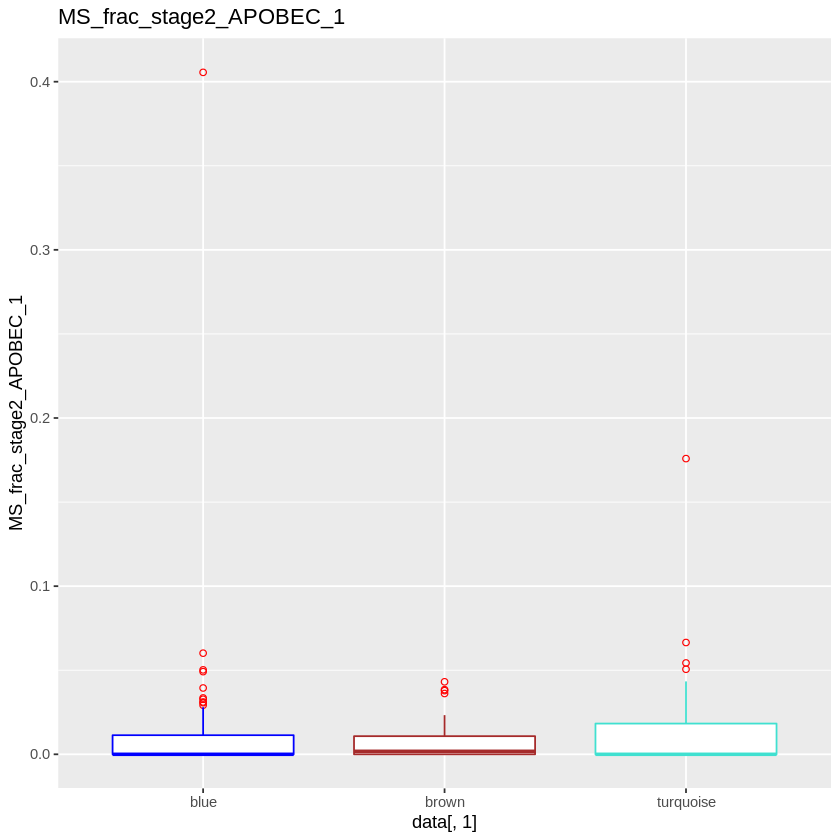

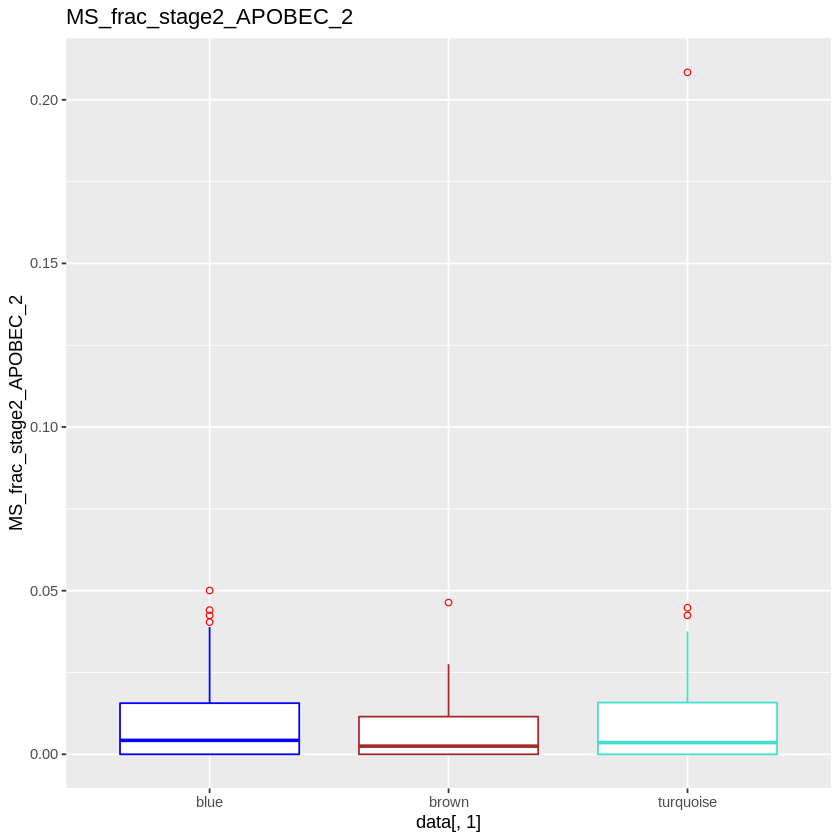

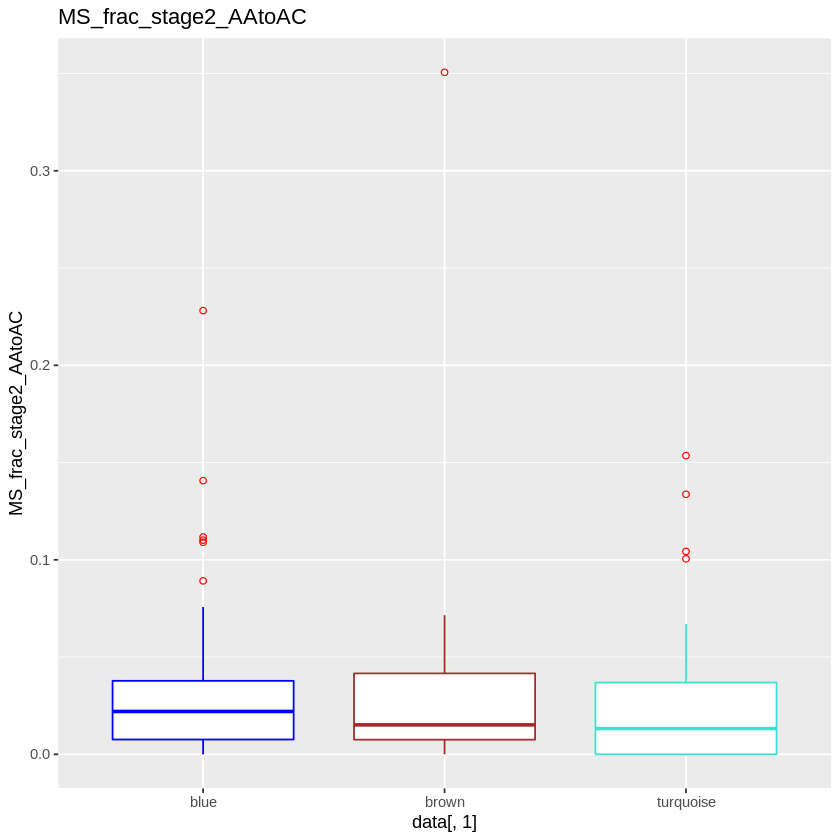

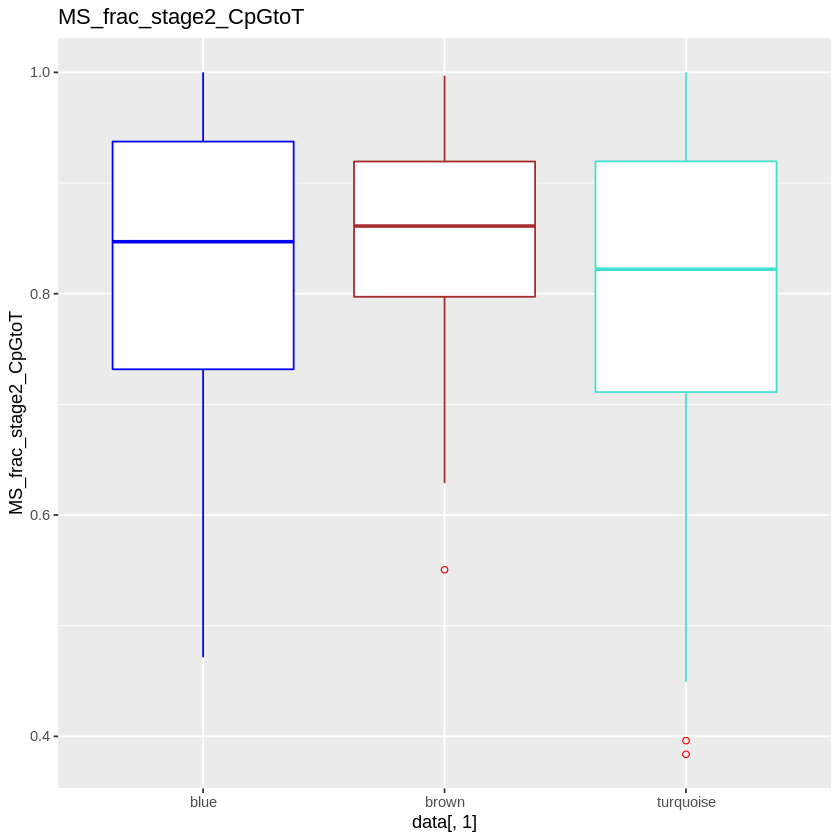

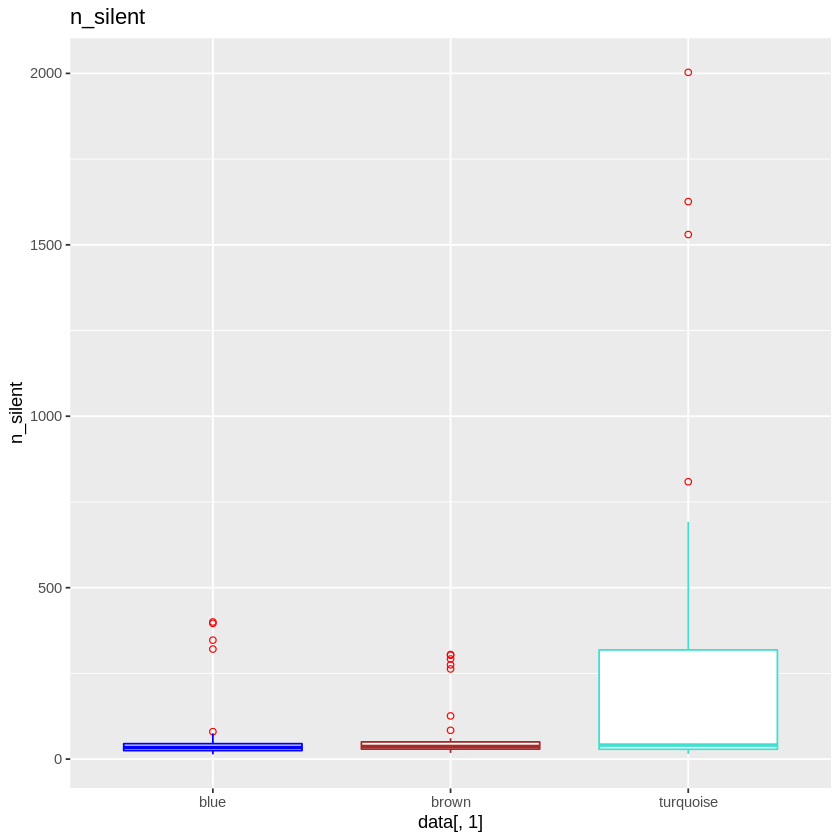

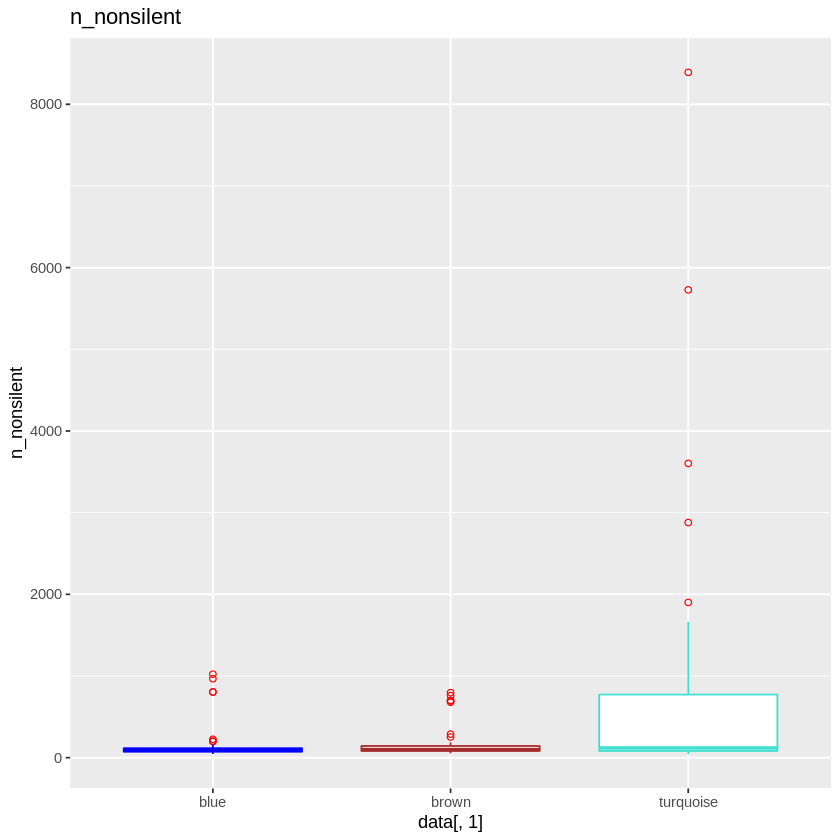

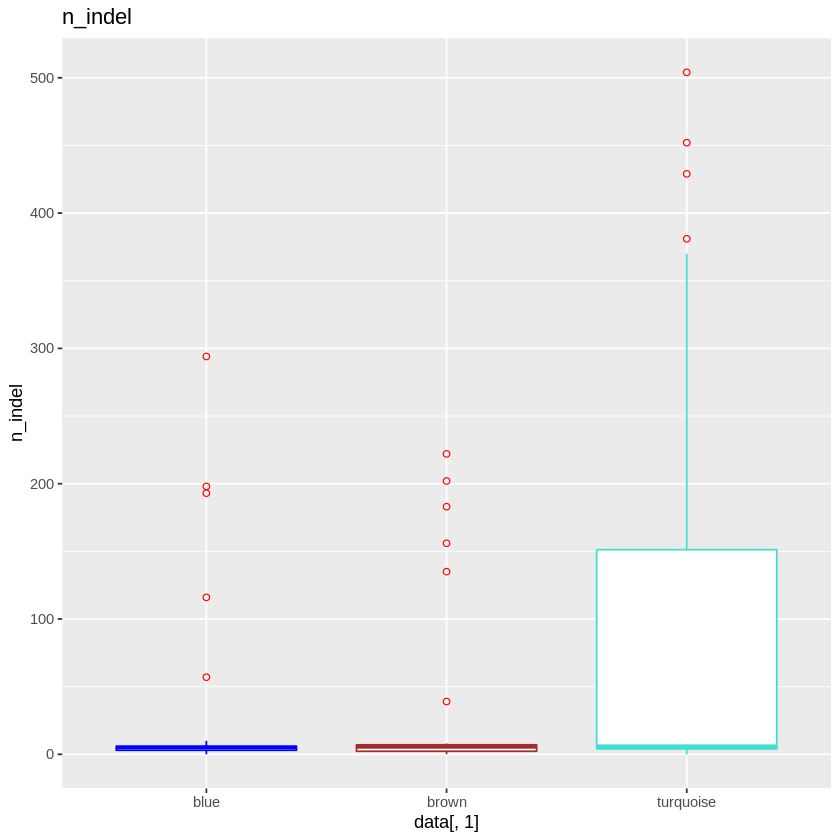

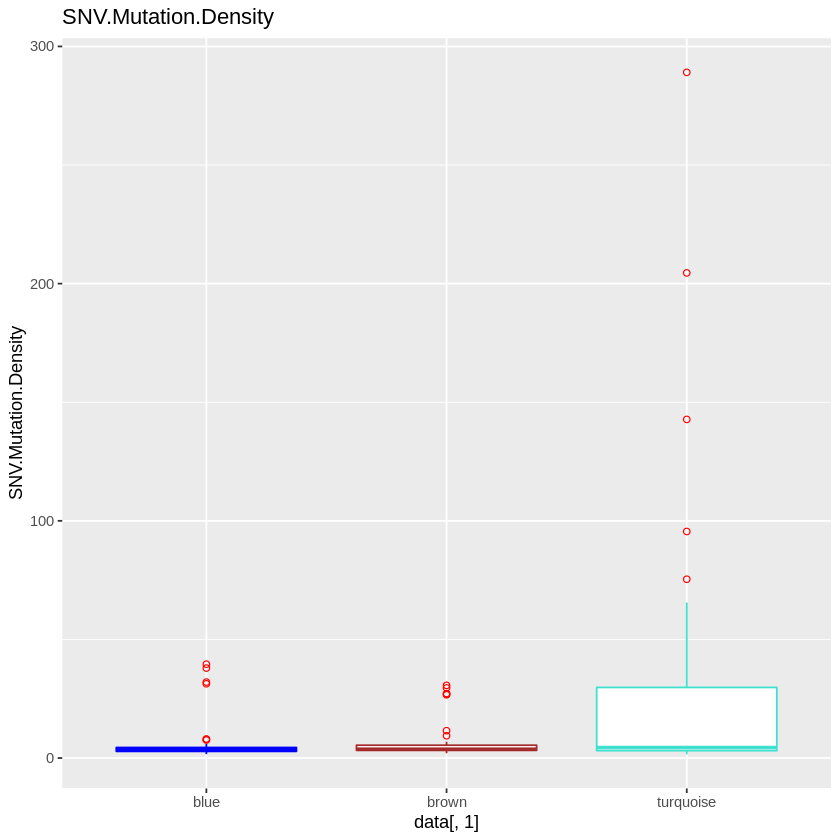

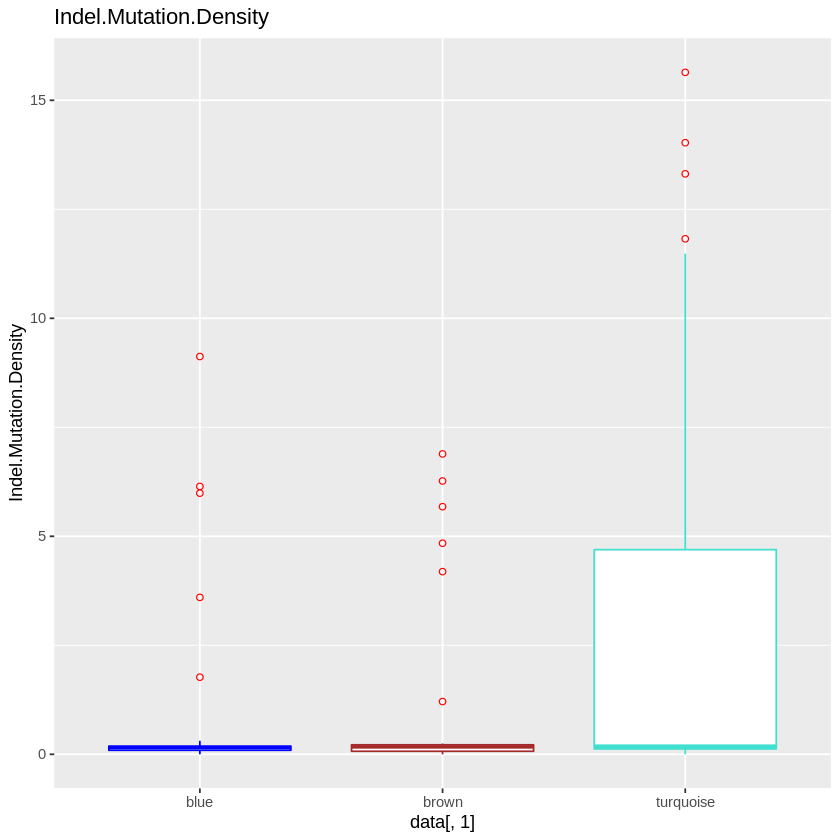

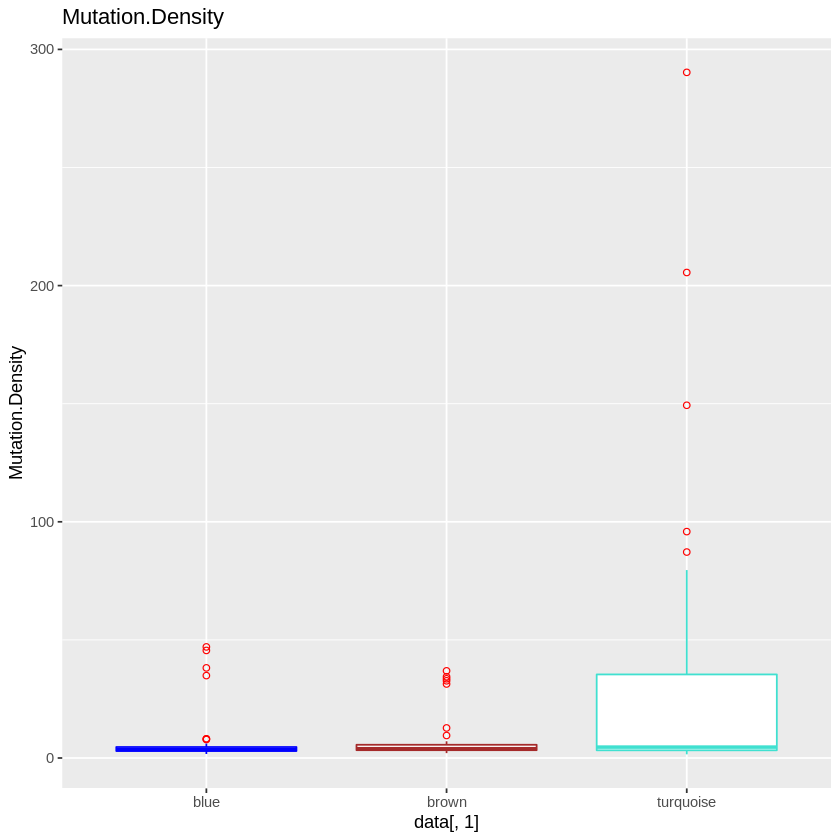

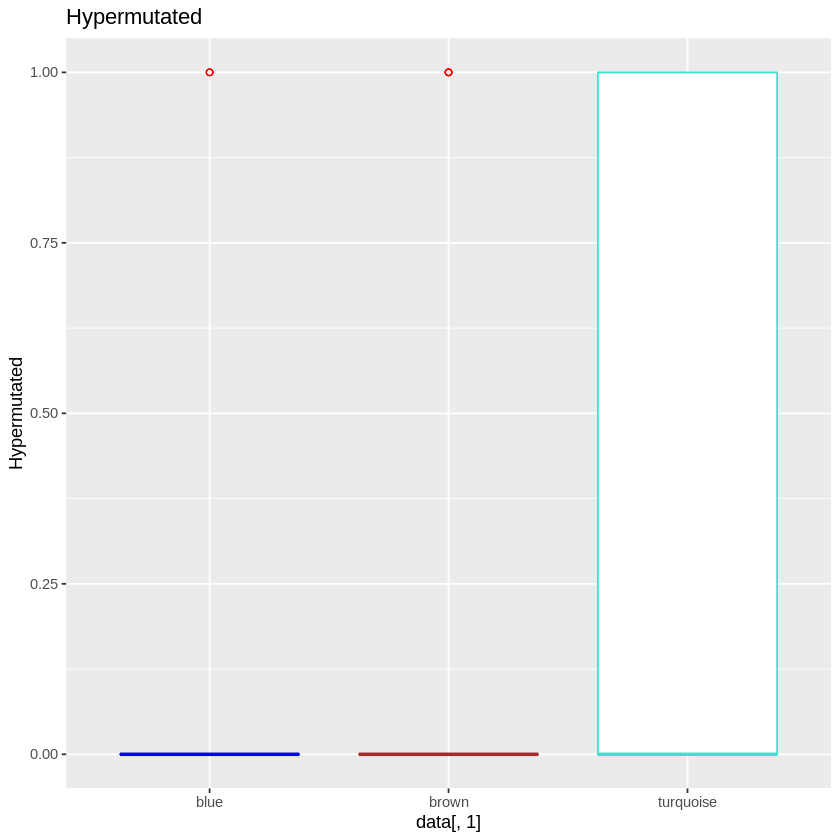

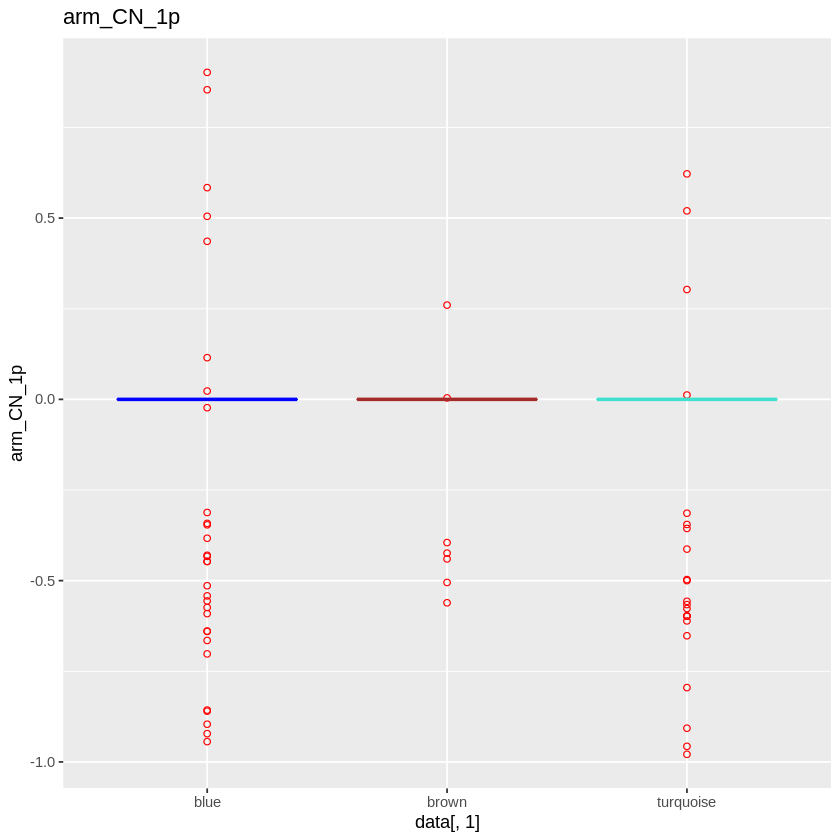

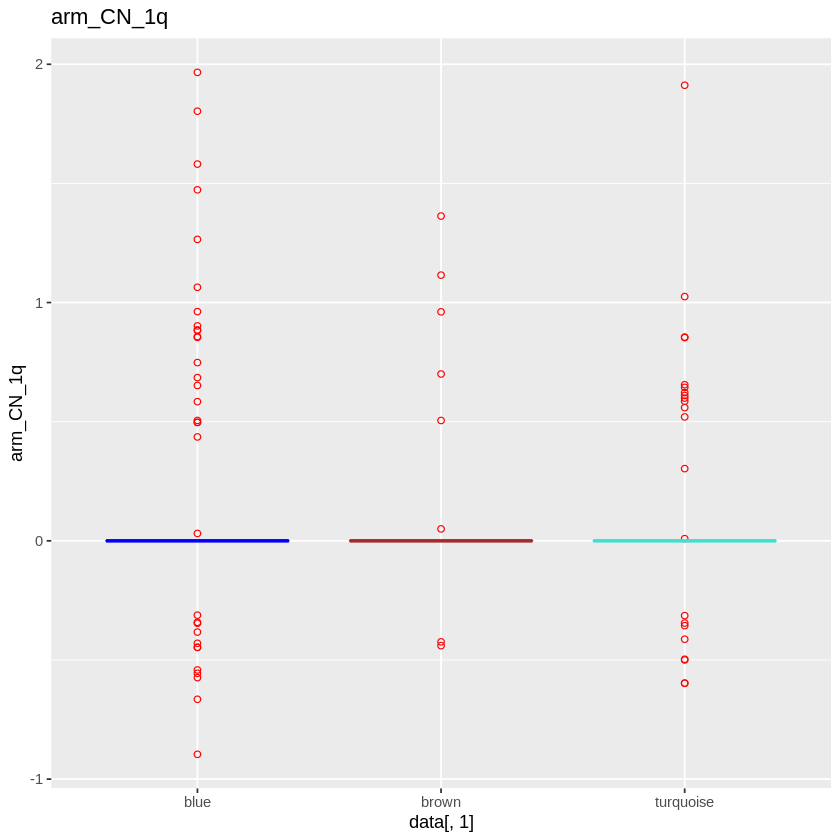

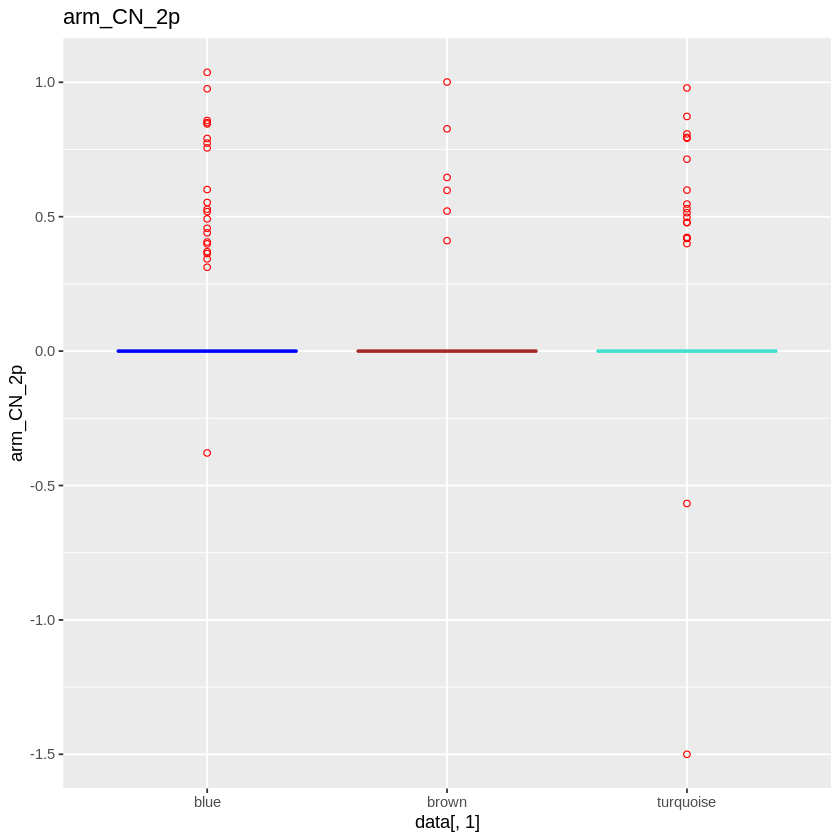

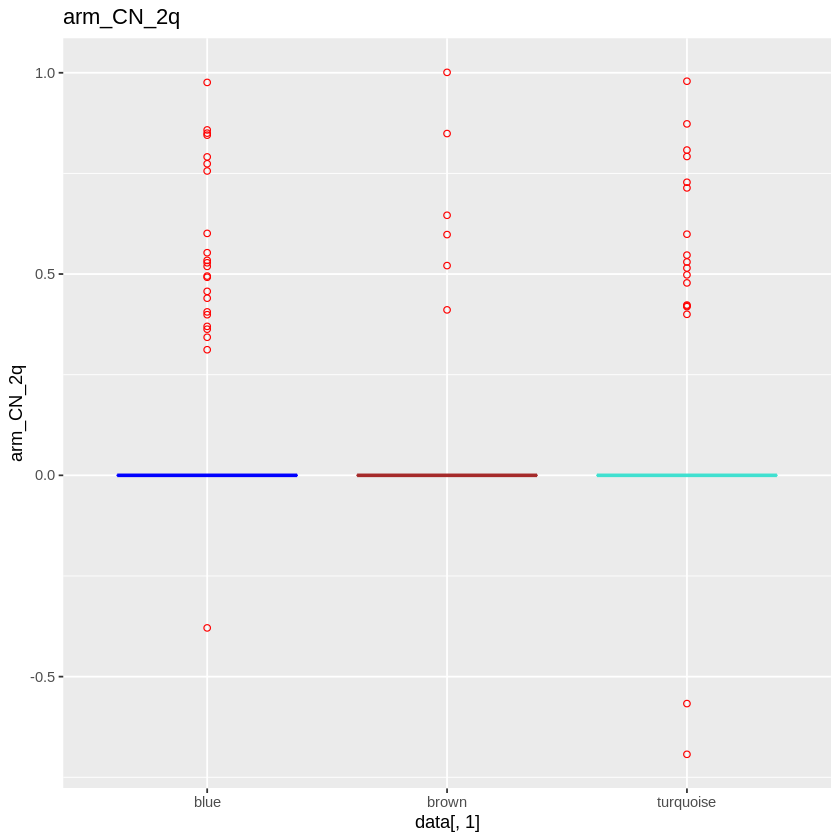

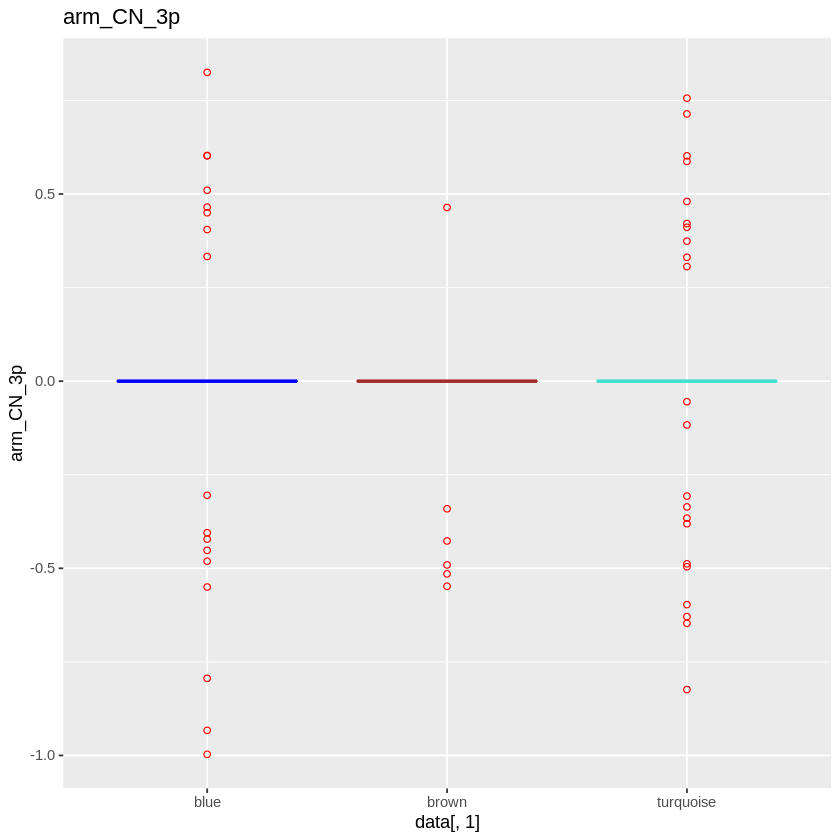

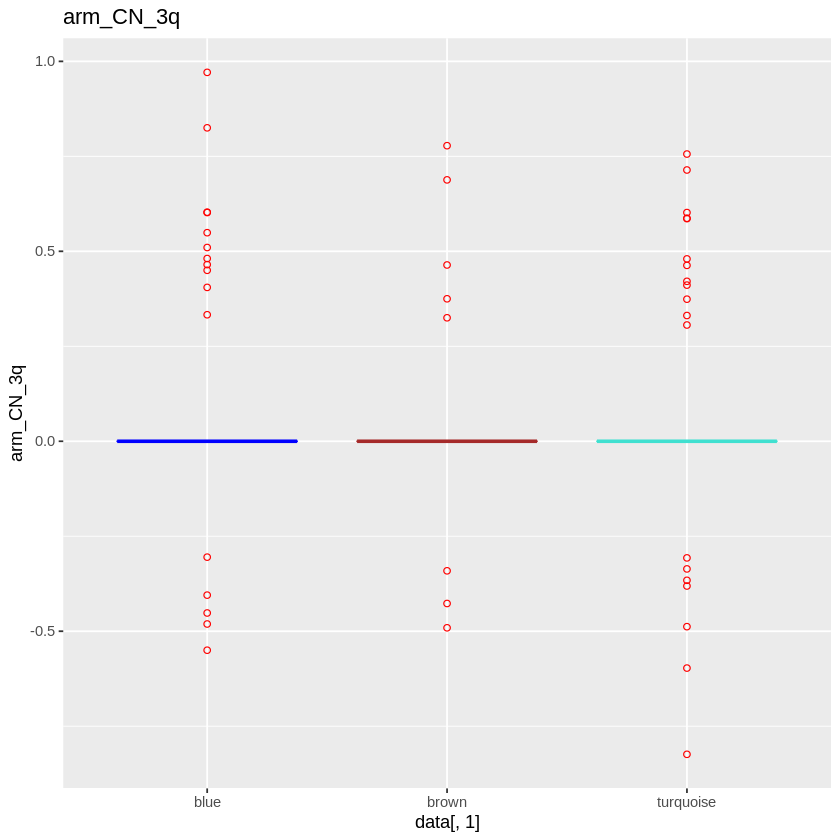

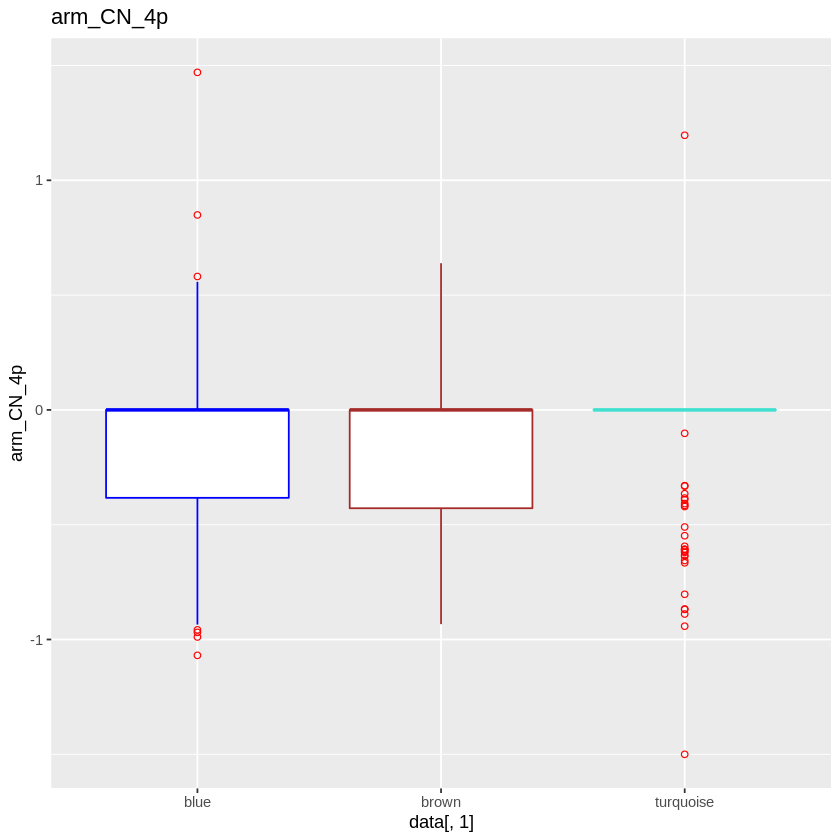

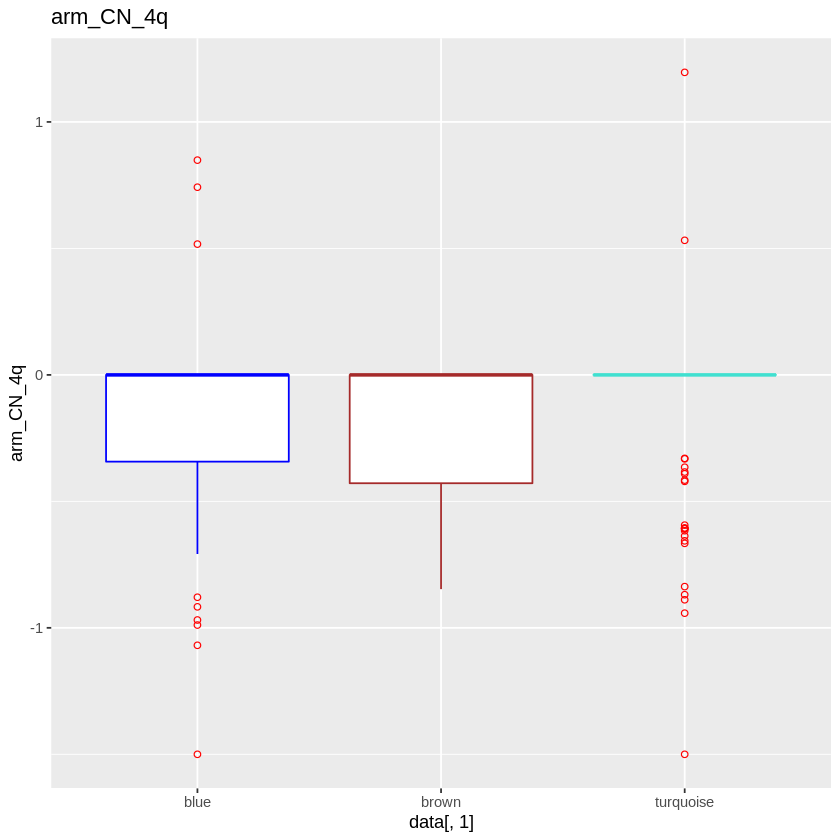

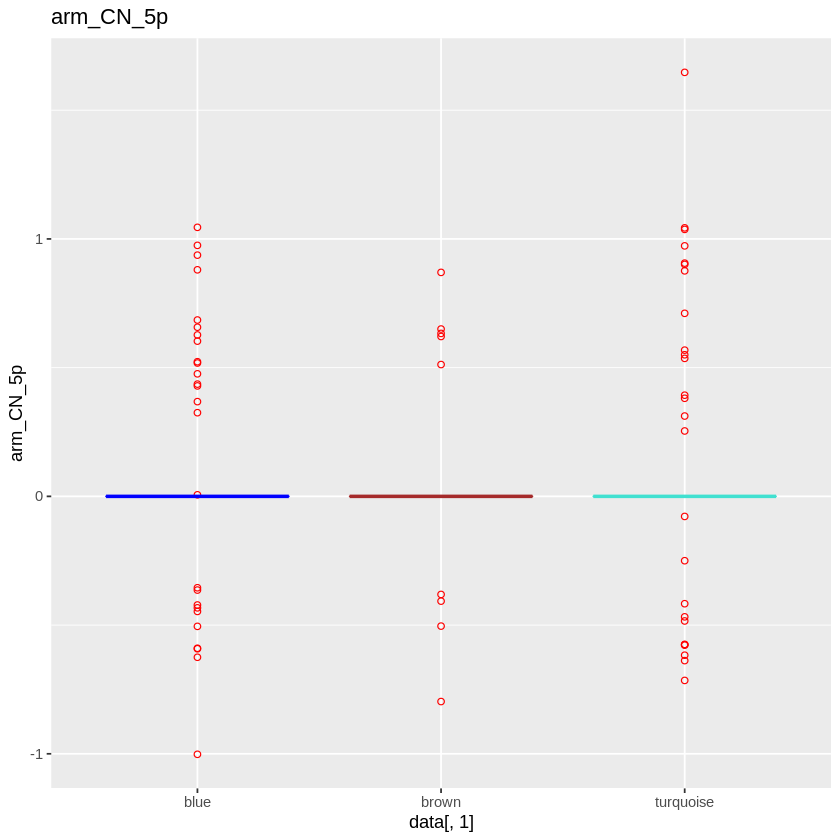

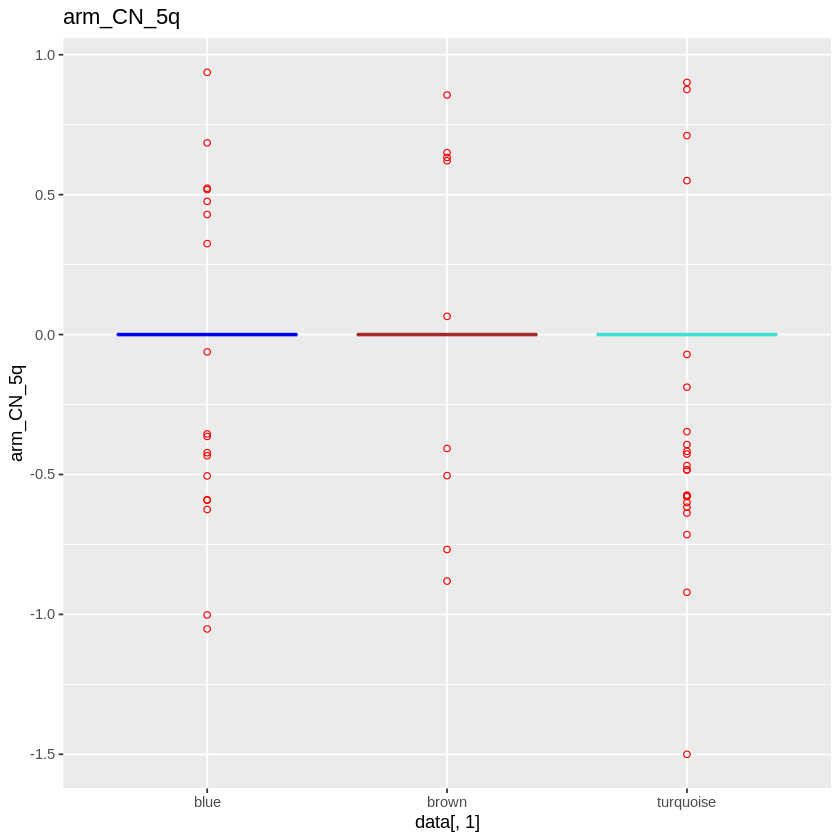

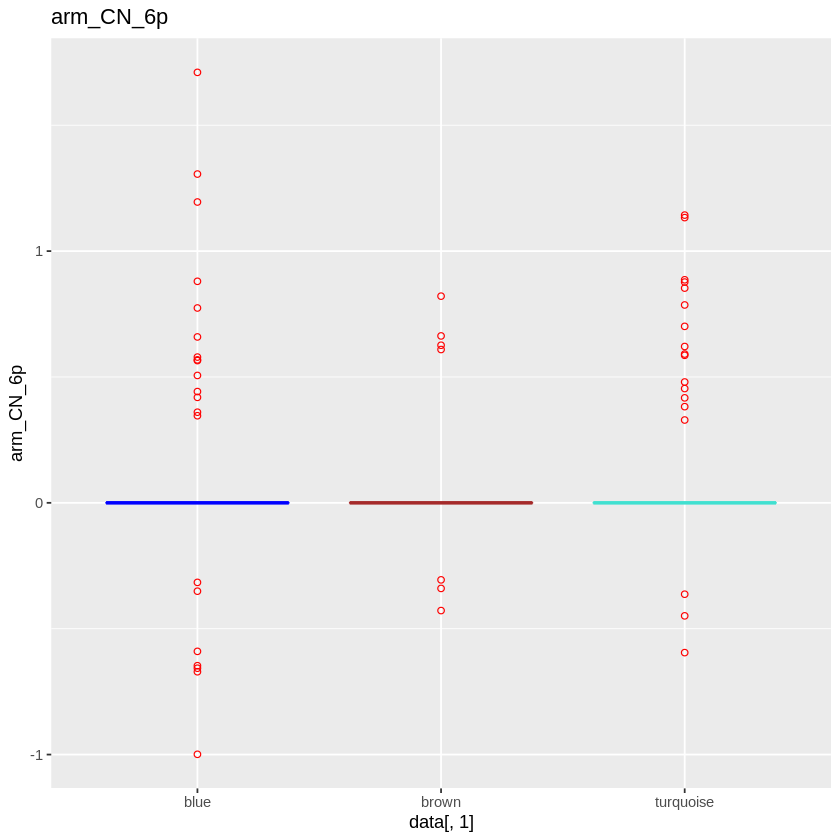

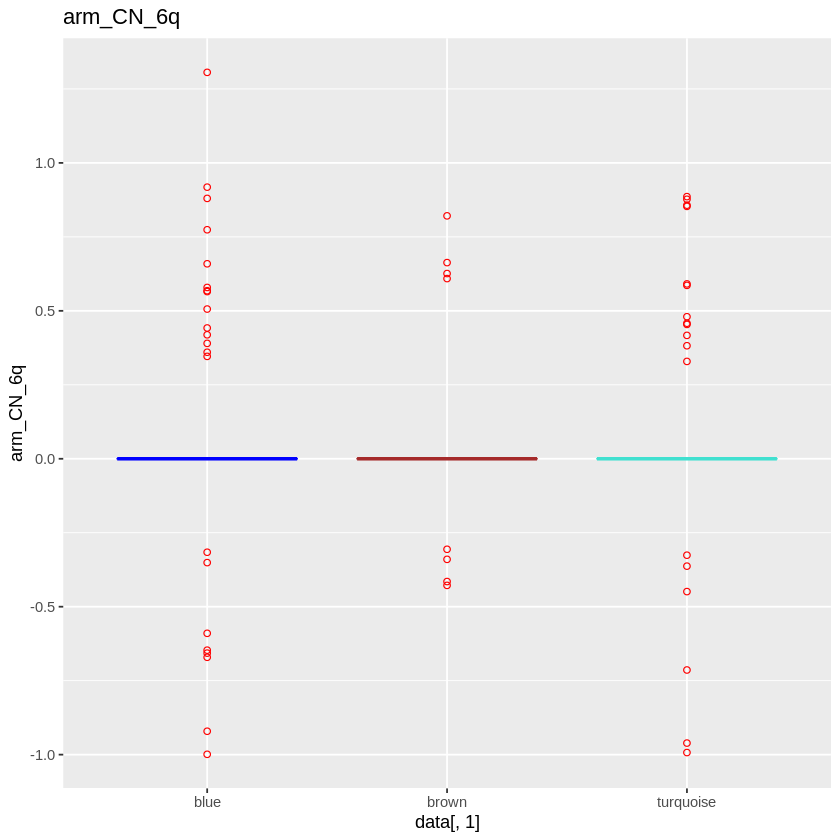

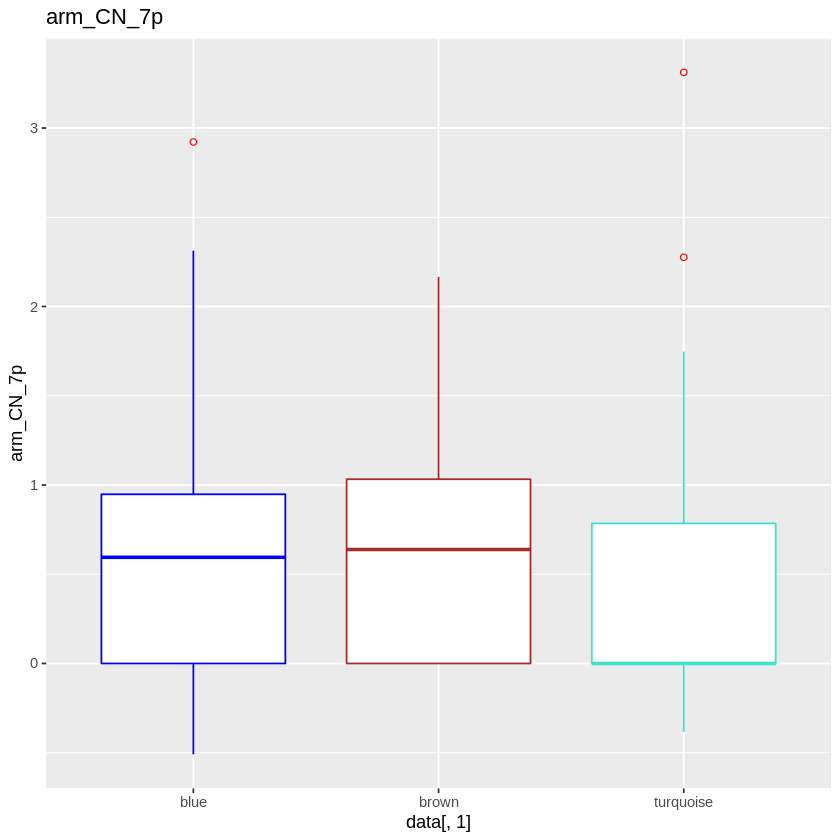

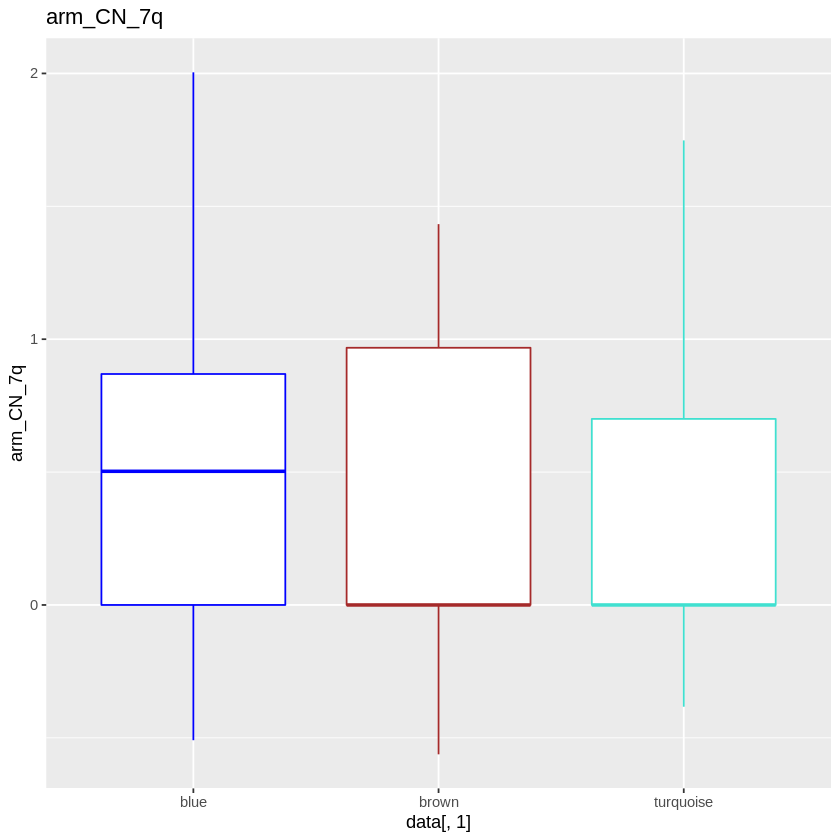

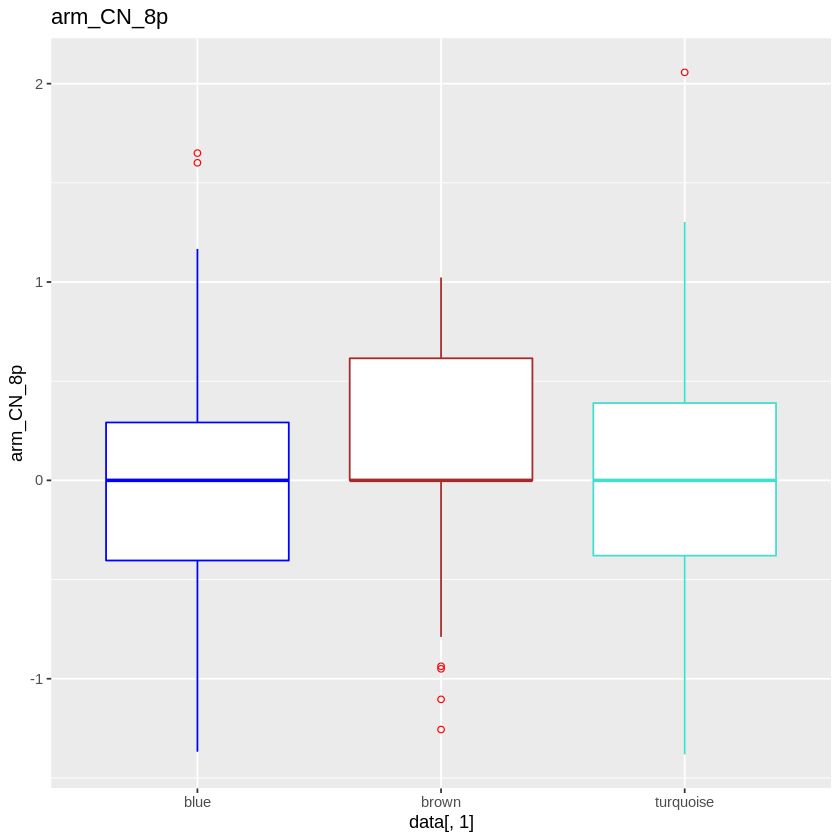

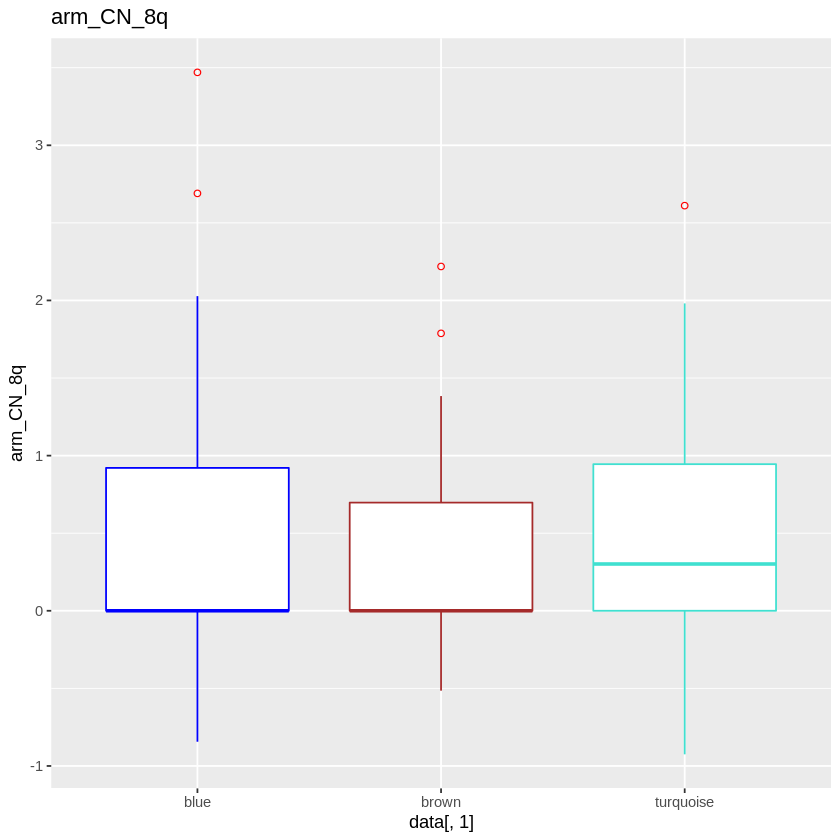

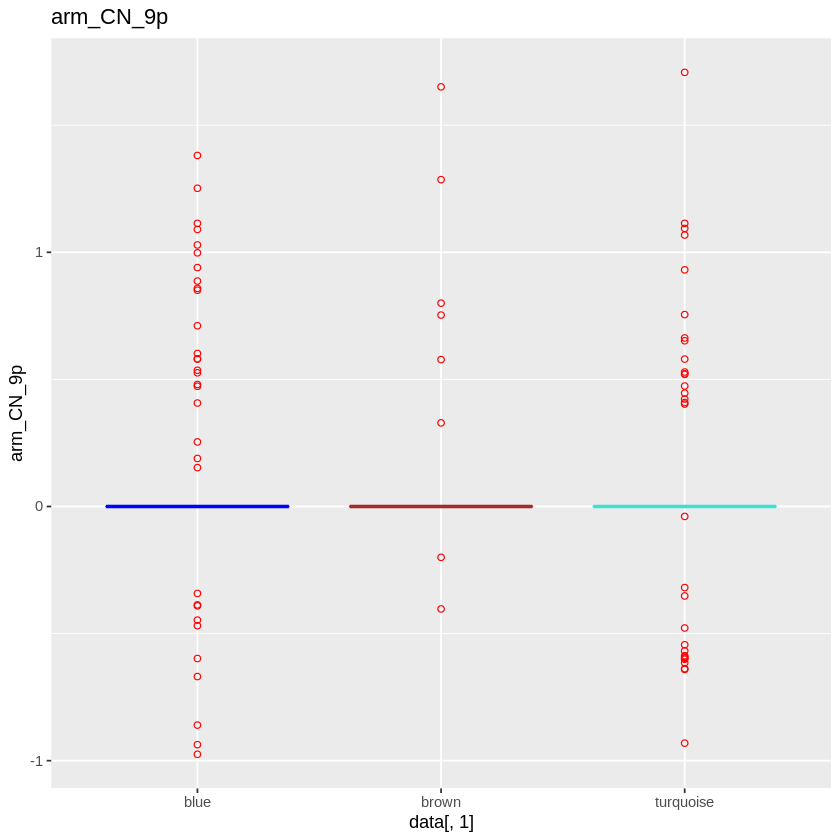

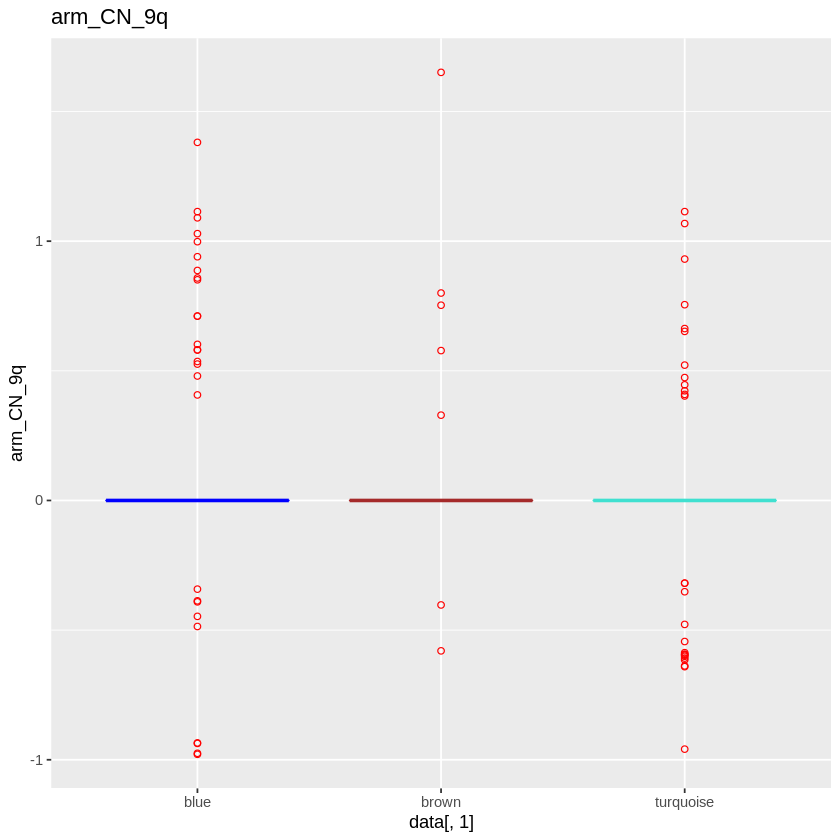

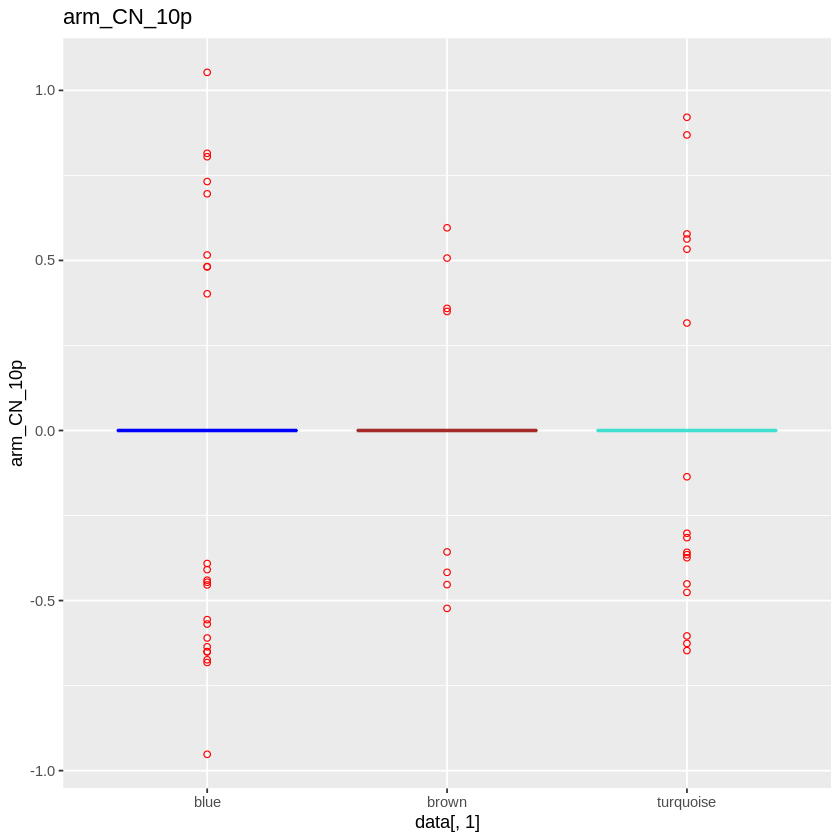

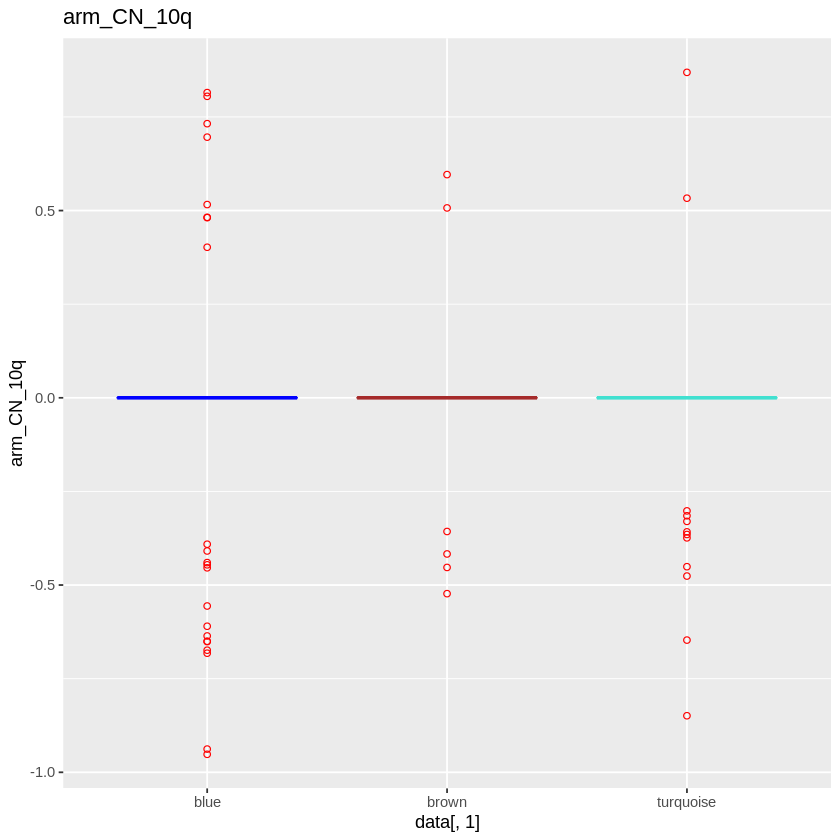

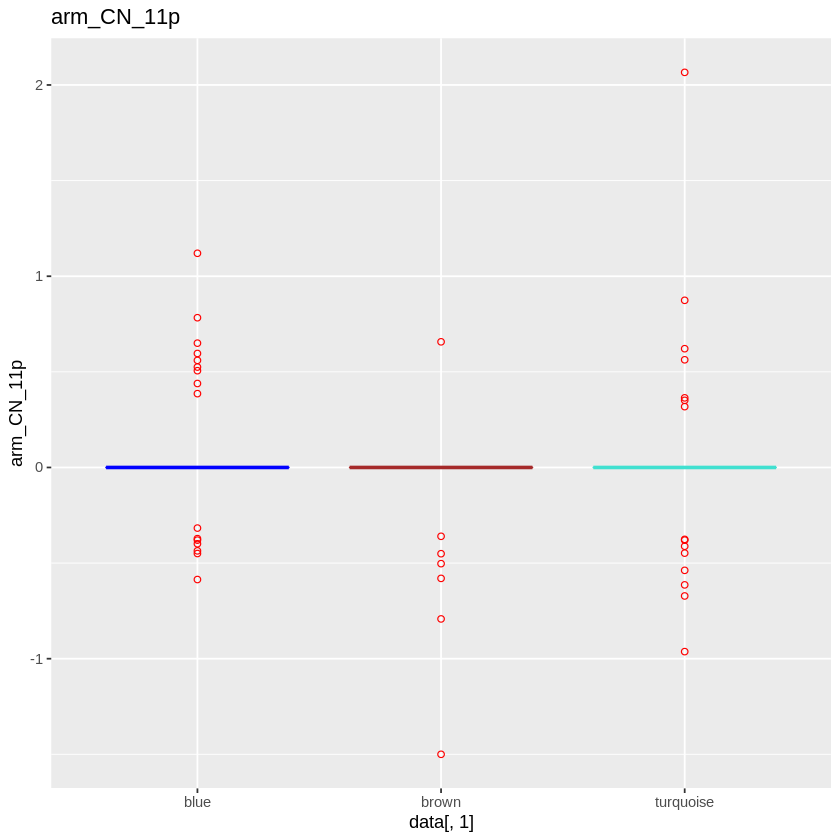

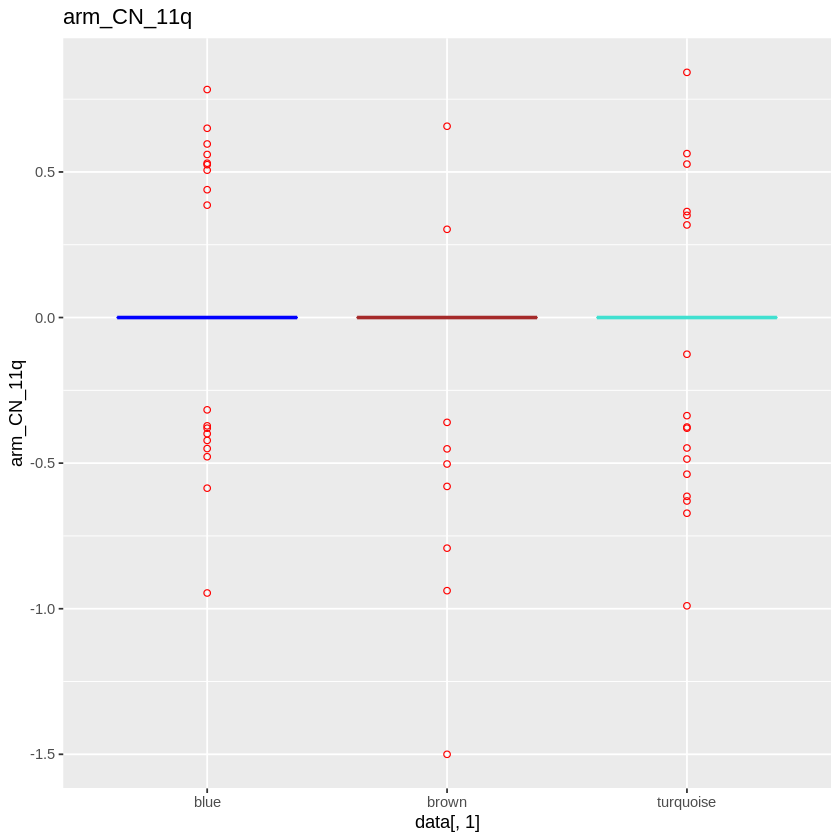

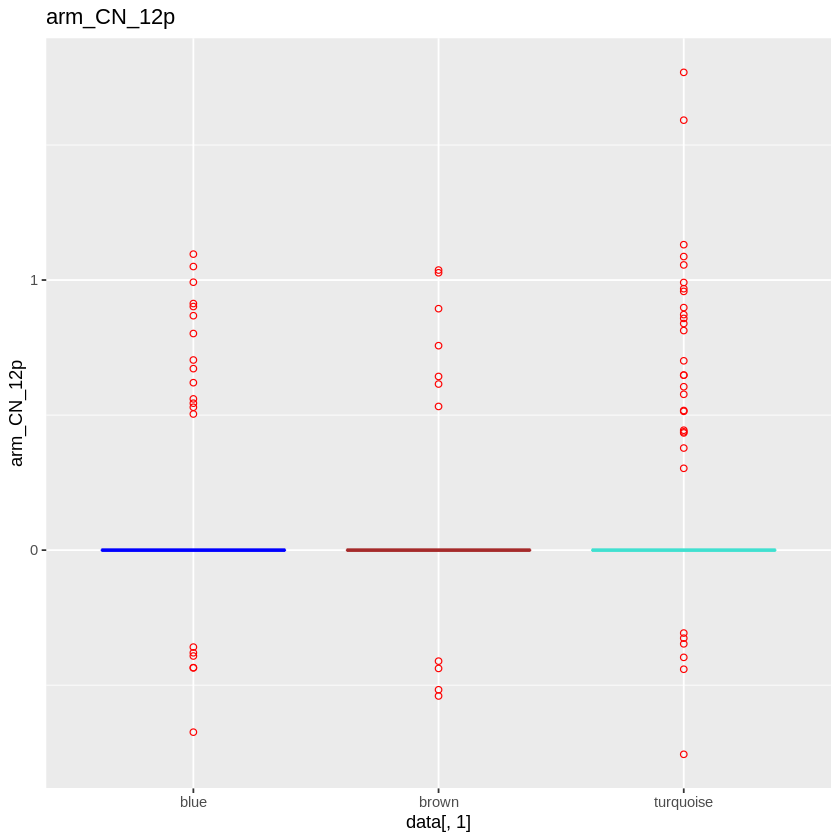

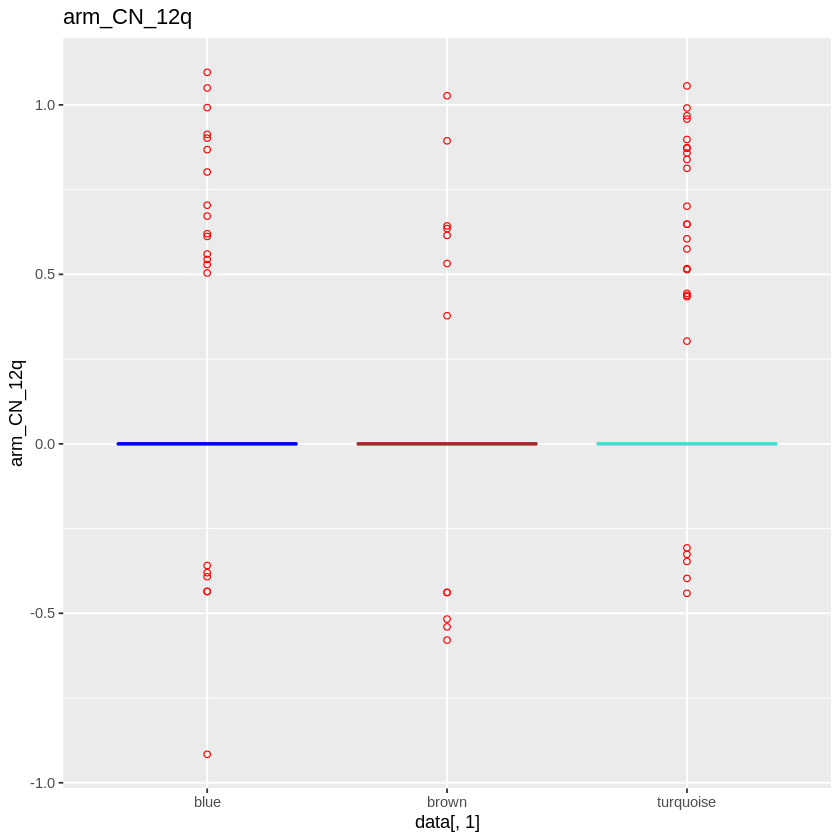

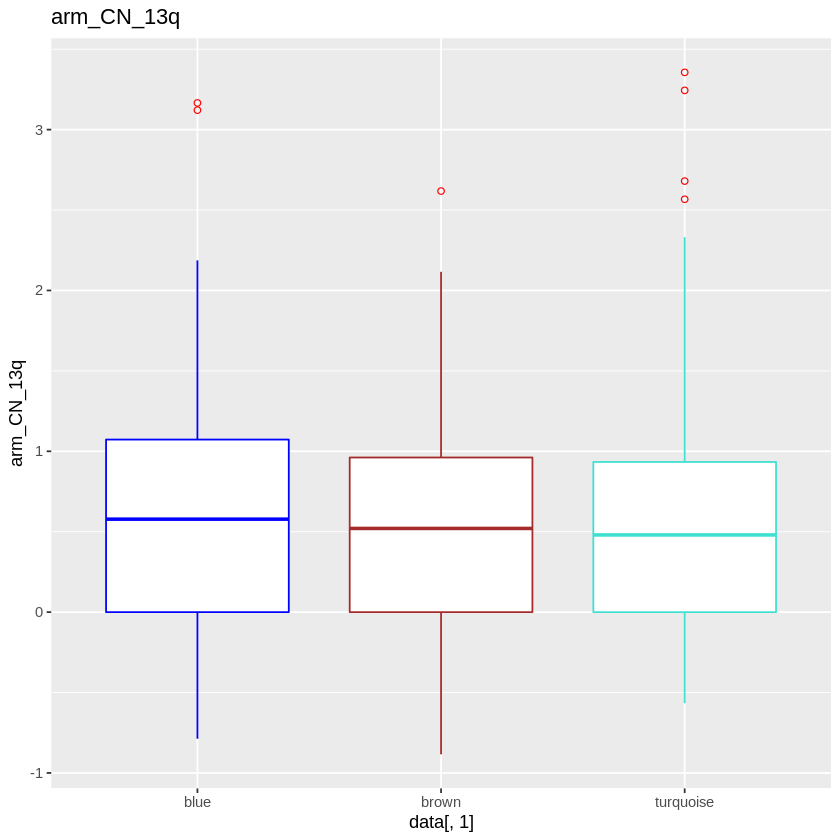

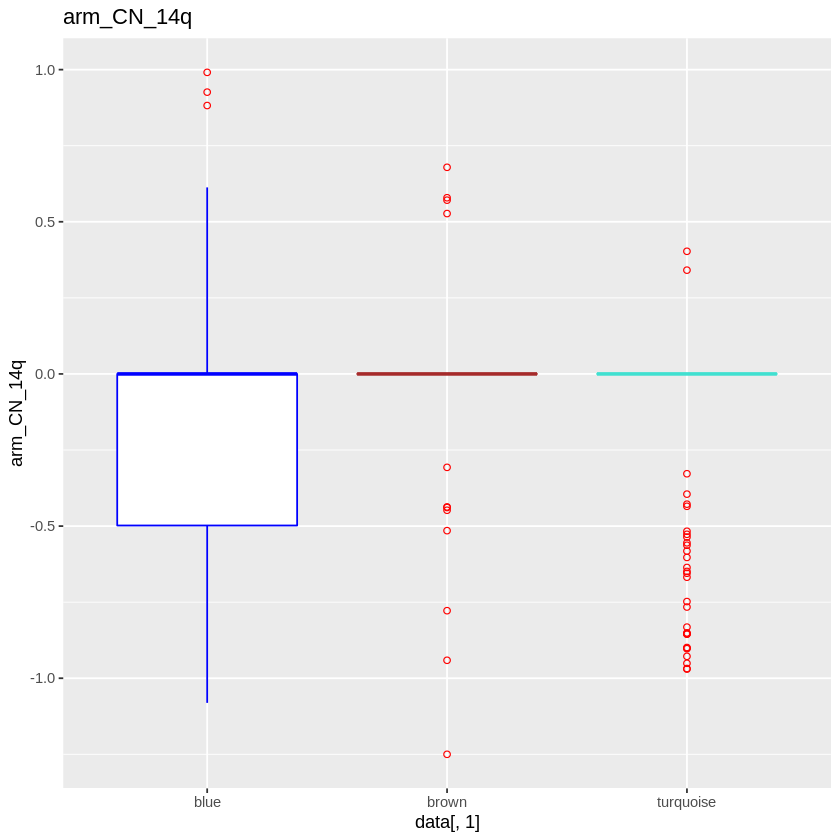

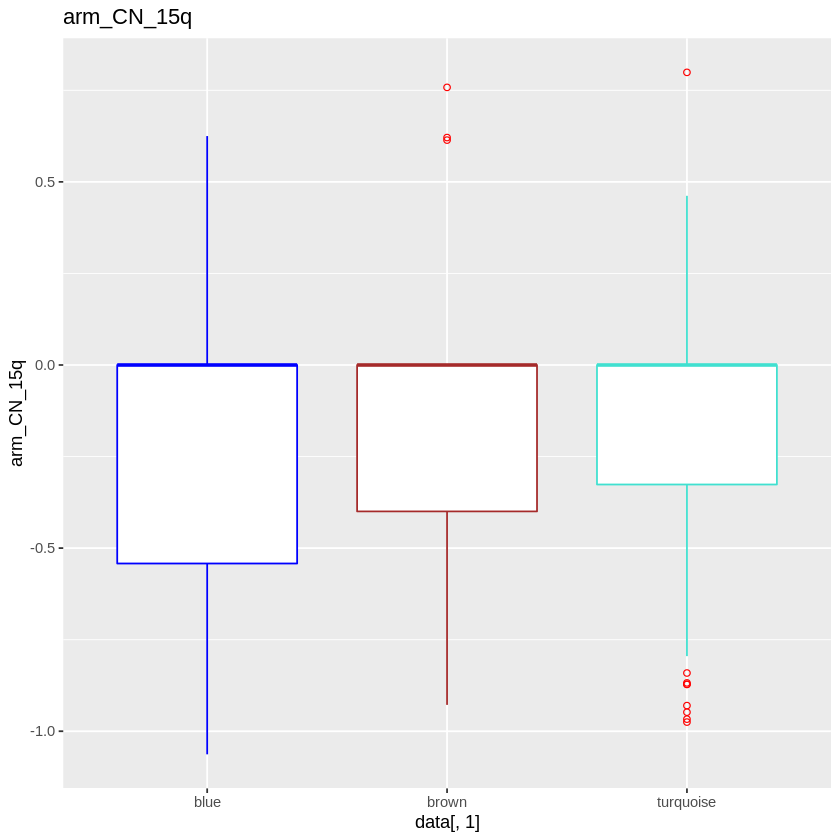

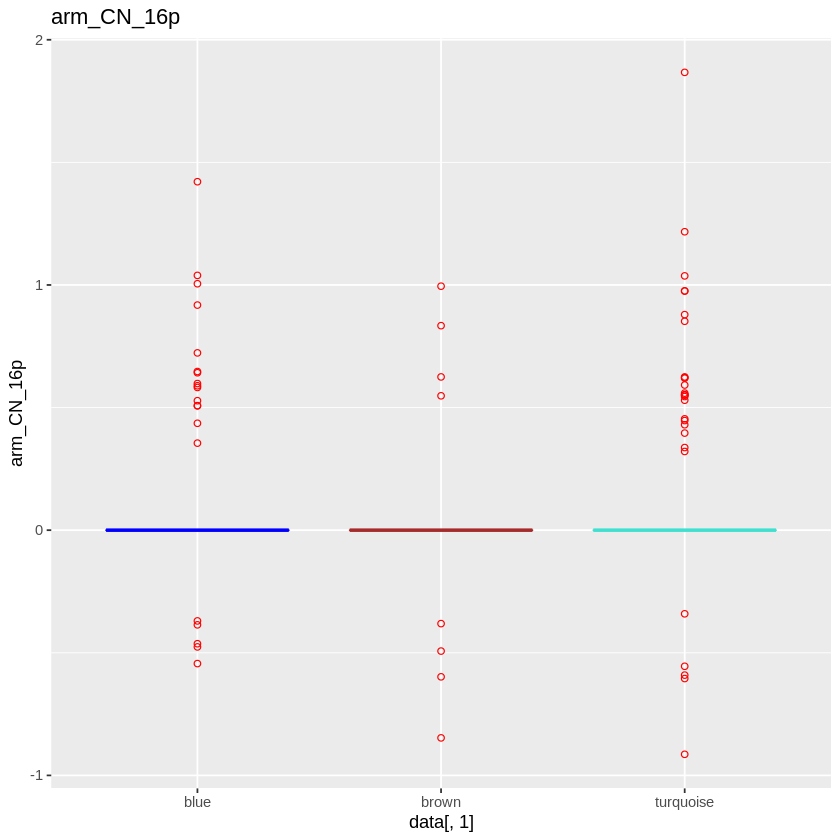

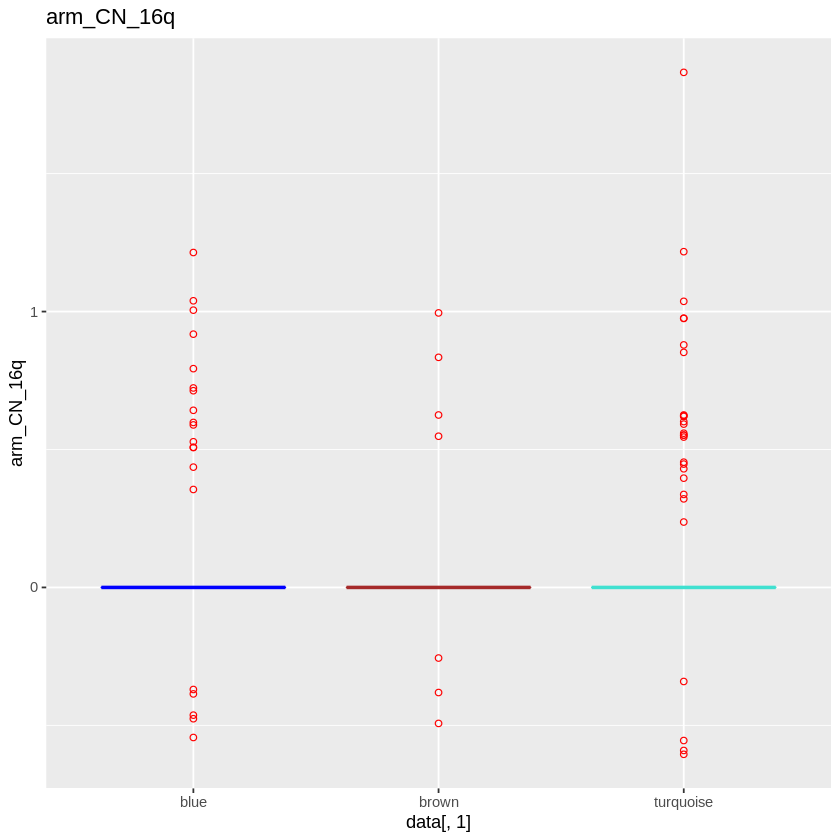

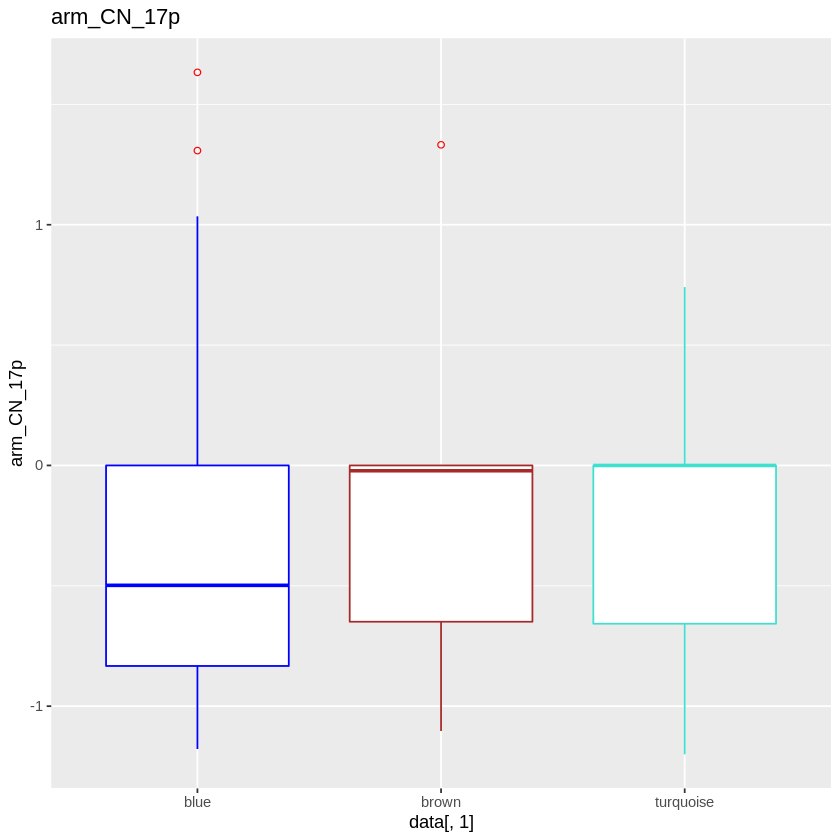

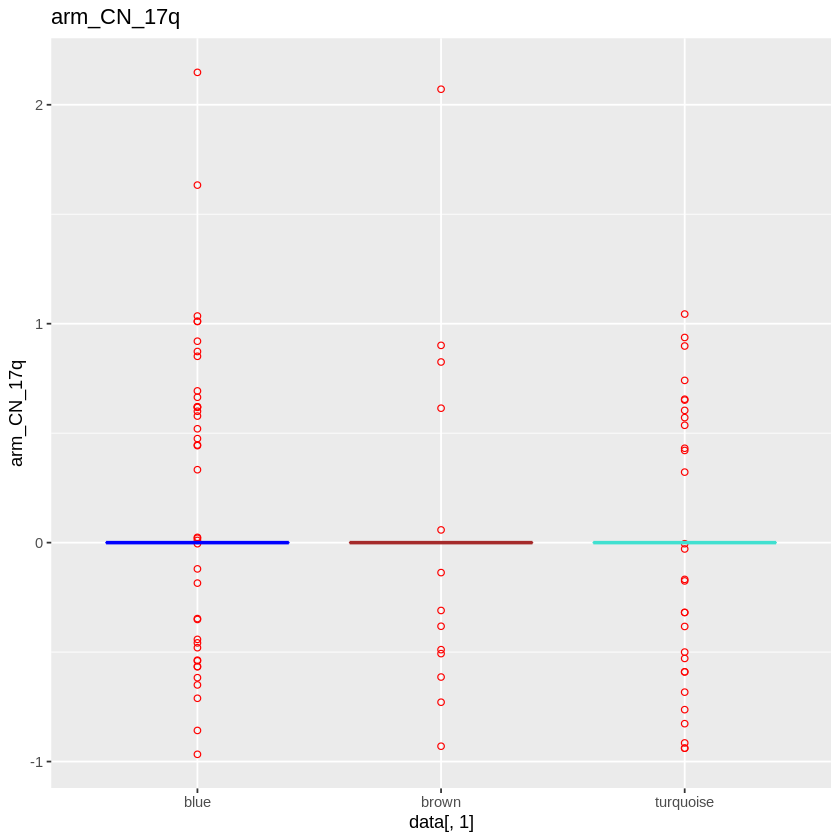

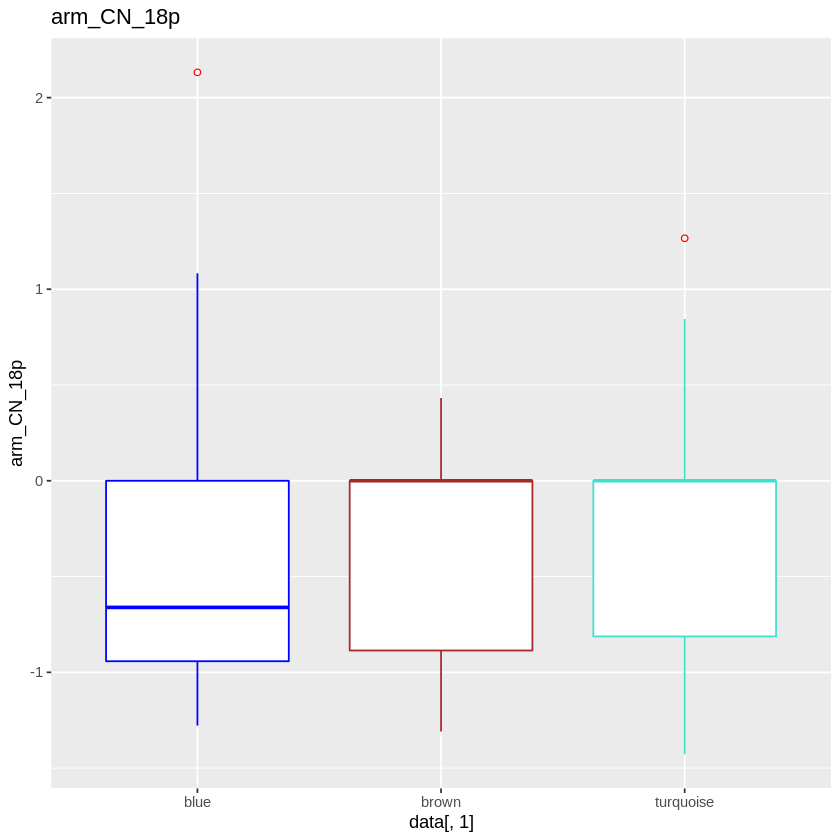

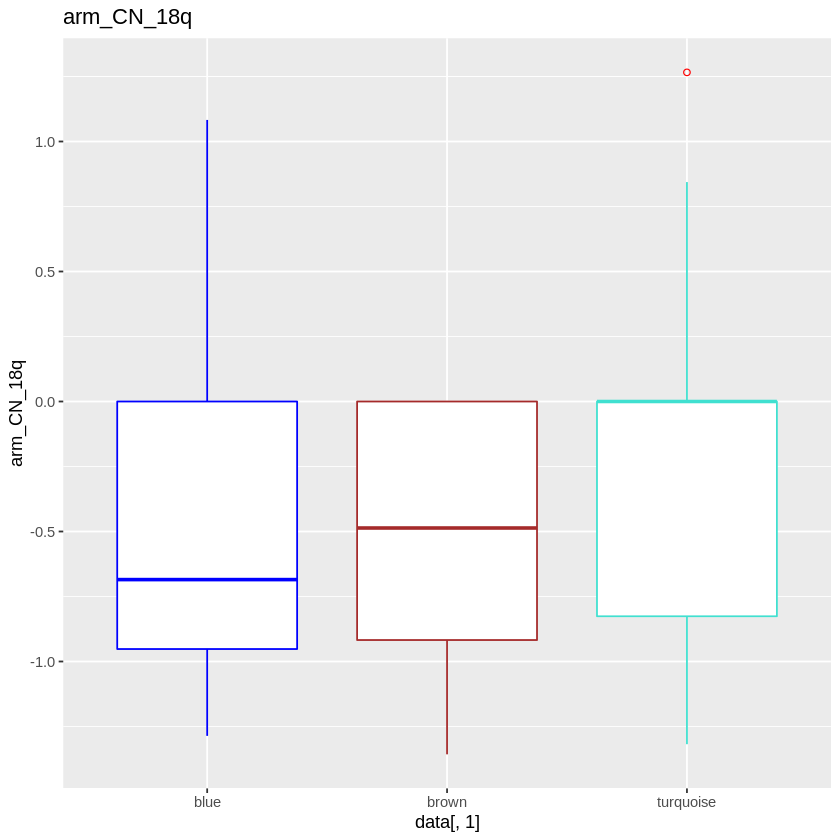

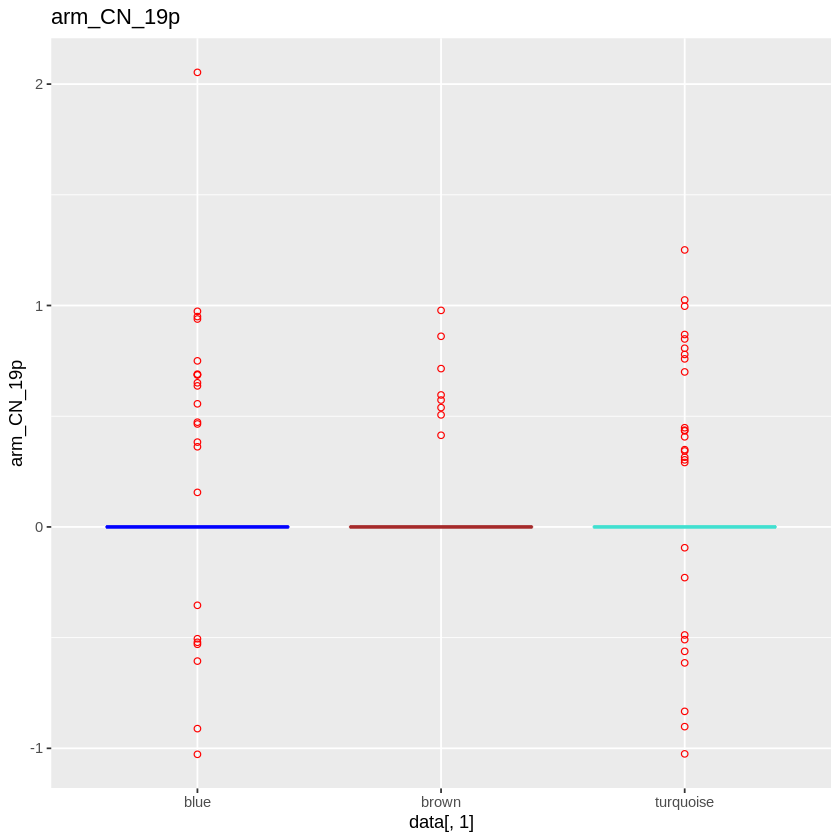

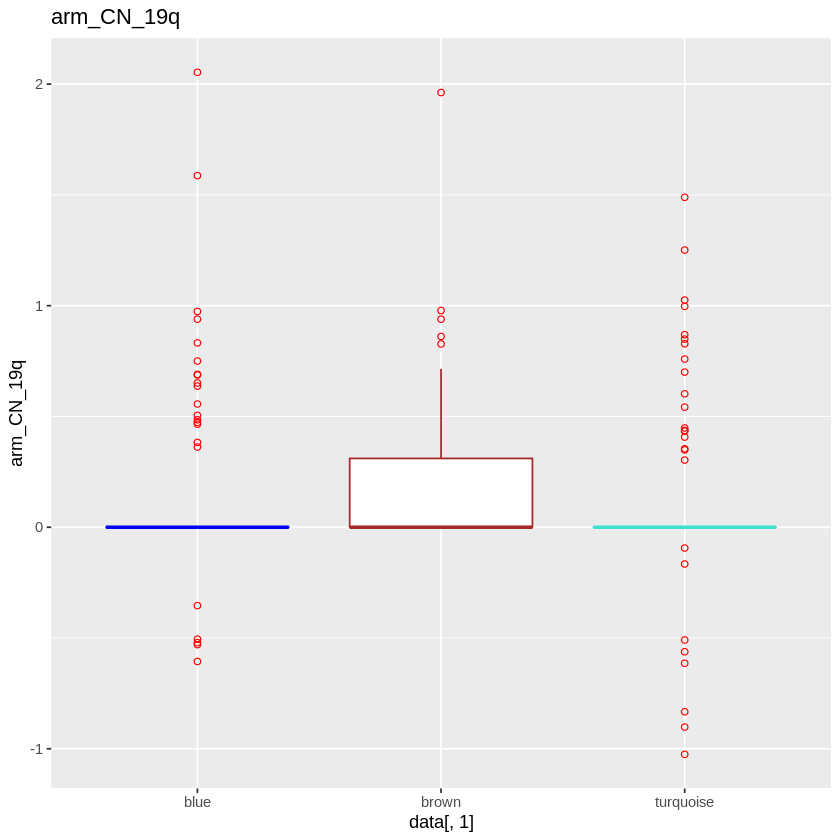

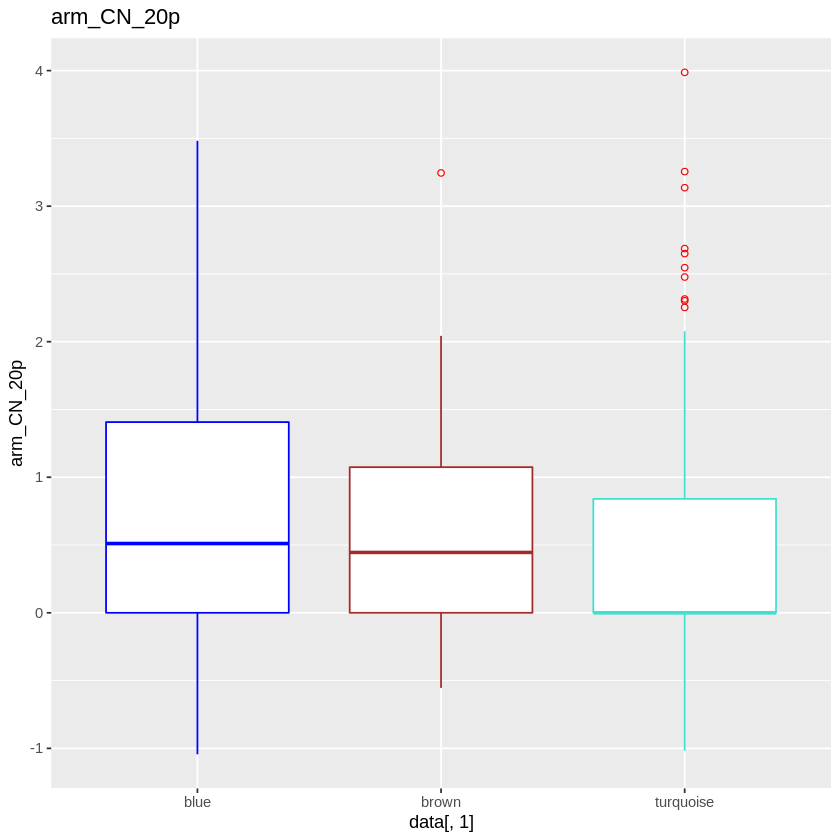

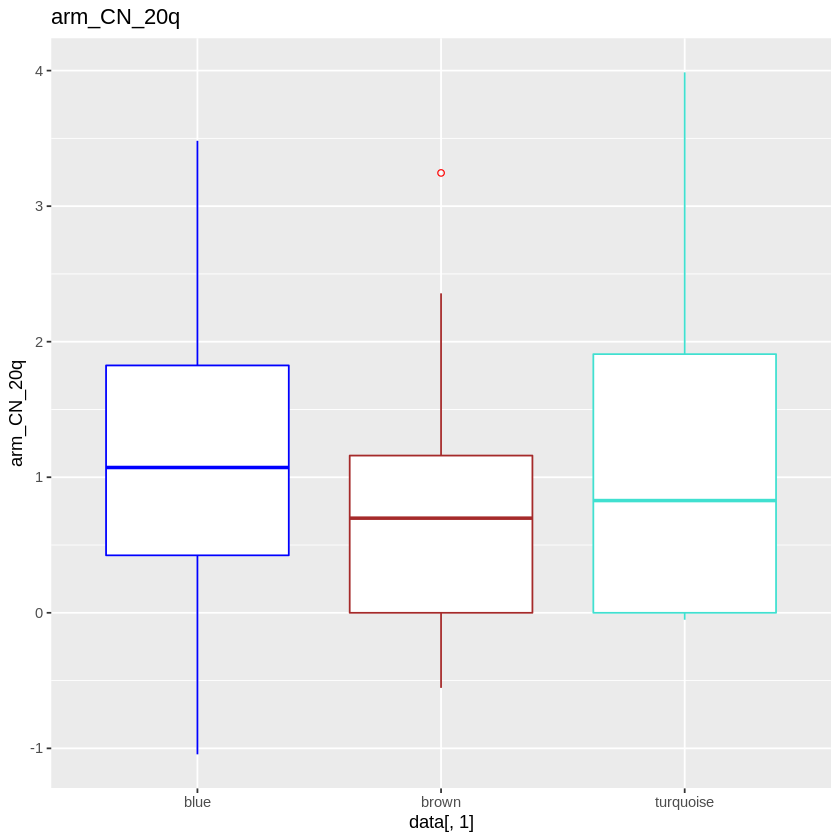

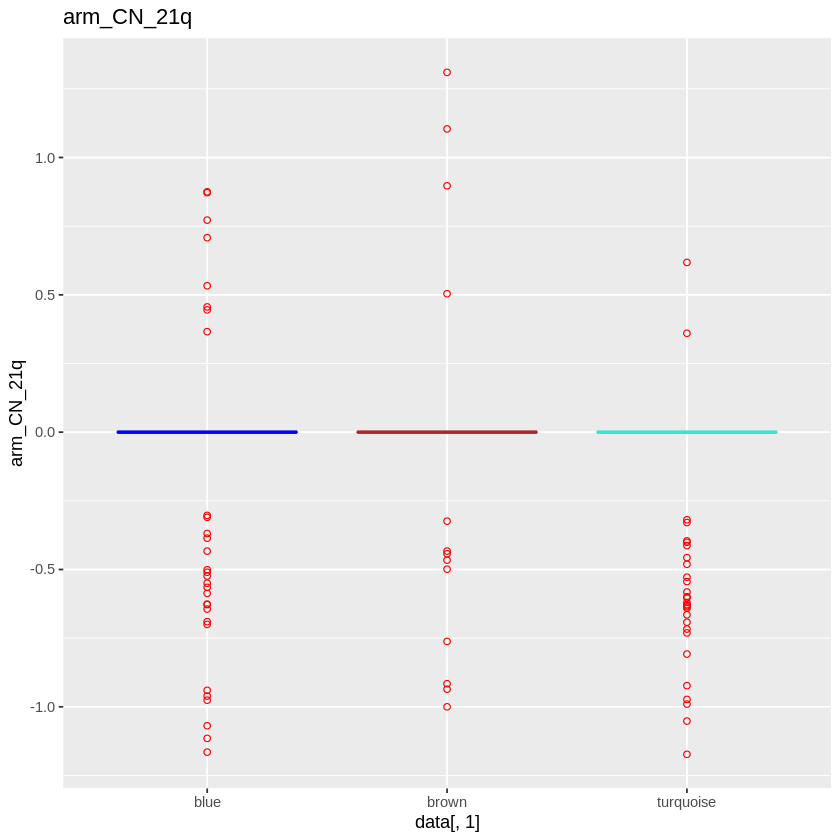

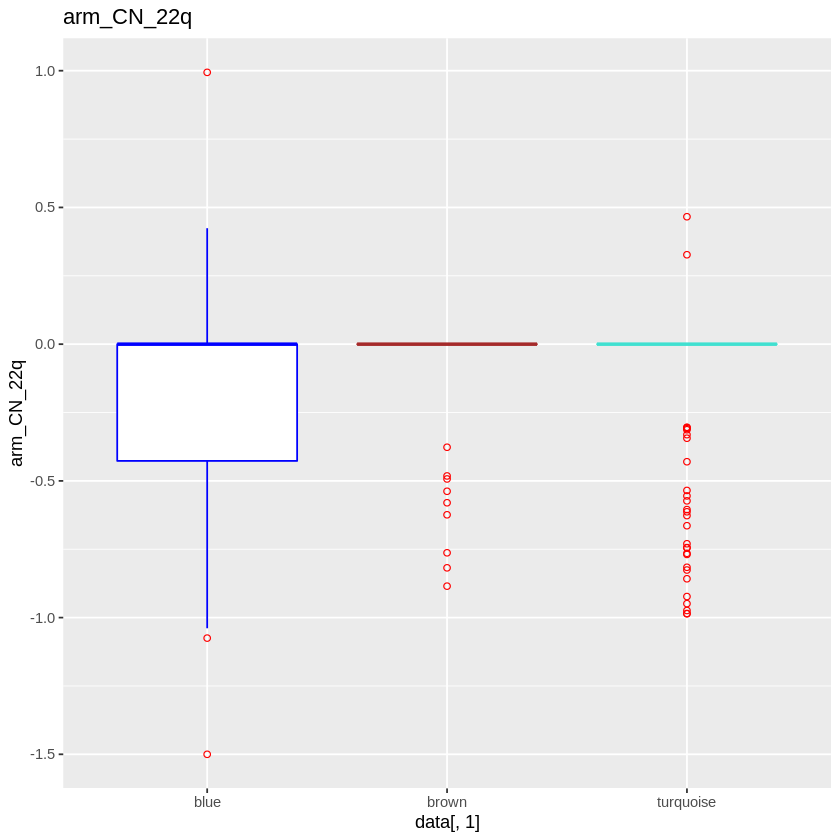

In [4]:
#### 2.GGplot_GI_Adenocarcinomas_Characteristics.R
library(ggplot2)
#Cluster.df
### 1)Merge table
Plot.df <- dplyr::left_join(Cluster.df, COAD.GI.Adenocarcinomas.Characteristics, by = "rownames")
#colnames(Plot.df)
# Remove NA value
for(i in colnames(Plot.df)){
  Plot.df.sub <- Plot.df[,c("dynamicColors",i)]
  if (is.factor(Plot.df.sub[,i])) { 
    data=subset(Plot.df.sub, !is.na(Plot.df.sub[,i]))
    p <- ggplot(data, aes(x = dynamicColors, fill = data[,i])) + 
      geom_bar(position = "fill") + theme_minimal()+ scale_fill_discrete(name =i)+
      labs(title =i)
    print(p)
  } else if (is.numeric(Plot.df.sub[,i])) {
    data=subset(Plot.df.sub, !is.na(Plot.df.sub[,i]))
    p2 <-ggplot(data,aes(x=data[,1], y=data[,2]),color=dynamicColors)  + 
      geom_boxplot(outlier.colour = "red",outlier.shape = 1,colour = c("blue","brown","turquoise")) + 
      labs(title =i, y = i)
    print(p2)
  } else {
    print(paste0("Some thing wrong with---",i))
  } 
}
